# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
#standard libraries
import pandas as pd
import numpy as np

#for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

#for randomized data splitting
from sklearn.model_selection import train_test_split

#to build linear regression_model
import statsmodels.api as sm

#to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
data = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
#check the shape of the data
data.shape

(3454, 15)

In [ ]:
#15 columns (13 possible variables influencing price, current price, and initial prial price)
#3454 rows

In [ ]:
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
#Looks like we are missing values for main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight
#Looks like everything is the correct datatype, although year is recognized as an integer, might want to change that to datetime format

In [ ]:
#statistical analysis
original_data = data.describe()
original_data

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

In [ ]:
#Check for duplicates
data[data.duplicated()]

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []

In [ ]:
#no duplicates in data

In [ ]:
#check amount of missing data in each column
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#check why so many missing values in main_camera_mp
data[data['main_camera_mp'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59      Infinix  Android        17.32  yes  no             NaN   
60      Infinix  Android        15.39  yes  no             NaN   
61      Infinix  Android        15.39  yes  no             NaN   
62      Infinix  Android        15.39  yes  no             NaN   
63      Infinix  Android        15.29  yes  no             NaN   
...         ...      ...          ...  ...  ..             ...   
3411     Realme  Android        15.34  yes  no             NaN   
3412     Realme  Android        15.32  yes  no             NaN   
3413     Realme  Android        15.32  yes  no             NaN   
3448       Asus  Android        16.74  yes  no             NaN   
3449       Asus  Android        15.34  yes  no             NaN   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                 8.0        32.0  2.0   6000.0   209.0          2020   
60                 8.0        64.0  4.0   5000.0   185.0          2020   
61                 8.0        32.0  2.0   5000.0   185.0          2020   
62                16.0        32.0  3.0   4000.0   178.0          2019   
63                16.0        32.0  2.0   4000.0   165.0          2019   
...                ...         ...  ...      ...     ...           ...   
3411              16.0        64.0  4.0   4000.0   183.0          2019   
3412              16.0        64.0  4.0   4035.0   184.0          2019   
3413              25.0        64.0  4.0   4045.0   172.0          2019   
3448              24.0       128.0  8.0   6000.0   240.0          2019   
3449               8.0        64.0  6.0   5000.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
59          245               4.282068              4.597642  
60          173               4.363608              4.711780  
61          256               4.181439              4.505460  
62          316               4.555244              4.602166  
63          468               4.416670              4.871297  
...         ...                    ...                   ...  
3411        503               4.570475              5.159974  
3412        433               4.521027              5.074424  
3413        288               4.778199              4.966753  
3448        325               5.715316              7.059317  
3449        232               4.492337              6.483872  

[179 rows x 15 columns]

In [ ]:
data[data['selfie_camera_mp'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1080     Google  Android        15.32  yes  no            12.2   
1081     Google  Android        12.83  yes  no            12.2   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1080               NaN        64.0  4.0   3430.0   184.0          2018   
1081               NaN        64.0  4.0   2915.0   148.0          2018   

      days_used  normalized_used_price  normalized_new_price  
1080        475               5.573826              6.865974  
1081        424               4.464988              6.745083

In [ ]:
data[data['int_memory'].isnull()]

brand_name      os  screen_size   4g  5g  main_camera_mp  \
117       Nokia  Others         5.18  yes  no             0.3   
2035      Nokia  Others         5.18   no  no             5.0   
2064      Nokia  Others         5.18   no  no             0.3   
2092      Nokia  Others         7.62   no  no             5.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
117                0.0         NaN  0.02   1200.0    86.5          2019   
2035               0.0         NaN  0.03   1020.0   157.0          2019   
2064               0.0         NaN  0.02   1100.0    78.4          2015   
2092               0.0         NaN  0.02   1010.0   100.0          2013   

      days_used  normalized_used_price  normalized_new_price  
117         234               2.721295              3.688379  
2035        501               2.343727              3.420346  
2064        559               2.587012              3.378611  
2092       1043               3.535728              4.370586

In [ ]:
data[data['ram'].isnull()]

brand_name      os  screen_size  4g  5g  main_camera_mp  \
114       Nokia  Others         5.18  no  no             0.3   
335       Nokia  Others         5.18  no  no             0.3   
2059      Nokia  Others         5.18  no  no             0.3   
2090      Nokia  Others         7.62  no  no             5.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
114                0.0        0.06  NaN   1020.0    91.3          2020   
335                0.0        0.10  NaN   1200.0    88.2          2020   
2059               0.0        0.06  NaN      NaN    82.6          2016   
2090               0.0        0.06  NaN   1200.0   111.4          2013   

      days_used  normalized_used_price  normalized_new_price  
114         288               2.729159              2.911263  
335         327               3.062924              3.689129  
2059       1023               2.765060              3.657905  
2090       1001               3.827771              4.605770

In [ ]:
data[data['battery'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1829      Meizu  Android        12.83  yes  no            13.0   
1831      Meizu  Android        12.83  yes  no            20.7   
1832      Meizu  Android        13.61  yes  no            20.7   
1962  Microsoft  Windows        25.55   no  no             5.0   
2058      Nokia   Others         5.18   no  no             0.3   
2059      Nokia   Others         5.18   no  no             0.3   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
1829               5.0       16.00  4.00      NaN   145.0          2014   
1831               5.0       16.00  4.00      NaN   158.0          2014   
1832               2.0       16.00  4.00      NaN   147.0          2014   
1962               3.5       32.00  4.00      NaN   675.9          2013   
2058               0.0        0.06  0.02      NaN    81.0          2016   
2059               0.0        0.06   NaN      NaN    82.6          2016   

      days_used  normalized_used_price  normalized_new_price  
1829        986               4.177919              4.863604  
1831       1043               4.878855              5.990639  
1832       1007               4.742320              5.826118  
1962        931               5.230574              5.802753  
2058        815               2.718660              3.374511  
2059       1023               2.765060              3.657905

In [ ]:
data[data['weight'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3002       XOLO  Android        12.70  yes  no            13.0   
3003       XOLO  Android        12.83  yes  no             8.0   
3004       XOLO  Android        12.70   no  no             8.0   
3005       XOLO  Android        10.29   no  no             5.0   
3006       XOLO  Android        12.70   no  no             5.0   
3007       XOLO  Windows        12.70   no  no             8.0   
3008       XOLO  Android        12.70   no  no             8.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3002               5.0        32.0  4.0   2400.0     NaN          2015   
3003               5.0        16.0  4.0   3200.0     NaN          2015   
3004               2.0        32.0  4.0   2100.0     NaN          2015   
3005               0.3        32.0  4.0   1800.0     NaN          2015   
3006               0.3        16.0  4.0   2500.0     NaN          2015   
3007               2.0        32.0  4.0   2200.0     NaN          2015   
3008               5.0        32.0  4.0   2500.0     NaN          2015   

      days_used  normalized_used_price  normalized_new_price  
3002        576               4.165890              4.930437  
3003        800               4.282068              5.189228  
3004        878               3.879706              4.081090  
3005       1036               3.823847              4.396053  
3006        679               3.837084              4.347176  
3007        838               3.707210              4.791733  
3008       1045               4.184642              4.785406

In [ ]:
#looks like just nan for all the missing values, so this info was just not given, but not an error

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
#UNIVARIATE ANALYSIS:

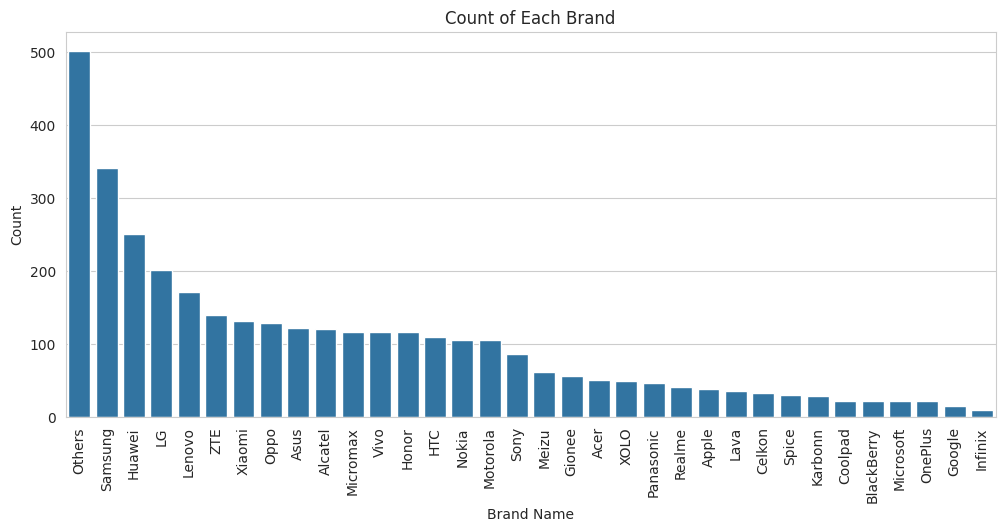

In [ ]:
#create barplot showing amount of phones from each brand appear in this dataset
plt.figure(figsize=(12, 5))
sns.countplot(x=data['brand_name'], order=data['brand_name'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Brand Name')
plt.title('Count of Each Brand')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Samsung is the most common brand in this dataset. Samsung phones dominate this dataset.
#The least common brands in this dataset are Oneplus, Google, and Infinix

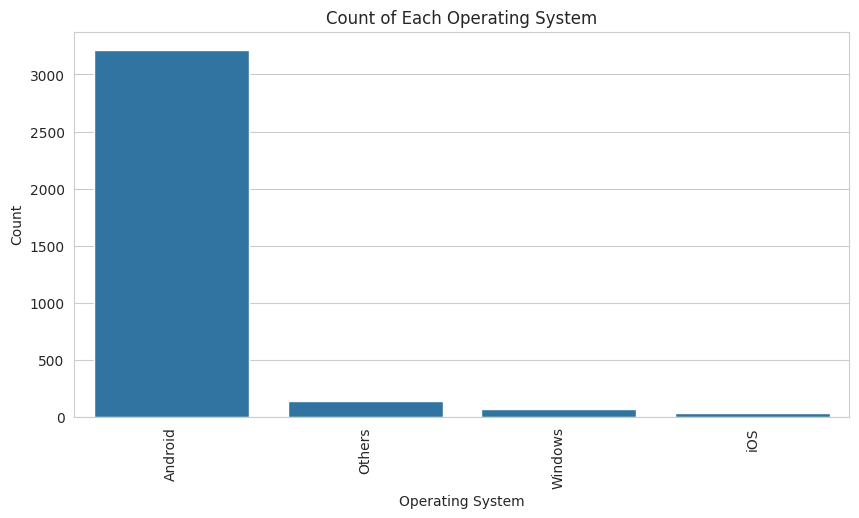

In [ ]:
#create barplot showing amount of phones from each os appear in this dataset
plt.figure(figsize=(10, 5))
sns.countplot(x=data['os'], order=data['os'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Operating System')
plt.title('Count of Each Operating System')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#This dataset is mostly Android os, which is either an error in data collection, or means that resold phones are just primarily Androids.

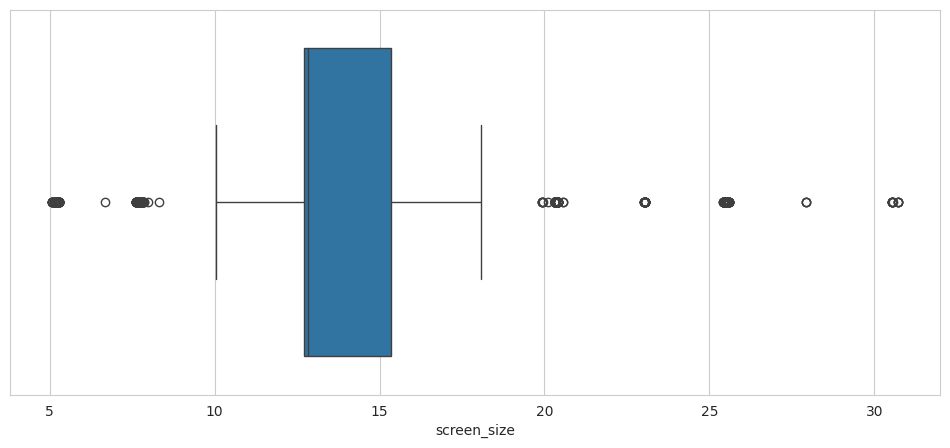

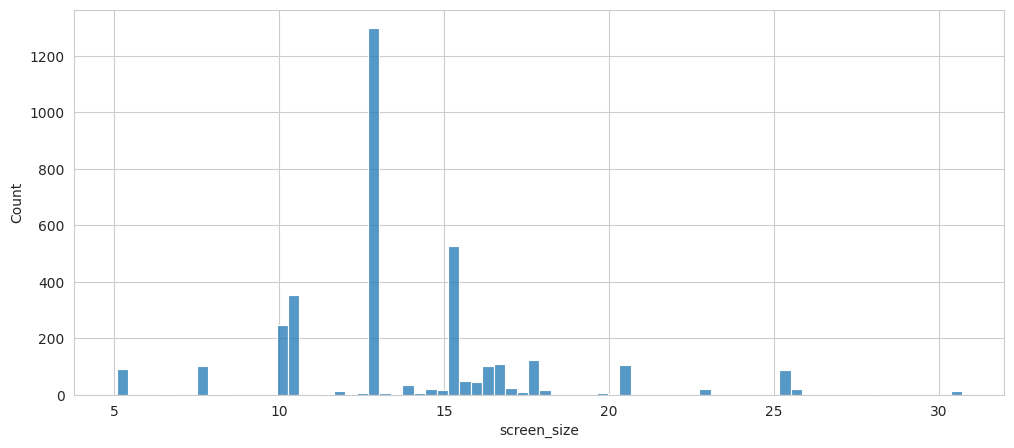

In [ ]:
#creating a boxplot and histogram to visualize screen sizes

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='screen_size');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='screen_size');
plt.show()

In [ ]:
#the barplot shows the median is around 13, and the 25th percentile is not far below that; the 75th percentile is around 16
#there are many outliers in this graph on both ends, meaning the whiskers on this boxplot do not represent maximum and minimum values

#the histogram does not display a normal distribution; we see the data is concentrated at our median of around 13
#many phones have a screen size of around 13, 15, and 10 inches, so these are the more standard phone screen sizes

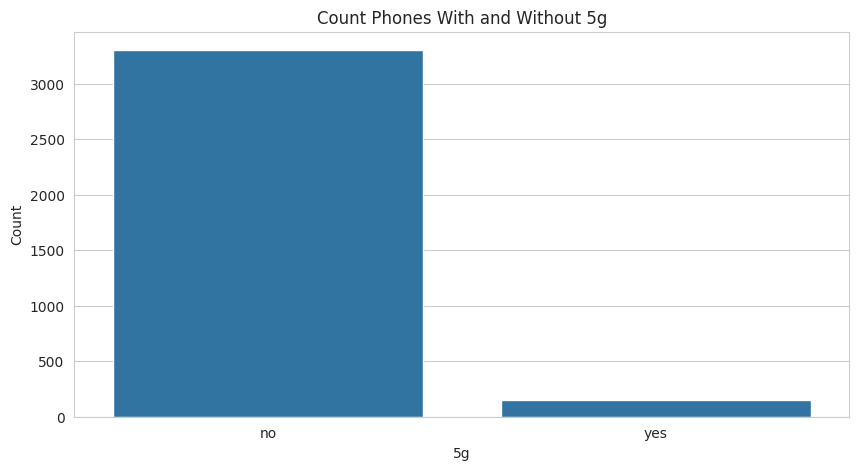

In [ ]:
#create barplot number of phones with and without 5g
plt.figure(figsize=(10, 5))
sns.countplot(x=data['5g'], order=data['5g'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('5g')
plt.title('Count Phones With and Without 5g')
plt.show()

In [ ]:
#large majority of phones being resold do not have 5g

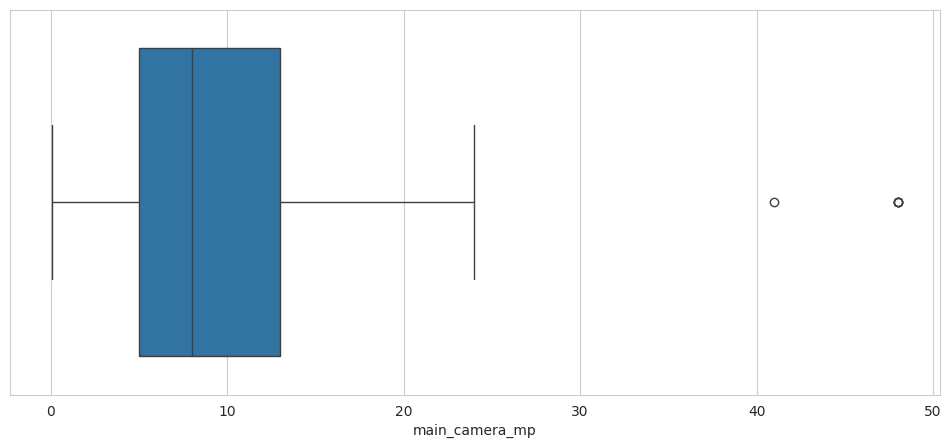

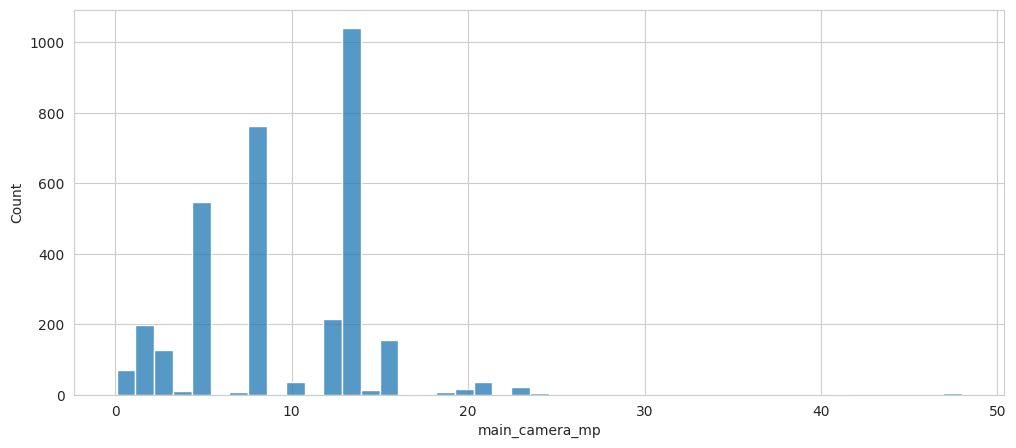

In [ ]:
#creating a boxplot and histogram to visualize resolution of the rear camera in megapixels (main_camera_mp)

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='main_camera_mp');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='main_camera_mp');
plt.show()

In [ ]:
#Boxplot tells us most phones being resold have a median around 8, with the left whisker reaching the minimum of 0, but there are outliers on the other end, which is not surprising

#Histogram shows us the most common resolution values (around 5, 8, and 13)

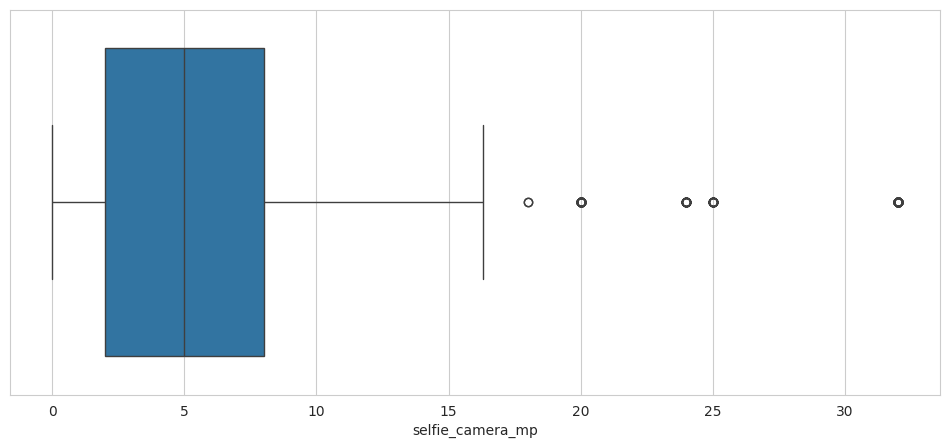

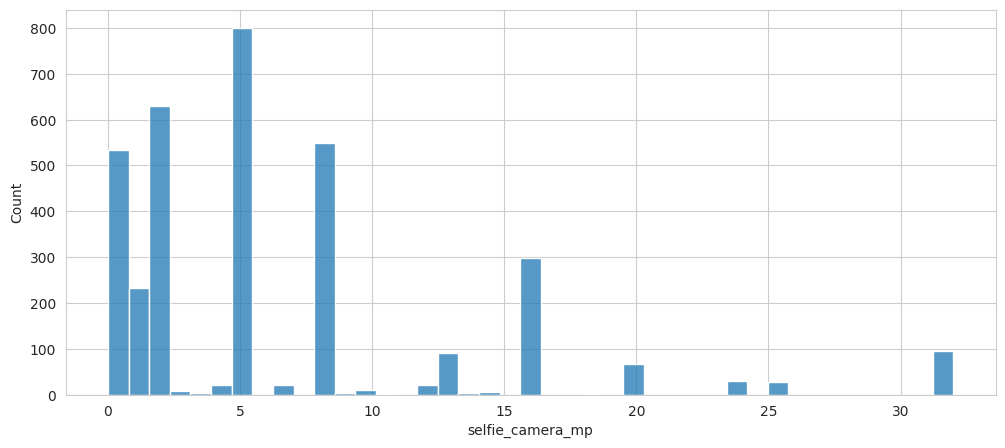

In [ ]:
#creating a boxplot and histogram to visualize resolution of the front camera in megapixels (main_camera_mp)

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='selfie_camera_mp');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='selfie_camera_mp');
plt.show()

In [ ]:
#Much lower reoltion than rear camera

#boxplot shows that median is 5; minimum is 0; a couple outliers with very high res on front camera

#histogram shows what the most common resolution values are (around 1, 5, and 8)

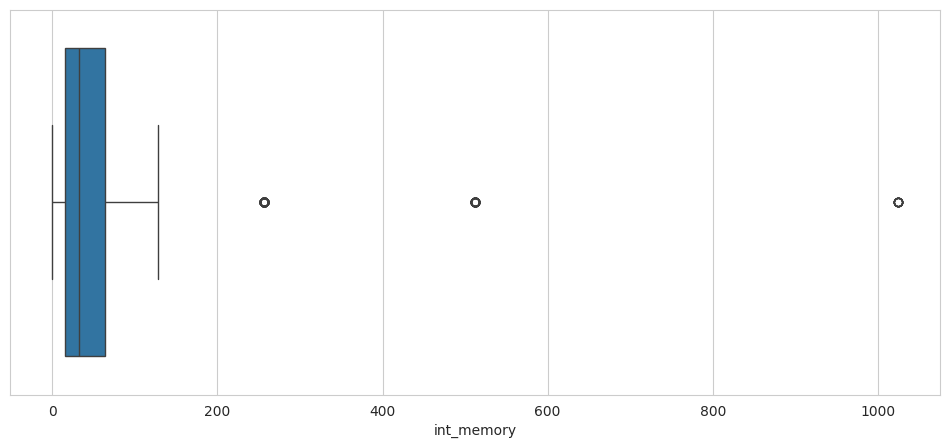

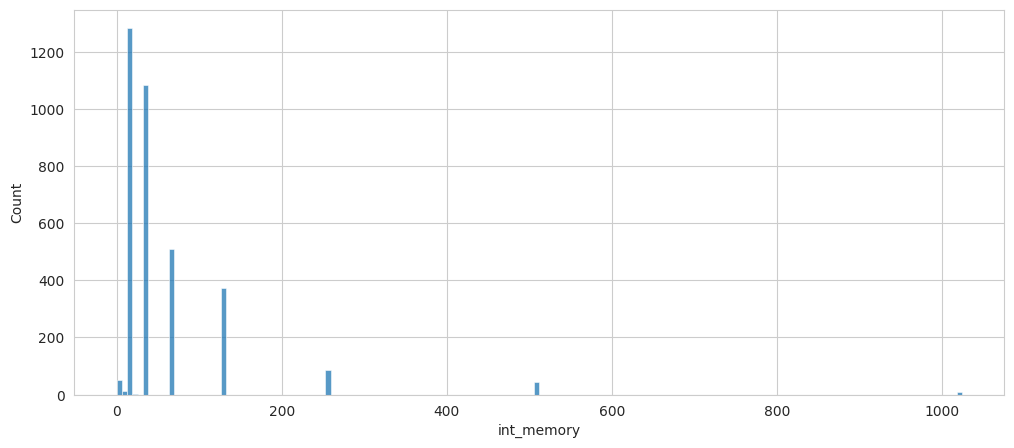

In [ ]:
#creating a boxplot and histogram to visualize amount of internal memory (ROM) in GB (int_memory)

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='int_memory');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='int_memory');
plt.show()

In [ ]:
#There are a couple of extreme outliers, that I will check later to see if it is an error

#Most common amount of ROM is 32 GB

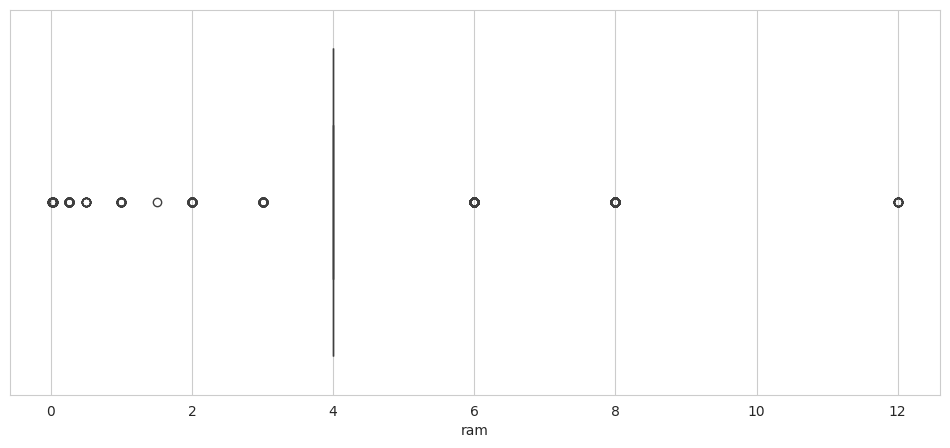

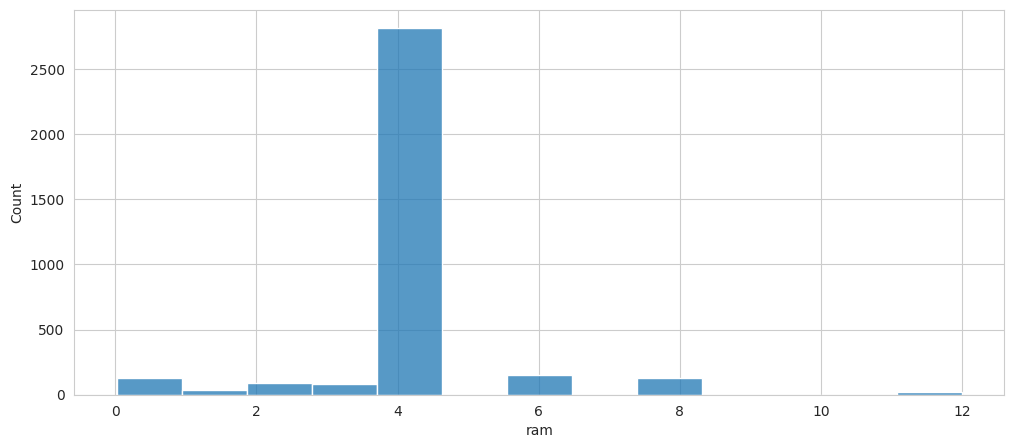

In [ ]:
#creating a boxplot and histogram to visualize amount ram

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='ram');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='ram');
plt.show()

In [ ]:
#The boxplot shows us that there are some extreme outliers in the data, making the IQR look minuscule in comparison
#Most common amount of ram is 4 GB

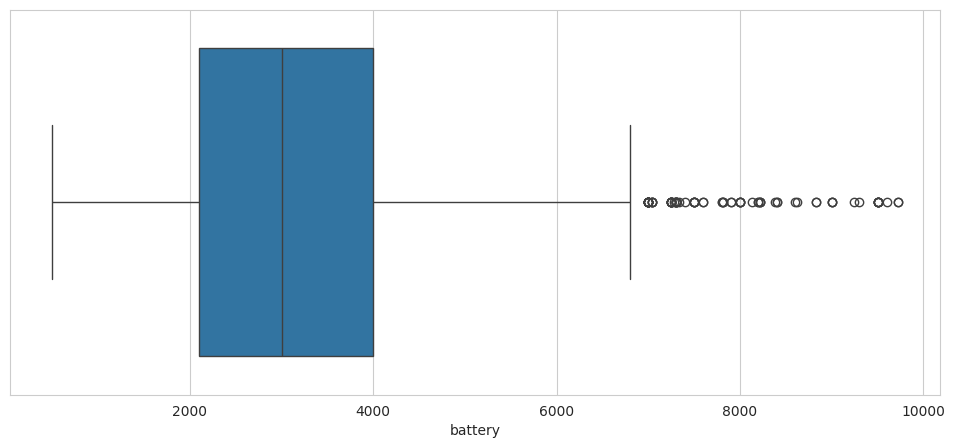

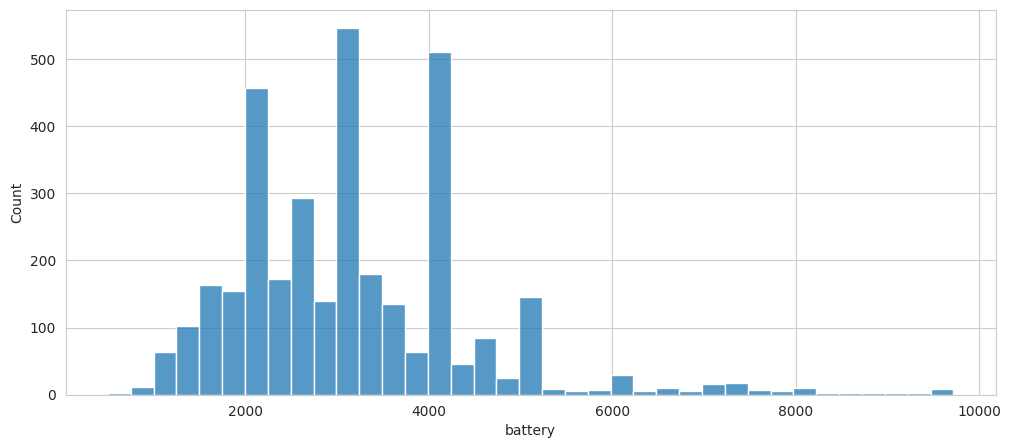

In [ ]:
#creating a boxplot and histogram to visualize battery size

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='battery');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='battery');
plt.show()

In [ ]:
#Many outliers on right side of graph (many phones have unusually large battery)
#Median is around 3000

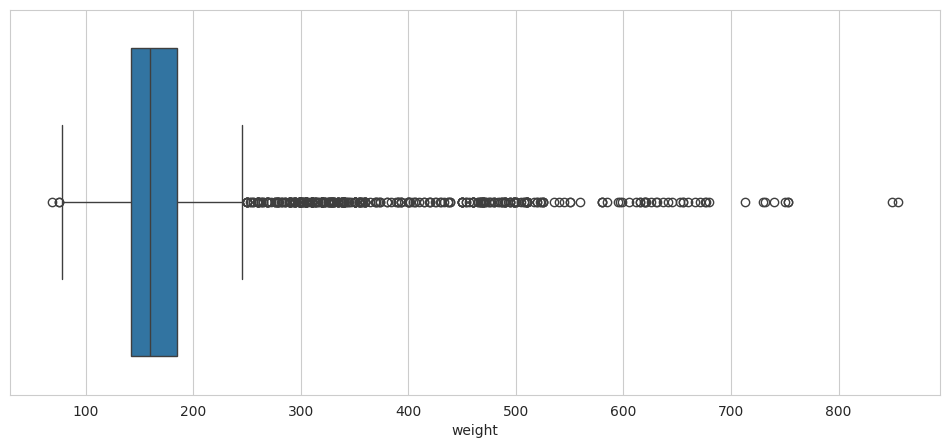

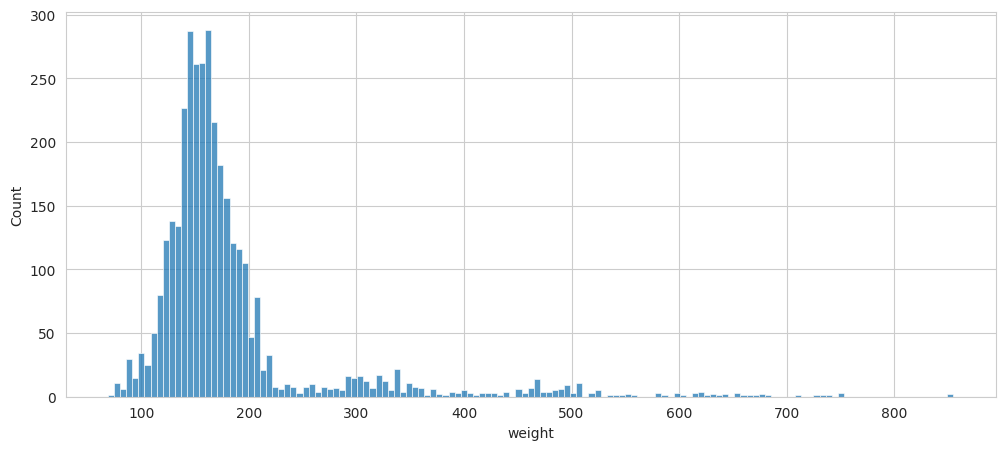

In [ ]:
#creating a boxplot and histogram to visualize phone weight

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='weight');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='weight');
plt.show()

In [ ]:
#The boxplot shows the weight has a median of around 160 grams, with outliers on both ends
#outliers on the right size are much more prominent, which is expected because people are probably mostly selling older, heavier phones
#outliers on left end might indicate a couple of newer phones becaus ethey are so much lighter

#the histogram shows a normal distribution, which is expected since this is a continuous variable
#however, the graph is right skewed and we can still see the thicker right tail, showing all the outliers

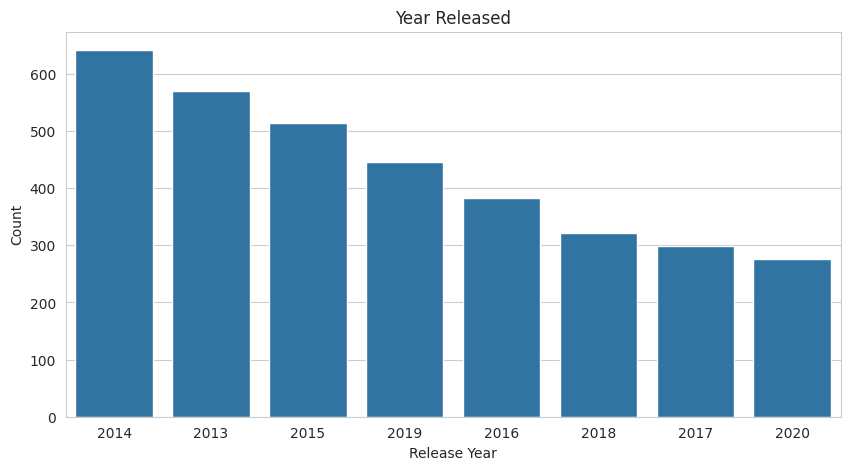

In [ ]:
#create barplot of number of phones released from each year
plt.figure(figsize=(10, 5))
sns.countplot(x=data['release_year'], order=data['release_year'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.title('Year Released')
plt.show()

In [ ]:
#Most phones being resold are from 2014, and the graph descends by year, which is expected because people are mostly selling older phones

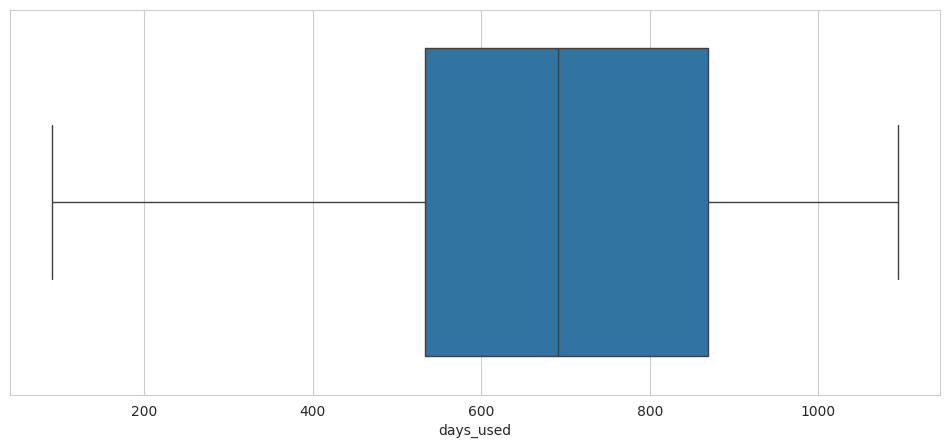

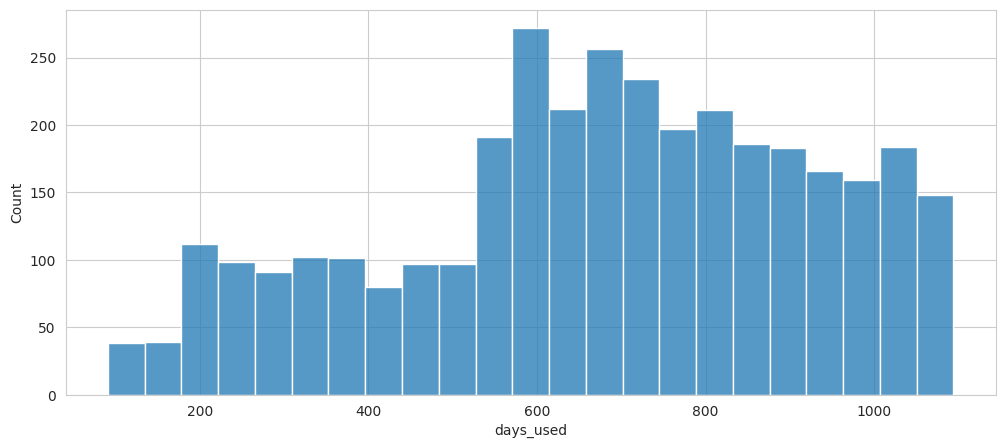

In [ ]:
#creating a boxplot and histogram to visualize days used

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='days_used');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='days_used');
plt.show()

In [ ]:
#Median is around 700 days
#No outliers
#We see there are no unused phones being resold, which is good because this is data for selling used phones, so this would have indicated an error in the data

#The histogram loosly resembles a normal distribution; on the right side it is closer to uniform

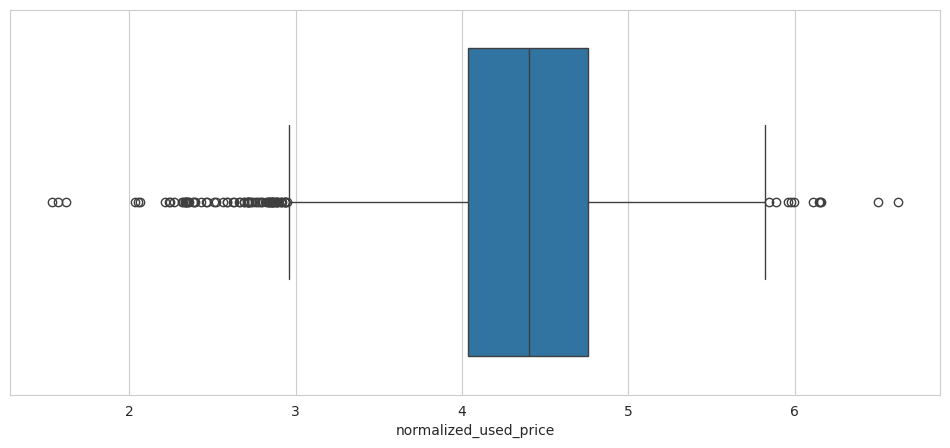

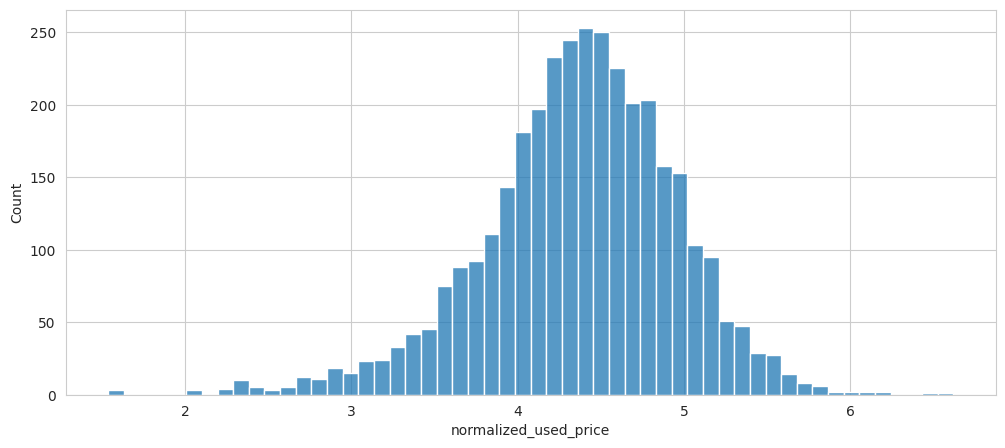

In [ ]:
#creating a boxplot and histogram to visualize the used price (price of the used/refurbished device in euros)

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='normalized_used_price');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='normalized_used_price');
plt.show()

In [ ]:
#Boxplot shows a median at around 4.5 (normalized number to be compared to original price)
#Many outliers on both ends, which is not surprising since this is typically what you would see on a reselling site

#histogram shows a normal distribution of prices

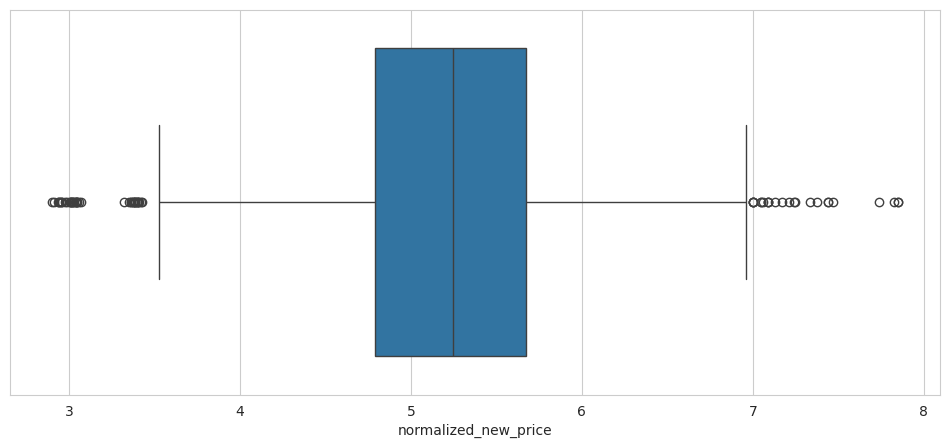

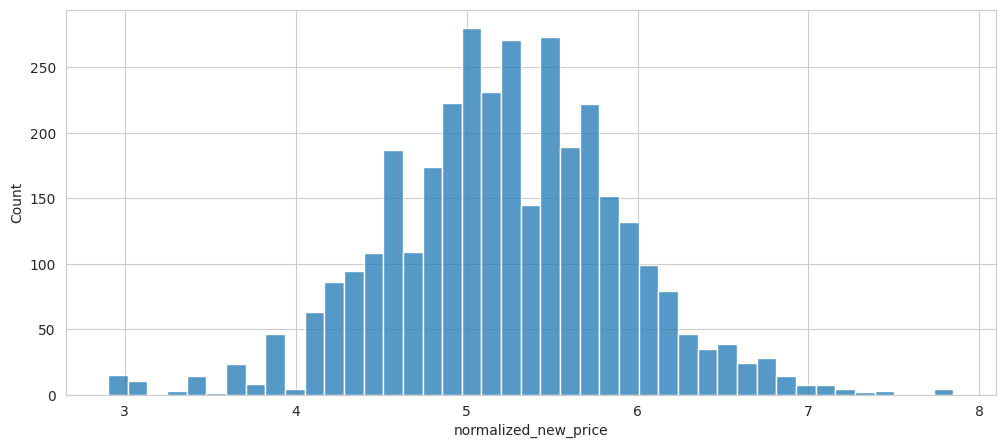

In [ ]:
#creating a boxplot and histogram to visualize the new price (price of a new device of the same model in euros)

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='normalized_new_price');
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='normalized_new_price');
plt.show()

In [ ]:
#histogram shows that the original price is not normally distributed - this is a very interesting finding since the reselling price was normally distributed
#this could be because new phones are more likely to be comprised of all low end or high end components
#however, the reselling price is effected by so many variables that are not all high or low end components since there may be certain issues with the phone, but other high end components
#or the opposite with lower quality components, but it is still in good condition

In [ ]:
#Most of these graphs did not have a normal distribution because although they can be continous variables, there are often more common standard sizes within the range, so the data will be concentrated at those values

In [ ]:
#BIVARIATE DATA ANALYSIS

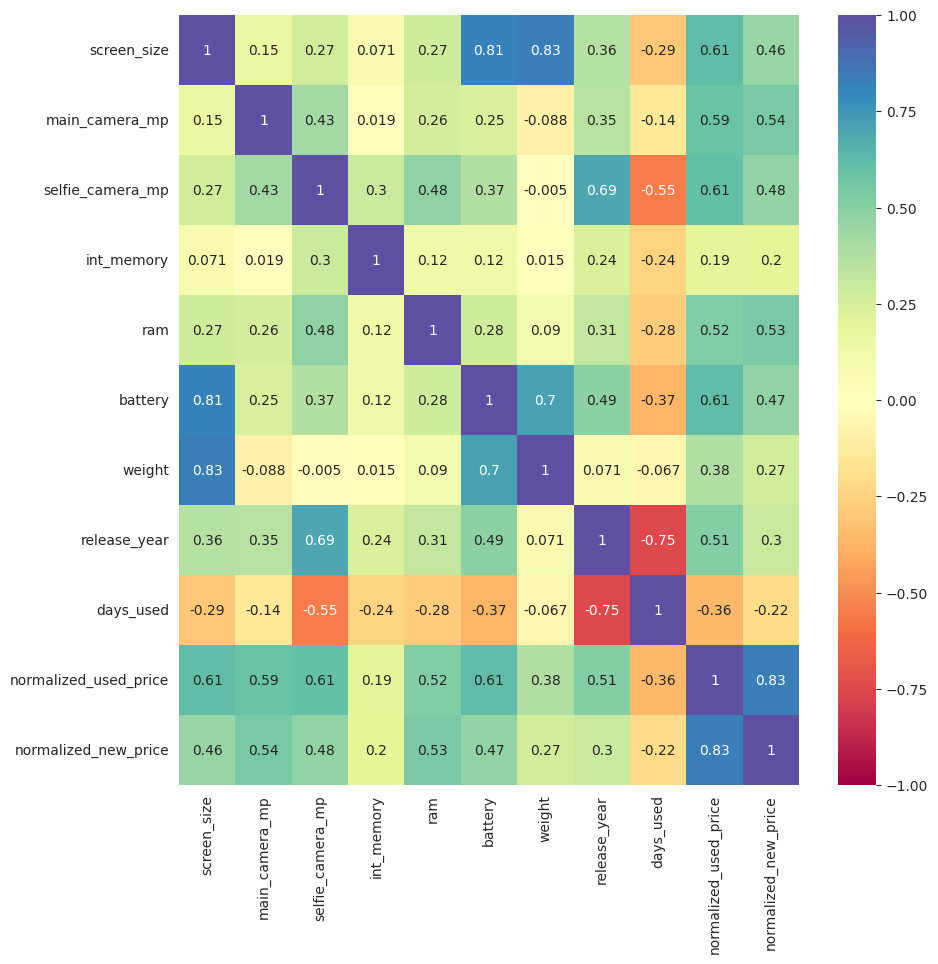

In [ ]:
#check correlation between each variable
num_vars = []
for column in data.columns:
  if data[column].dtype == 'float' or data[column].dtype == 'int':
    num_vars.append(column)

plt.figure(figsize=(10,10))
sns.heatmap(data[num_vars].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1);

In [ ]:
#High positive correlations between screen size and weight, screen size and battery, battery and screen size, battery and weight, weight and screen size, normalized used price and normalized old price
#Moderate positive correlations between screen size and normalized used price, main camera resolution and normalized used price, main camera resolution and normalized new price, selfie camer resolution and release year, ram and normalized used price, ram and normalized new price, battery and normalized used price, release year and normalized used price
#High negative correlations: release year and days used
#Moderate negative correlations: days used and selfie camera

#Significant findings:
#selfie camera resolution had a much higher correlation with the used price than the new price; could indicats that this is a component that people value more now, so if a phone has bad selfie camera quality it will likely have lower value; more likely, this is a multicollinearity issue with selfie camera quality having a relationship with release year, which has a greater effect on resell price
#selfie camera resolution had a much more significant positive correlation with release year than rear cameras did, indicating that selfie camera resoltion was increasing drastically with release year after 2014, so companies were improving on selfie cameras much more than rear cameras
#battery has a much higher correlation with normalized used price than normalized new price, indicating that battery size is a component of the device that holds value over the years; larger battery=good reselling price
#release year has a 0.51 correlation with reselling price - significant because I expected it to be a stronger correlation; means this is not the sole indicator or even a significant driving indicator in reselling price

In [ ]:
num_vars

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [ ]:
cat_vars = []
for column in data.columns:
  if data[column].dtype != 'float' and data[column].dtype != 'int':
    cat_vars.append(column)

cat_vars

['brand_name', 'os', '4g', '5g']

In [ ]:
def make_bp(cat, num):
  plt.figure(figsize=(10,10))
  plt.xticks(rotation=90)
  plt.title(f"{cat} versus {num}")
  plt.xlabel(cat)
  plt.ylabel(num)
  sns.boxplot(data=data,x=cat,y=num, showmeans=True);

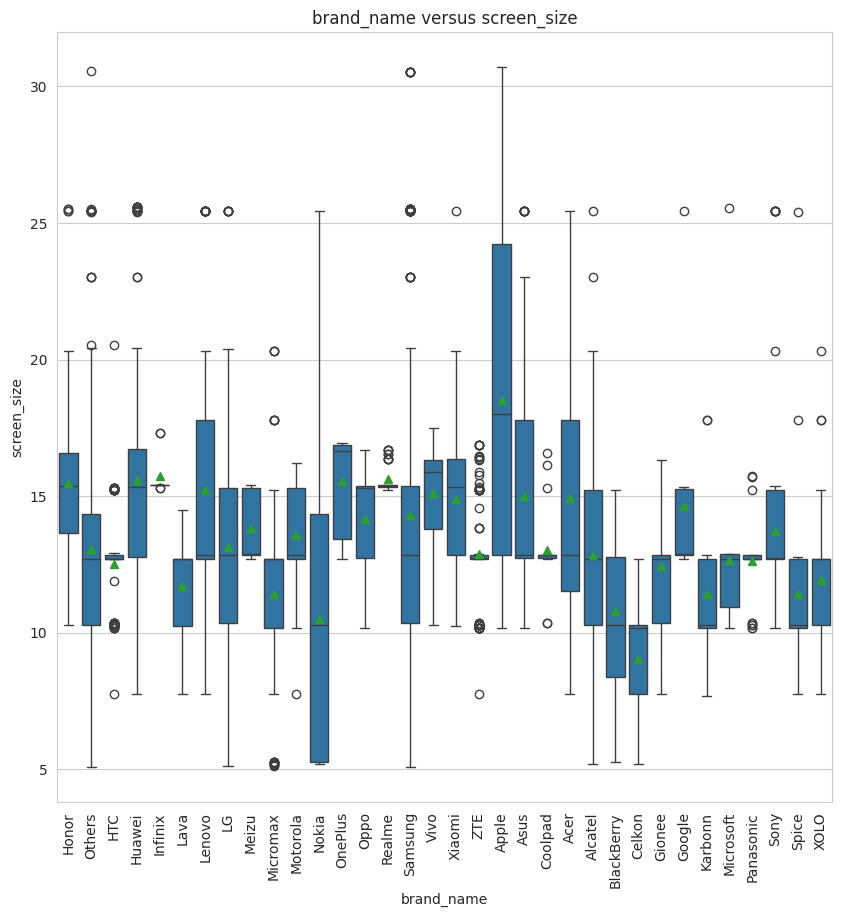

In [ ]:
#create boxplot for brand name versus screen size
make_bp('brand_name','screen_size')

In [ ]:
#Looks like Nokia has some of the smallest phones being sold by screen size; Apple has some of the largest
#However, both brands have large variance because they have so many different types of phones with different screen sizes

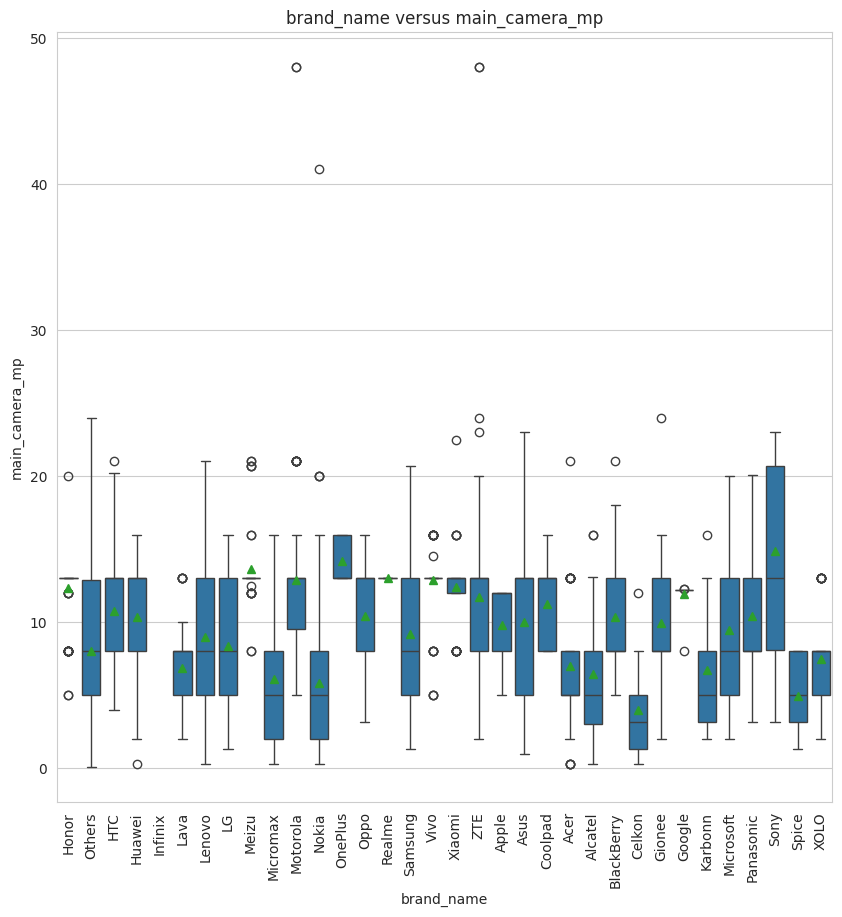

In [ ]:
#create boxplot for brand name versus main camera mp
make_bp('brand_name','main_camera_mp')

In [ ]:
#Motorola, Nokia, and ZTE have some very significant outliers with extremely high resolution

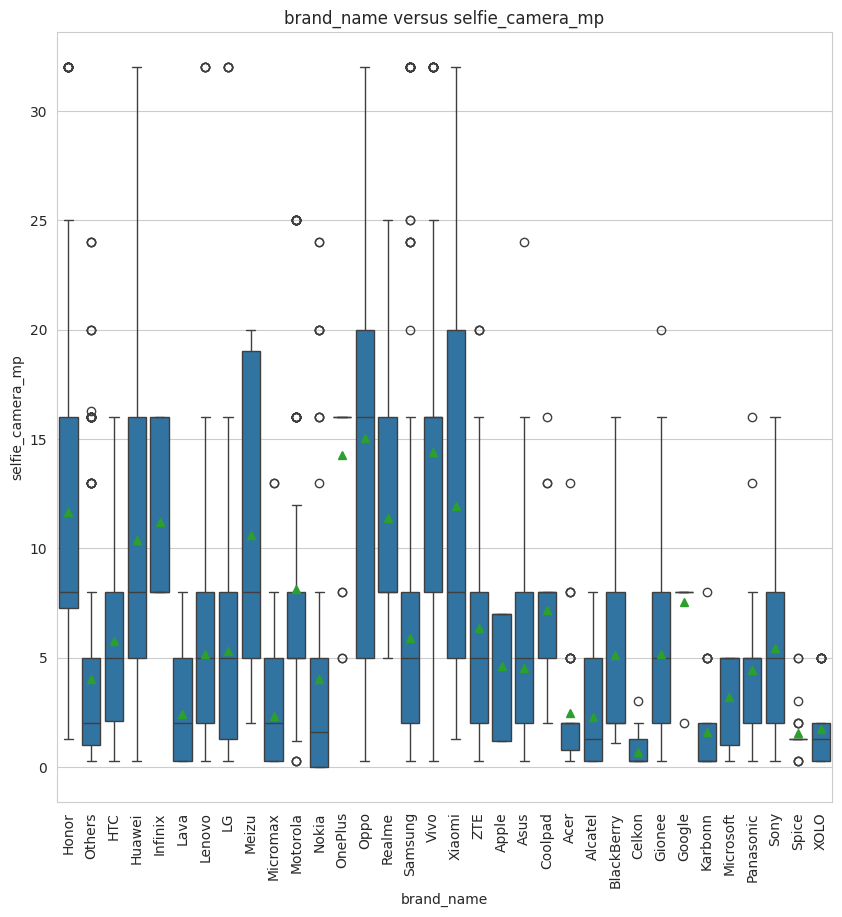

In [ ]:
#create boxplot for brand name versus selfie camera mp
make_bp('brand_name','selfie_camera_mp')

In [ ]:
#Less extreme outliers on this graph; shows mist companies prioritize strengthening the resolution on the rear camera than the front camera

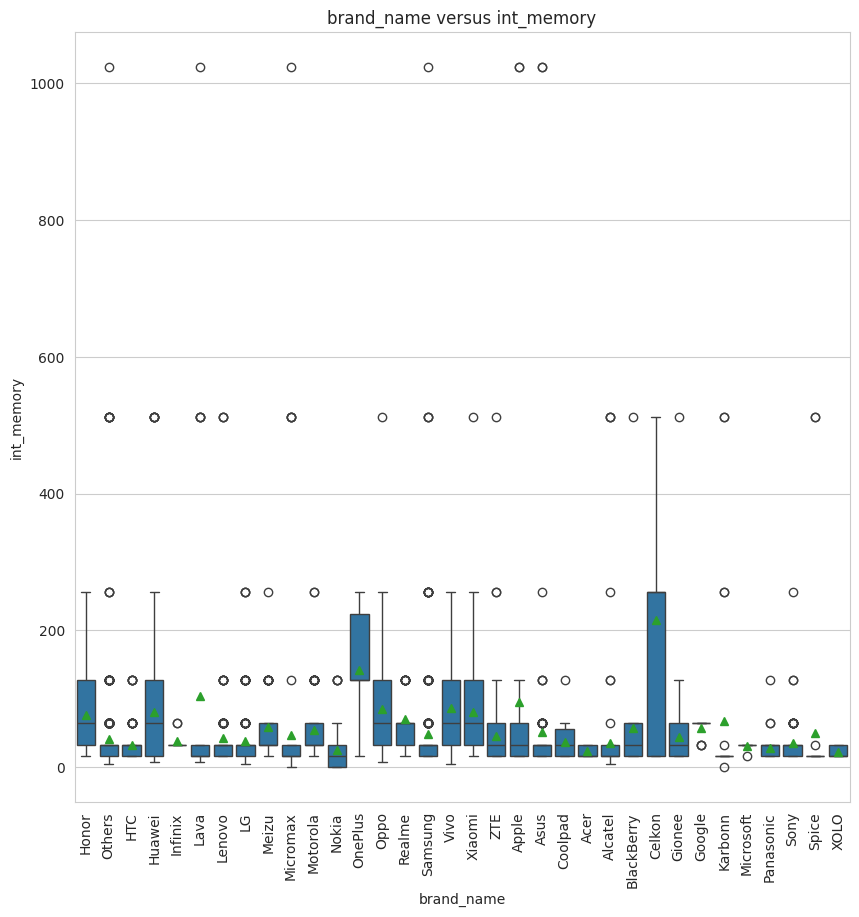

In [ ]:
#create boxplot for brand name versus int_memory
make_bp('brand_name','int_memory')

In [ ]:
#Most brands have lower overall internal memory, with many high outliers

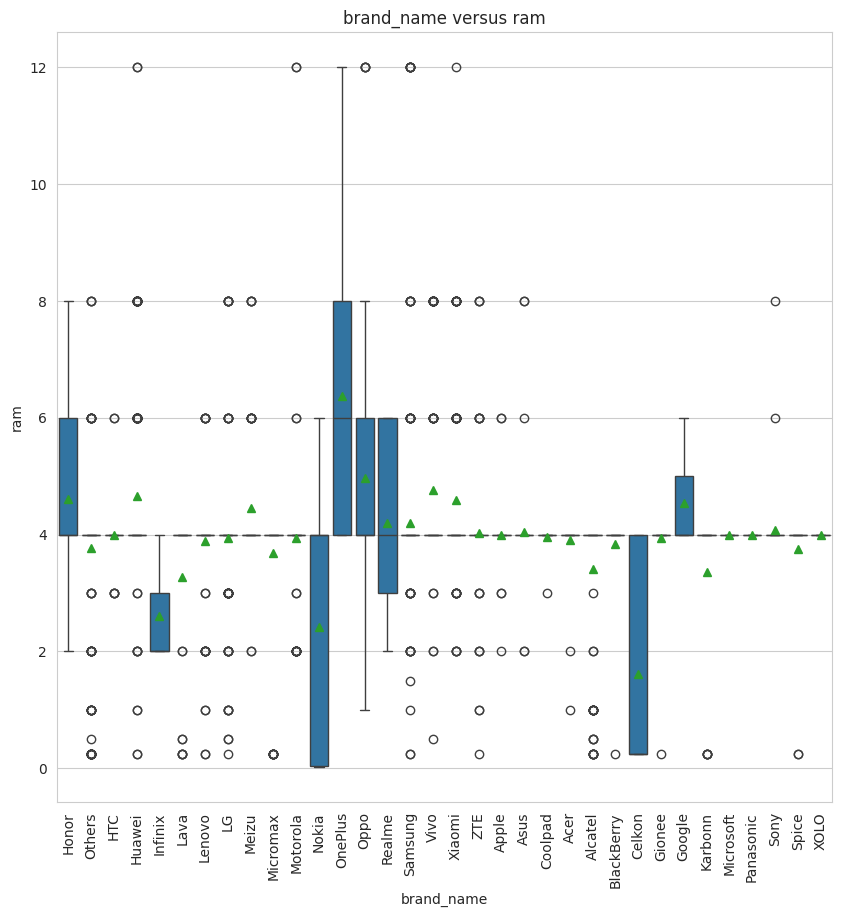

In [ ]:
#create boxplot for brand name versus ram
make_bp('brand_name','ram')

In [ ]:
#Oneplus' ram size is well above the overall median

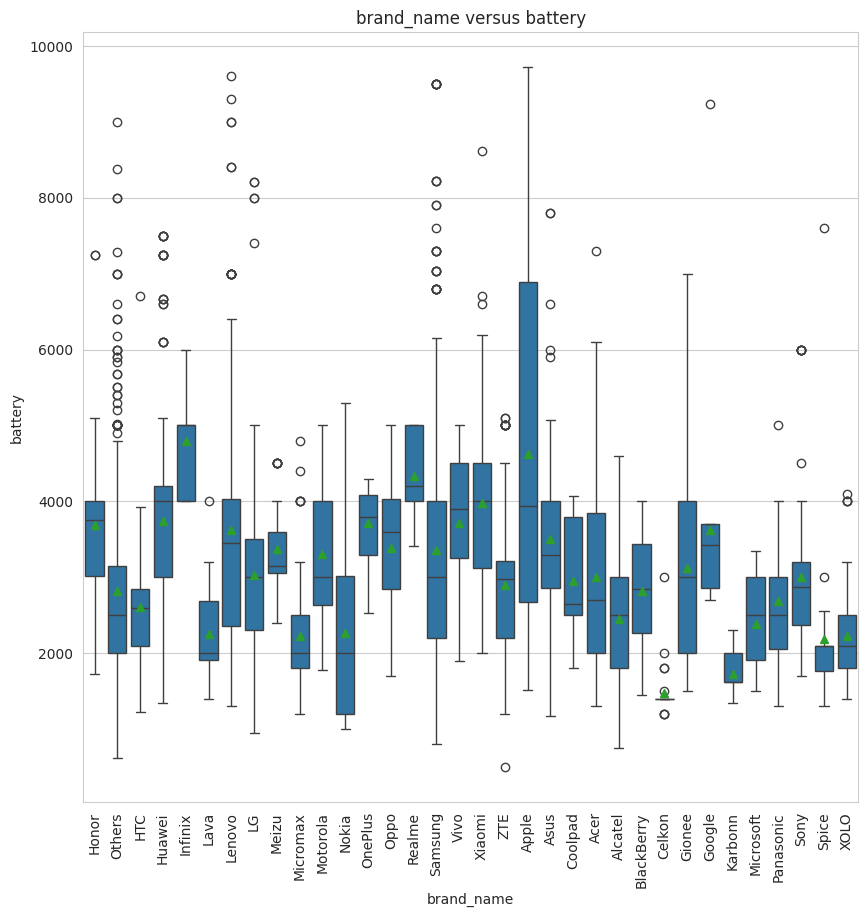

In [ ]:
#create boxplot for brand name versus main battery
make_bp('brand_name','battery')

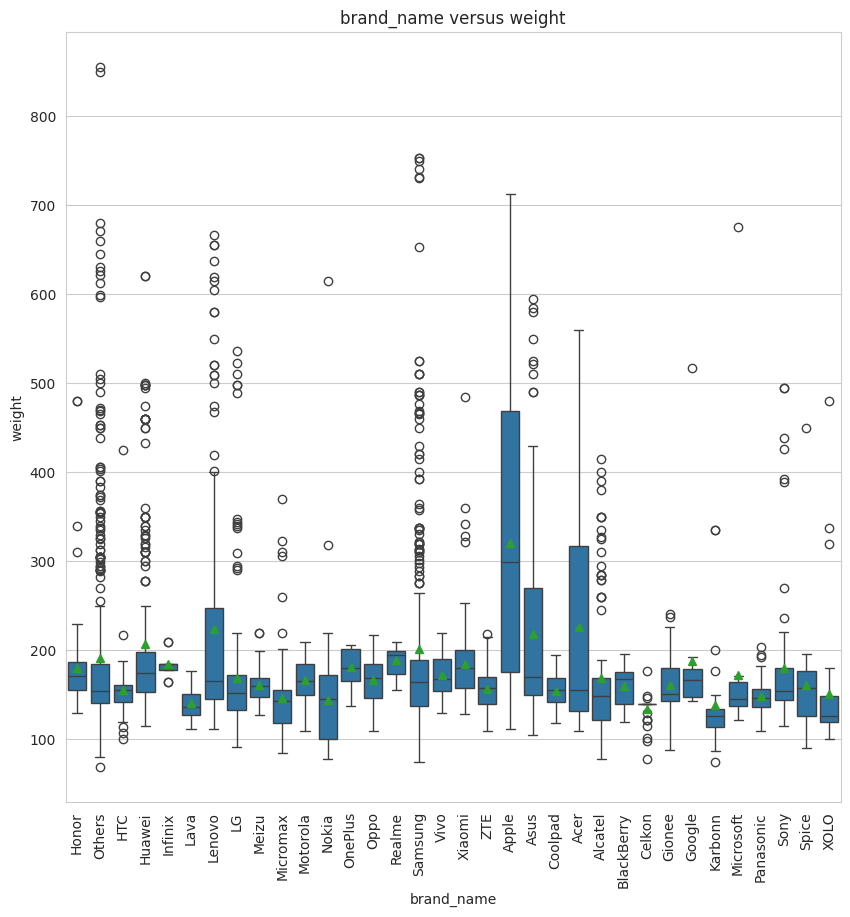

In [ ]:
#create boxplot for brand name versus weight
make_bp('brand_name','weight')

In [ ]:
#Apple has created a wide range of phones of varius weights; stands out as having particularly large values in IQR
#Samsung has made many lightweight devices

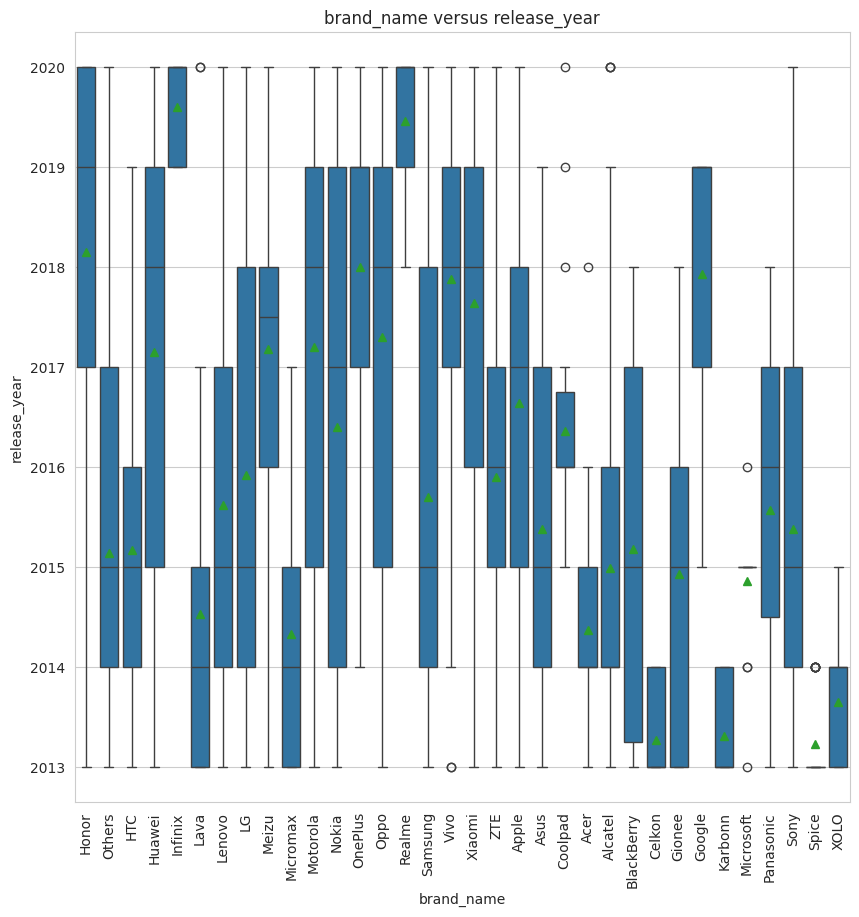

In [ ]:
#create boxplot for brand name versus realese year
make_bp('brand_name','release_year')

In [ ]:
#This graph shows which companies only have devices from earlier dates indicating they stopped producing phones earlier on (could mean greater resell value if they are a collector's item)
#Some of the brands include Celkon and Karbonn

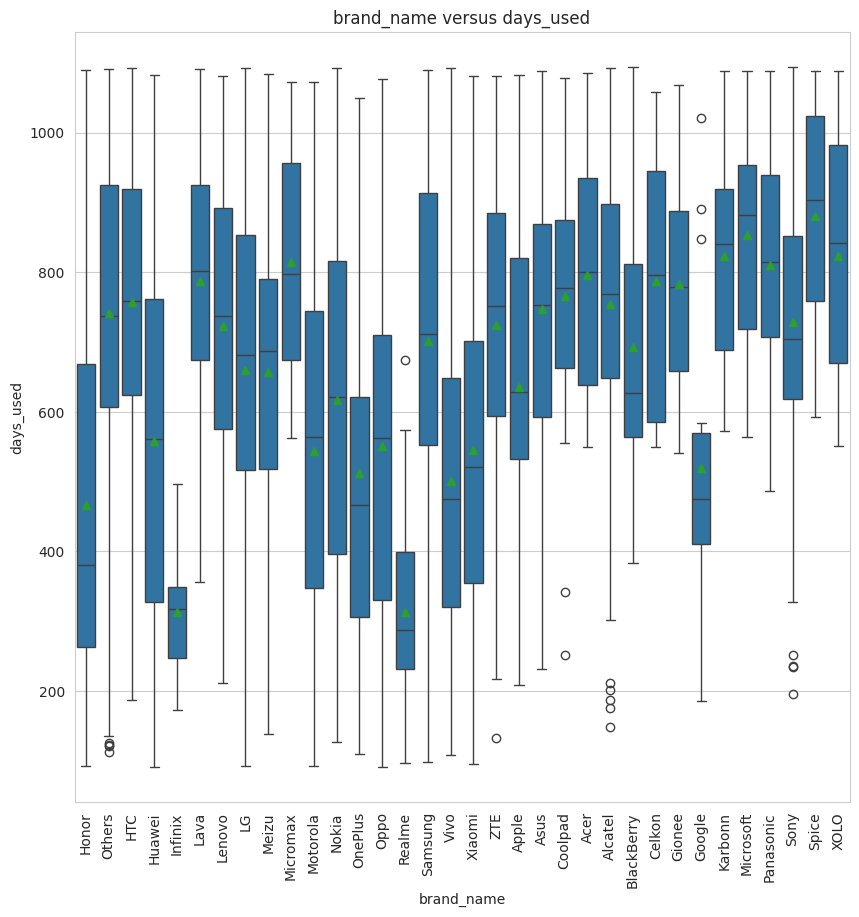

In [ ]:
#create boxplot for brand name versus days used
make_bp('brand_name','days_used')

In [ ]:
#Google, Realme, and Infinix phones were resold despite having fewer days of use, so do these brands have higher value overall?

print(f"Mean normalized price of used Google Device: {data[data['brand_name']=='Google']['normalized_used_price'].mean()}")
print(f"Mean normalized price of used Realme Device: {data[data['brand_name']=='Realme']['normalized_used_price'].mean()}")
print(f"Mean normalized price of used Infinix Device: {data[data['brand_name']=='Infinix']['normalized_used_price'].mean()}")
print(f"Mean normalized price of all used Devices: {data['normalized_used_price'].mean()}")

Mean normalized price of used Google Device: 4.885650815955524
Mean normalized price of used Realme Device: 4.594316498166561
Mean normalized price of used Infinix Device: 4.391207355096248
Mean normalized price of all used Devices: 4.364712079133227


In [ ]:
#They all have a slightly above average resale price

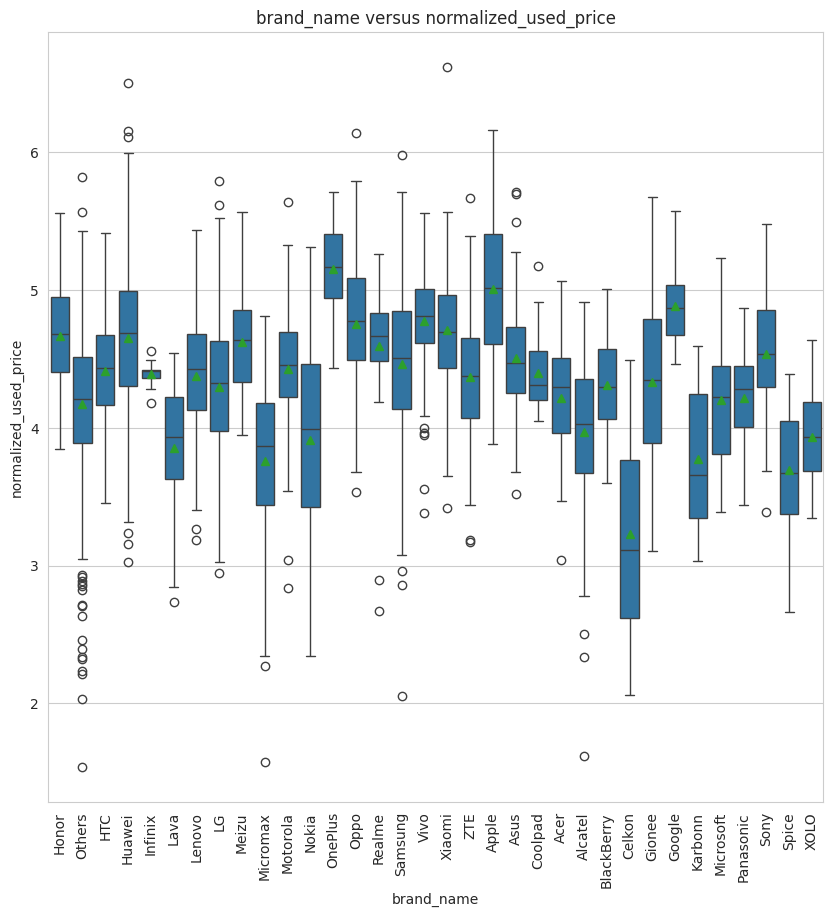

In [ ]:
#create boxplot for brand name versus used price
make_bp('brand_name','normalized_used_price')

In [ ]:
#Apple overall has highest resale values
#Theory that brands that stopped selling earlier would have extreme outliers because they are being sold as collector's items does not seem to be true based on this graph

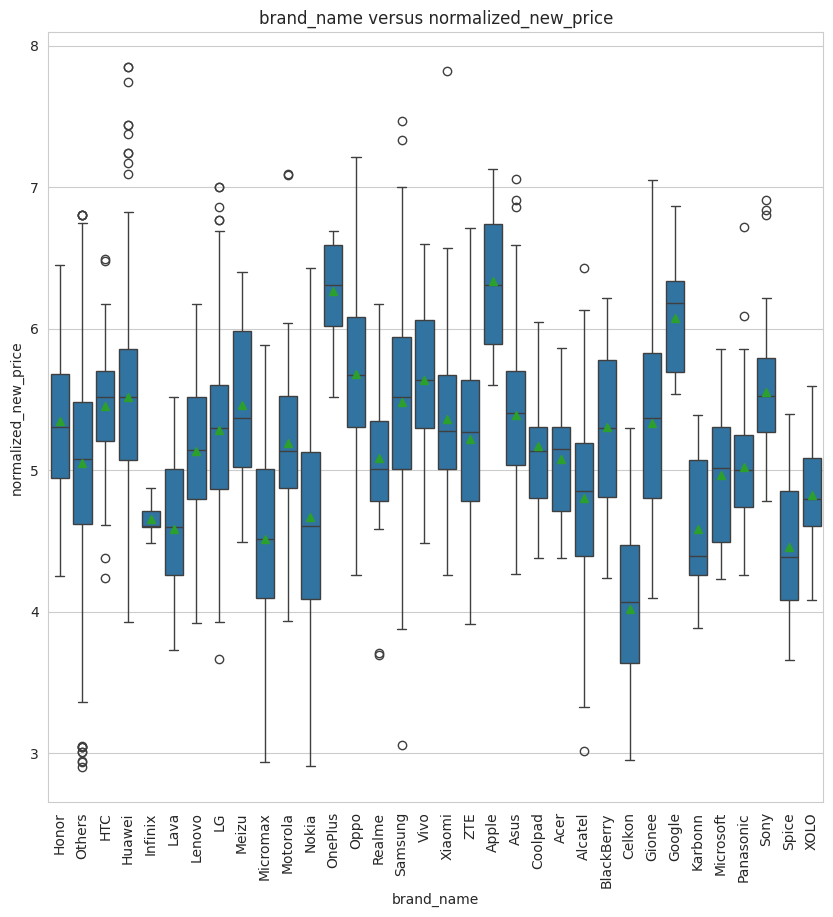

In [ ]:
#create boxplot for brand name versus used price
make_bp('brand_name','normalized_new_price')

In [ ]:
#for the most part this graph looks pretty similar to the boxplots for used prices per brand, showing brands have similar variance in price between resale price and initial price

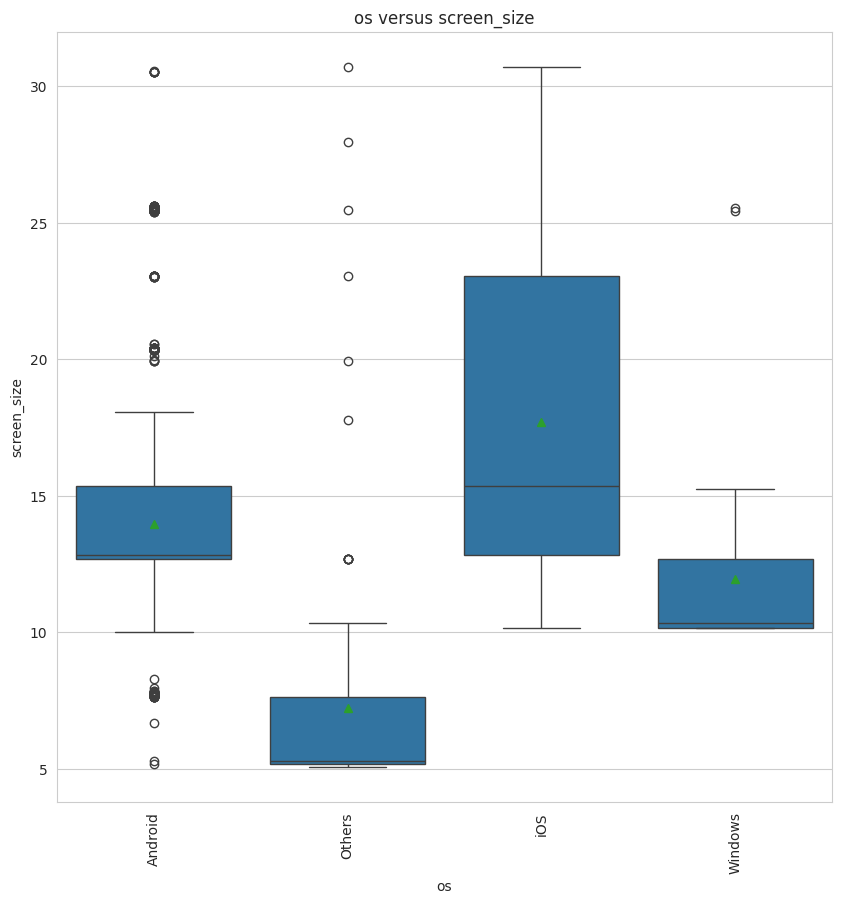

In [ ]:
#create boxplot for operating system versus screen size
make_bp('os','screen_size')

In [ ]:
#IOS tends to have larger screens

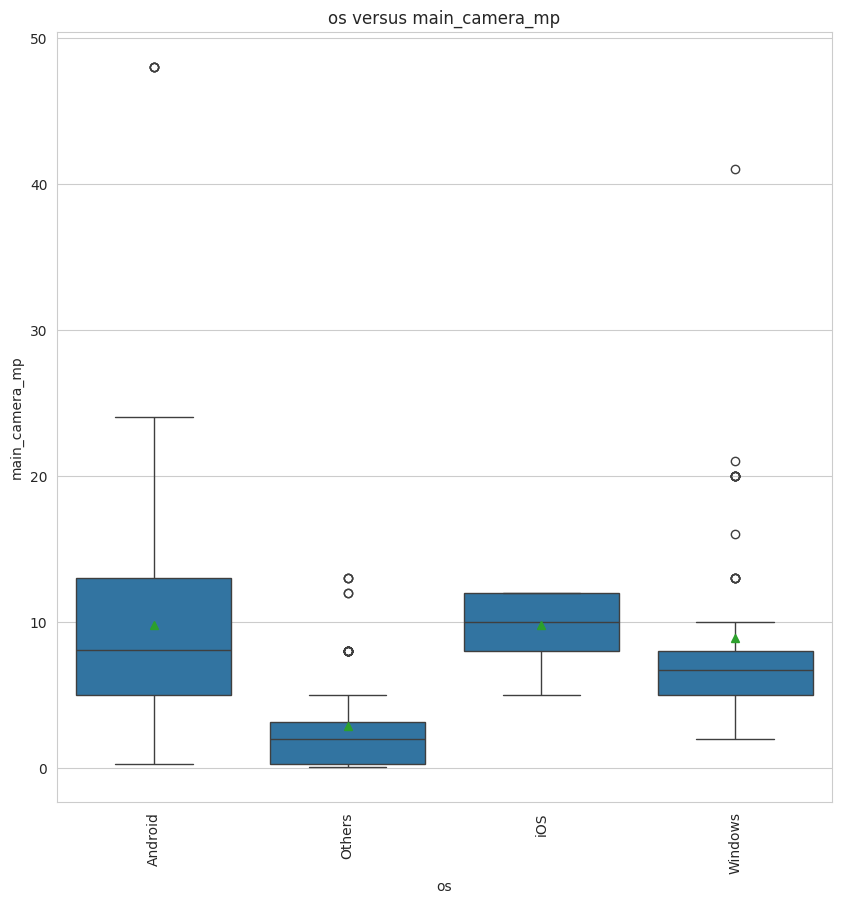

In [ ]:
#create boxplot for operating system versus main camera resolution
make_bp('os','main_camera_mp')

In [ ]:
#Android tends to have highest main camera resolution

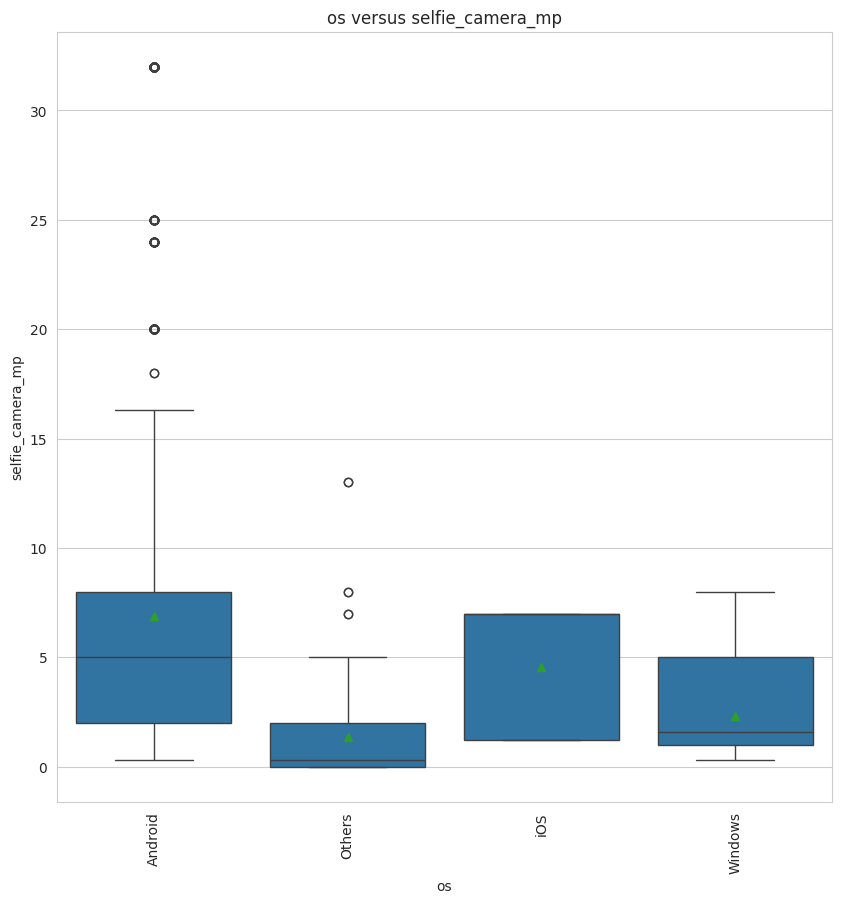

In [ ]:
#create boxplot for operating system versus selfie resolution
make_bp('os','selfie_camera_mp')

In [ ]:
#Consistent results with previous graph - Android also tends to have hightest selfie camera resolution

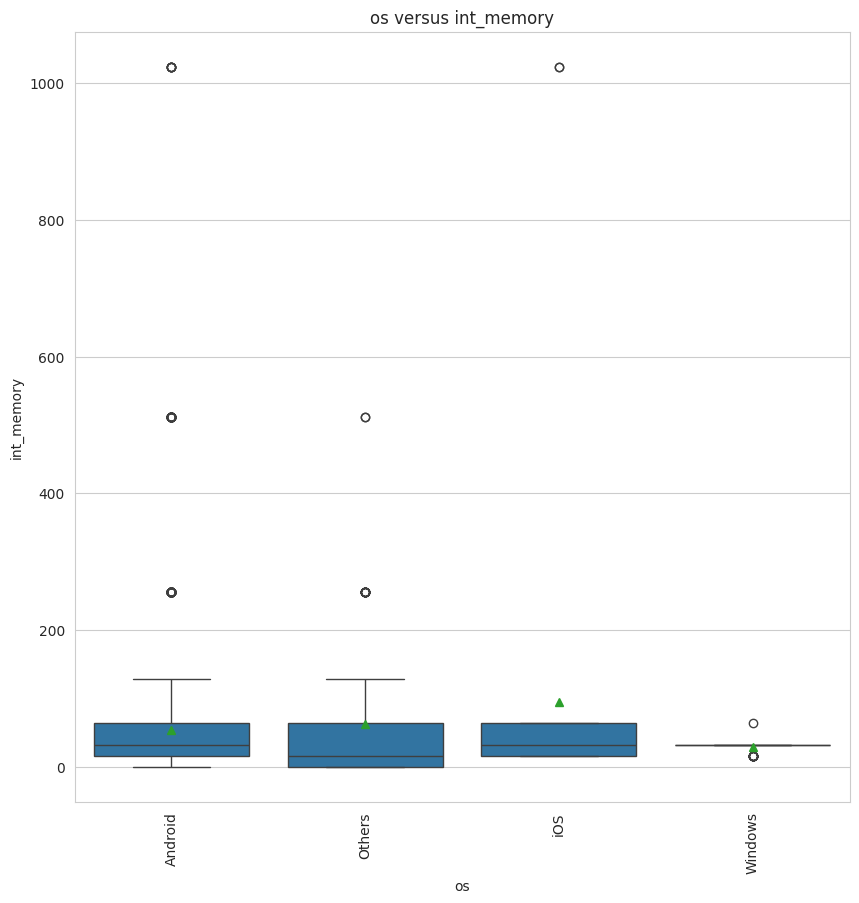

In [ ]:
#create boxplot for operating system versus memory
make_bp('os','int_memory')

In [ ]:
#Android and IOS both have some very extreme outliers with very high internal memory
#However, internal memory is not highly coreelated with either new or resale price

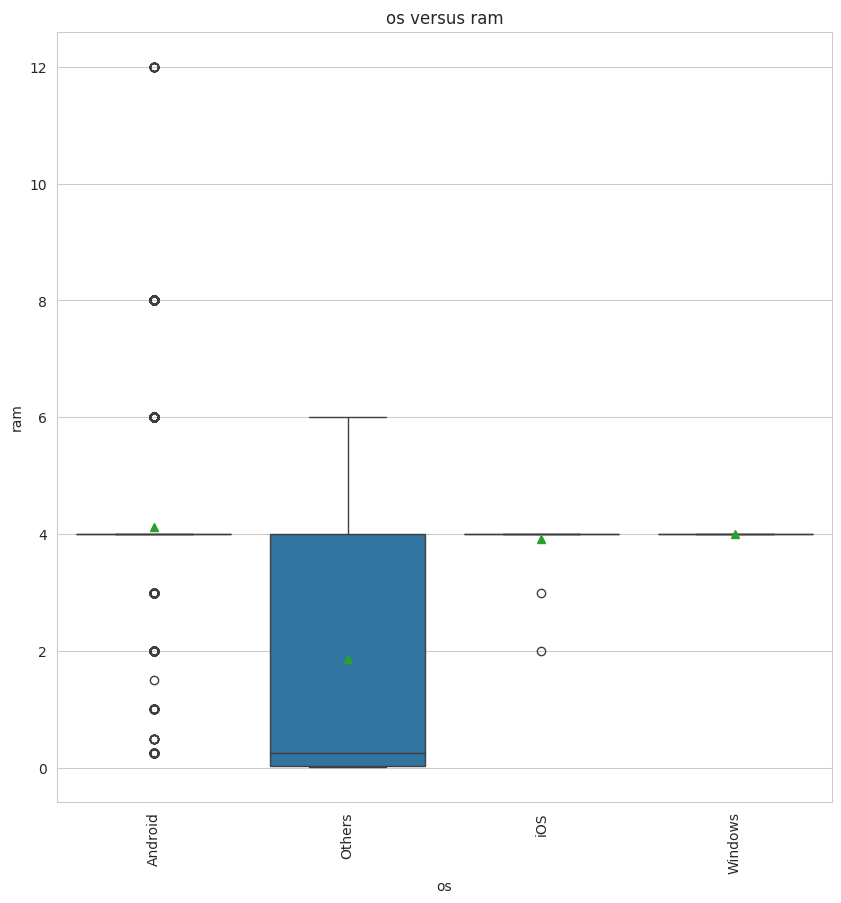

In [ ]:
#create boxplot for operating system versus ram
make_bp('os','ram')

In [ ]:
#Android has a couple extreme outliers with very high and low ram

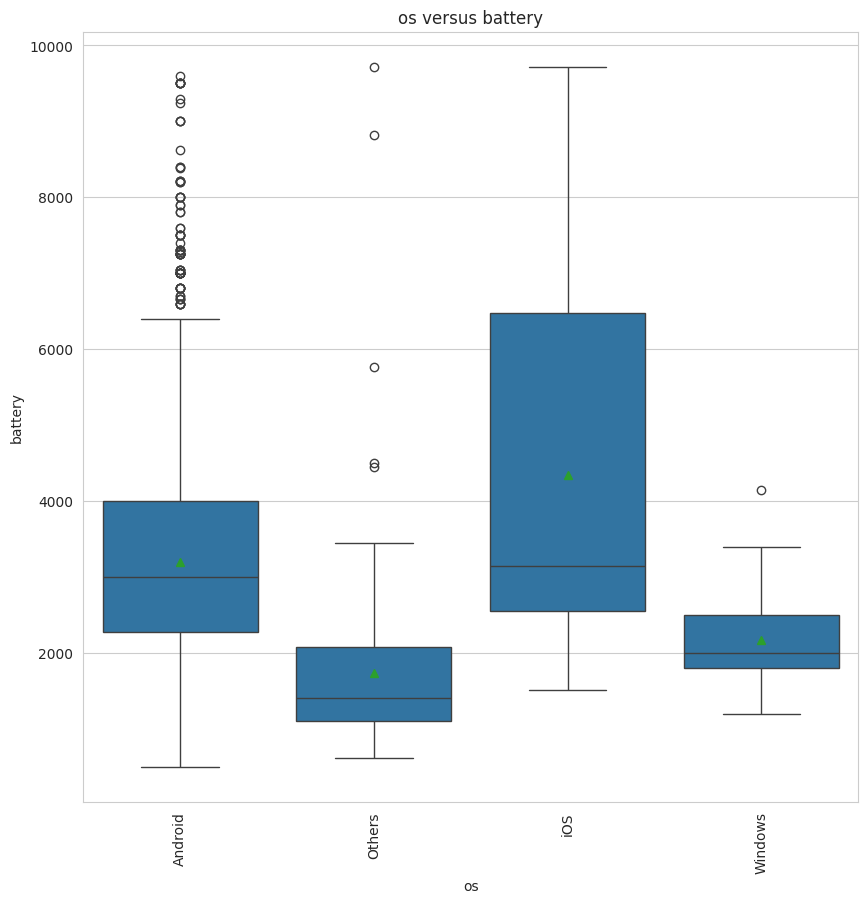

In [ ]:
#create boxplot for operating system versus battery
make_bp('os','battery')

In [ ]:
#IOS seems to have the most consitently large battery energy capacity

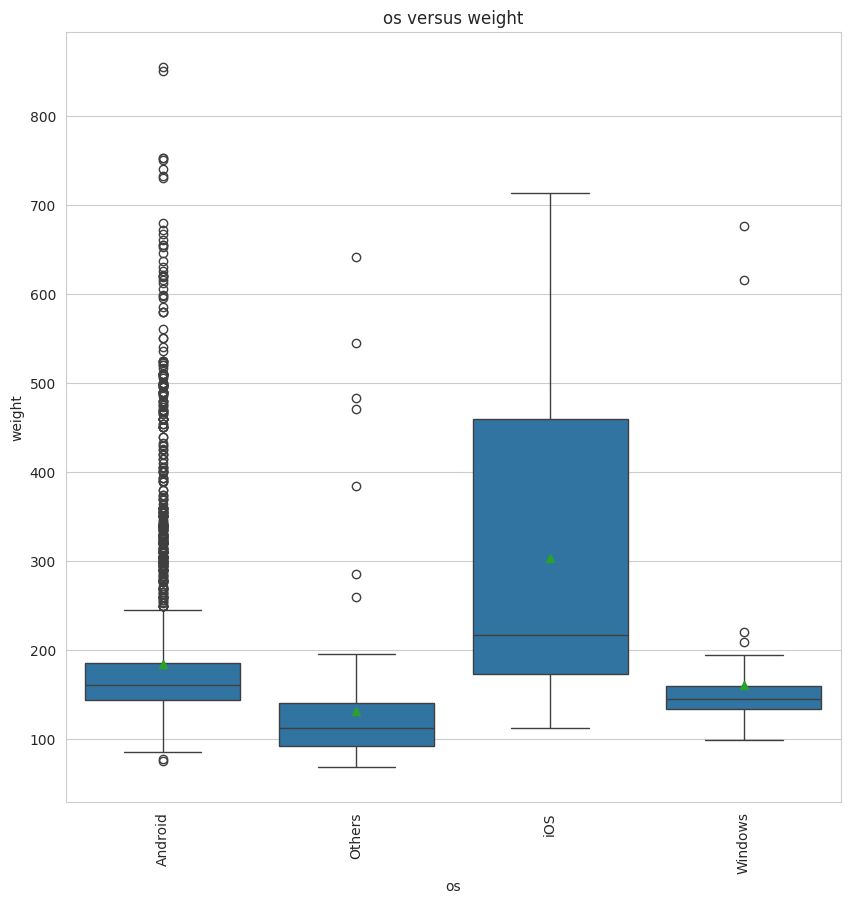

In [ ]:
#create boxplot for operating system versus weight
make_bp('os','weight')

In [ ]:
#Android, again has many outliers
#IOS has the most consistently heavy devices

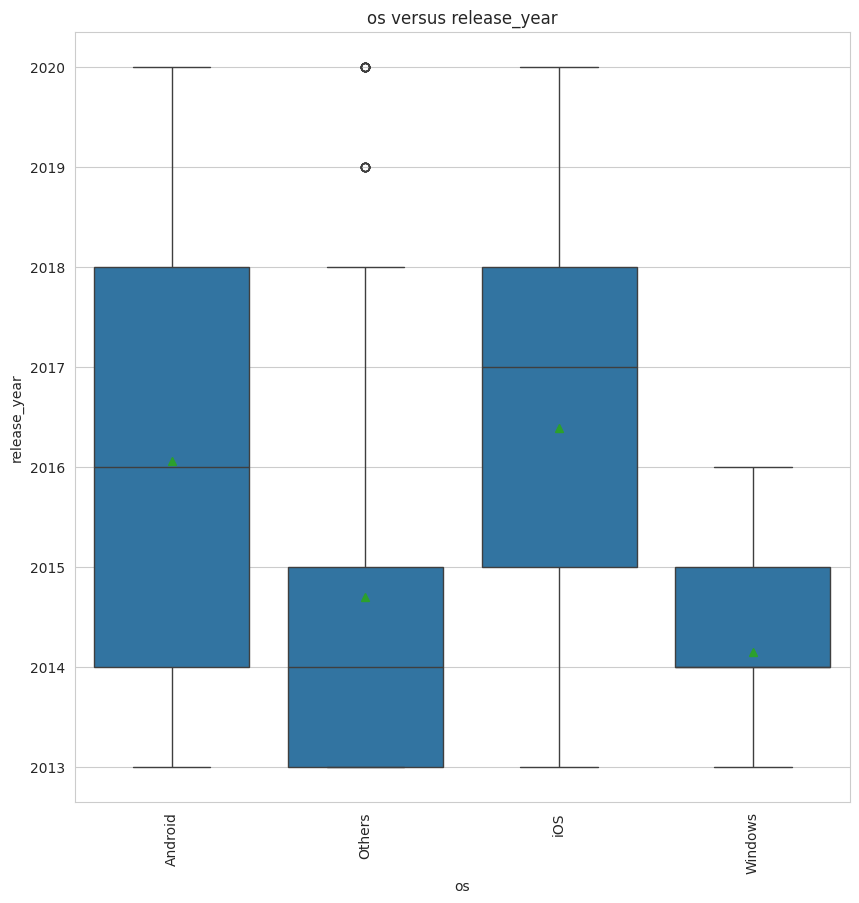

In [ ]:
#create boxplot for operating system versus ram
make_bp('os','release_year')

In [ ]:
#Out of the devices being resold, Android and IOS are on devices from all years
#Windows and other os are mainly on older devices

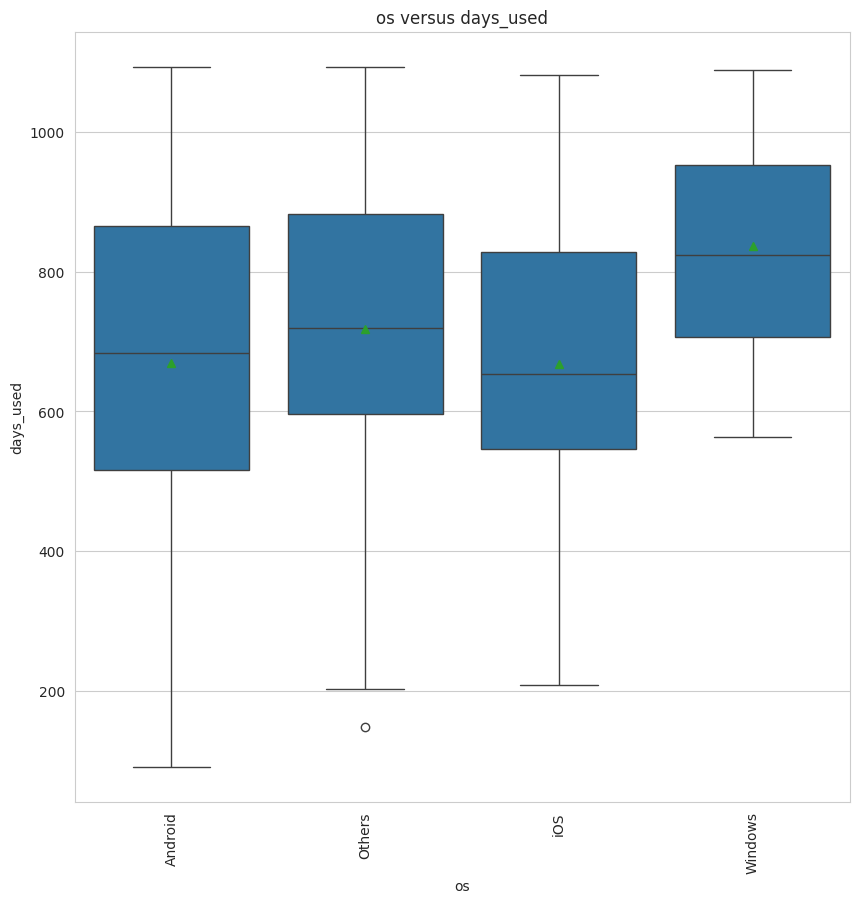

In [ ]:
#create boxplot for operating system versus days used
make_bp('os','days_used')

In [ ]:
#Pretty similar boxplots
#Android has the most consitently resold devices that were used for fewer days

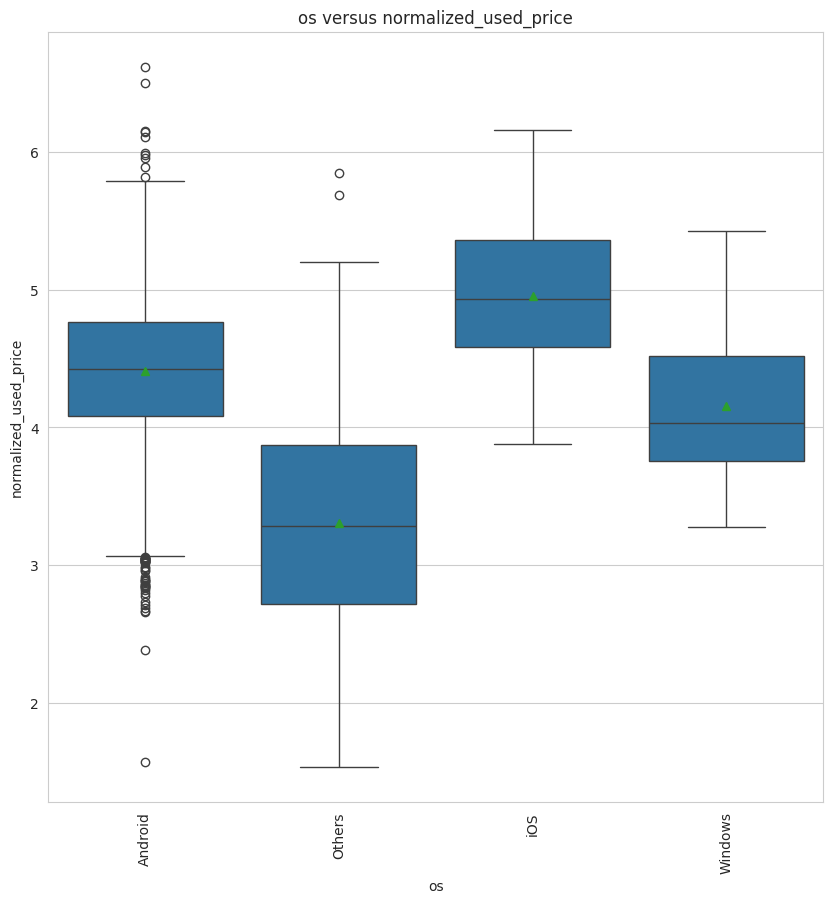

In [ ]:
#create boxplot for operating system versus normalized used price
make_bp('os','normalized_used_price')

In [ ]:
#Devices with Android of IOS on them are the most consistently resold devices at a higher price
#Android has many outliers on both ends

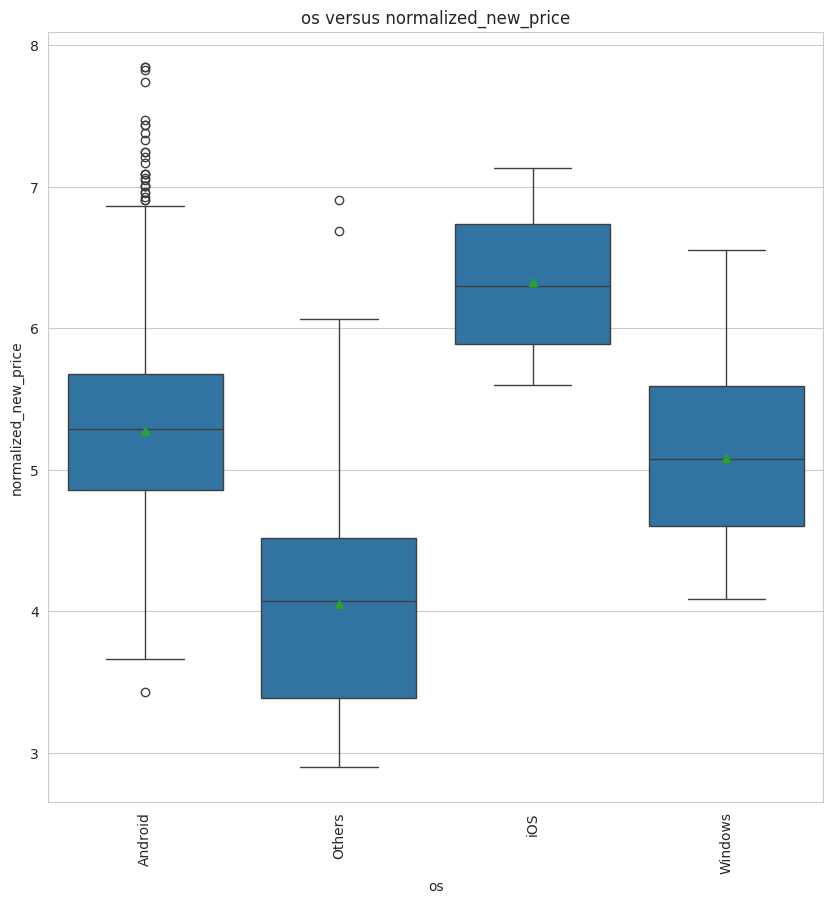

In [ ]:
#create boxplot for operating system versus normalized new price
make_bp('os','normalized_new_price')

In [ ]:
#Very similar graphs for new and used device prices

In [ ]:
#Android has many outliers in the graphs for operating systems; means this operating system is used on a wide variety of devices

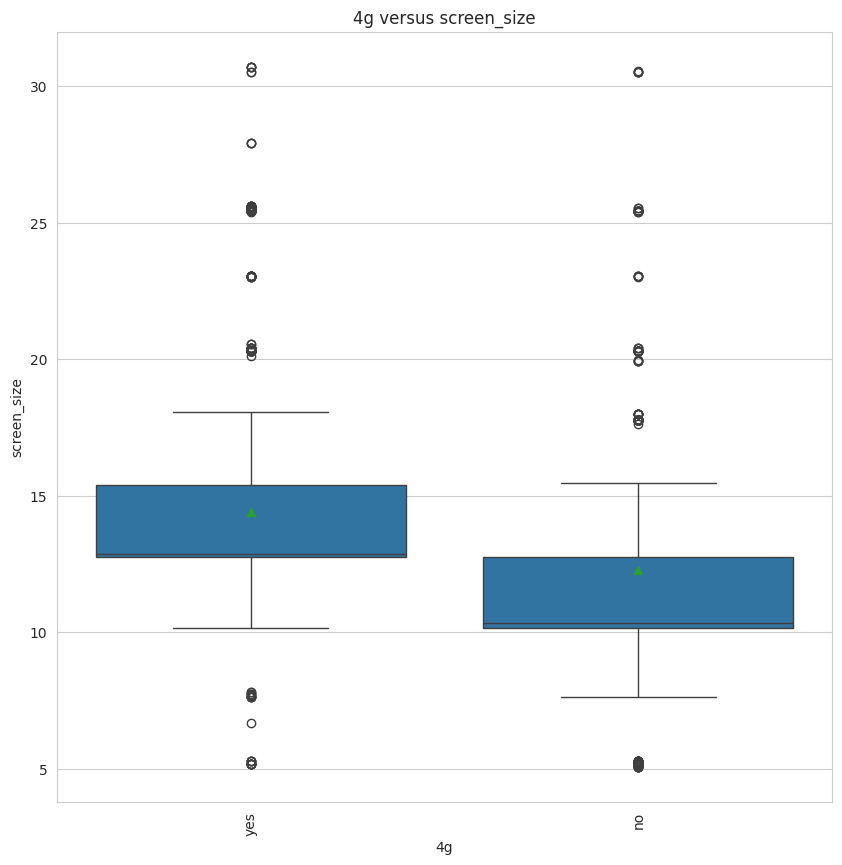

In [ ]:
#create boxplot for whether or not device has 4g versus screen size
make_bp('4g','screen_size')

In [ ]:
#Devices with 4g tend to have larger screen sizes

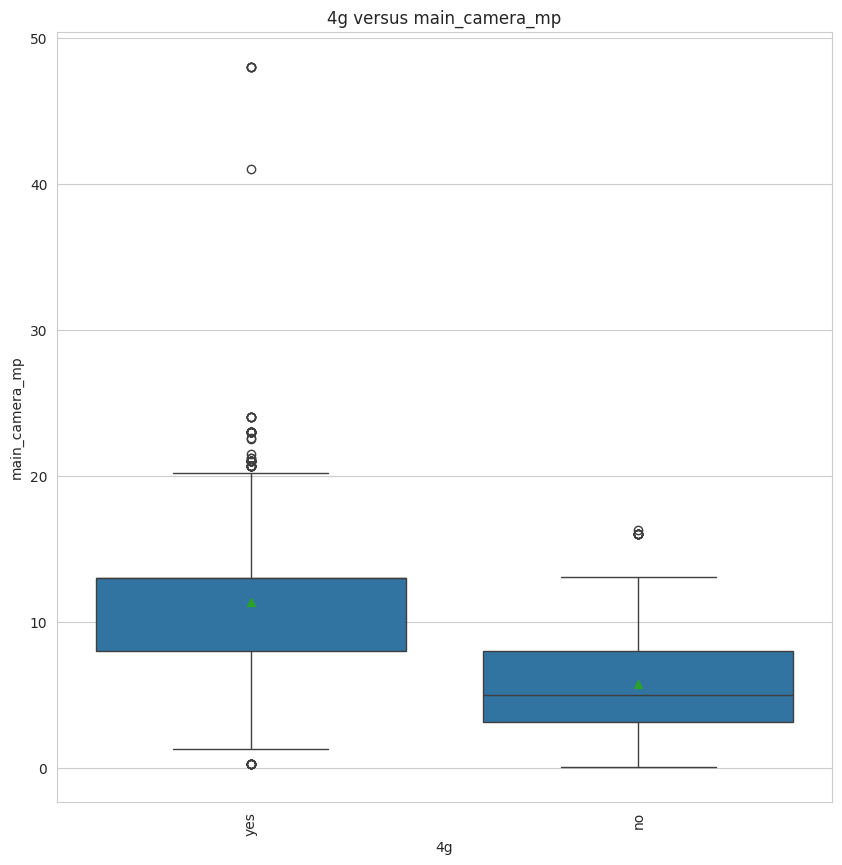

In [ ]:
#create boxplot for whether or not device has 4g versus main camera resolution
make_bp('4g','main_camera_mp')

In [ ]:
#Devices with 4g tend to have higher main camera resolution

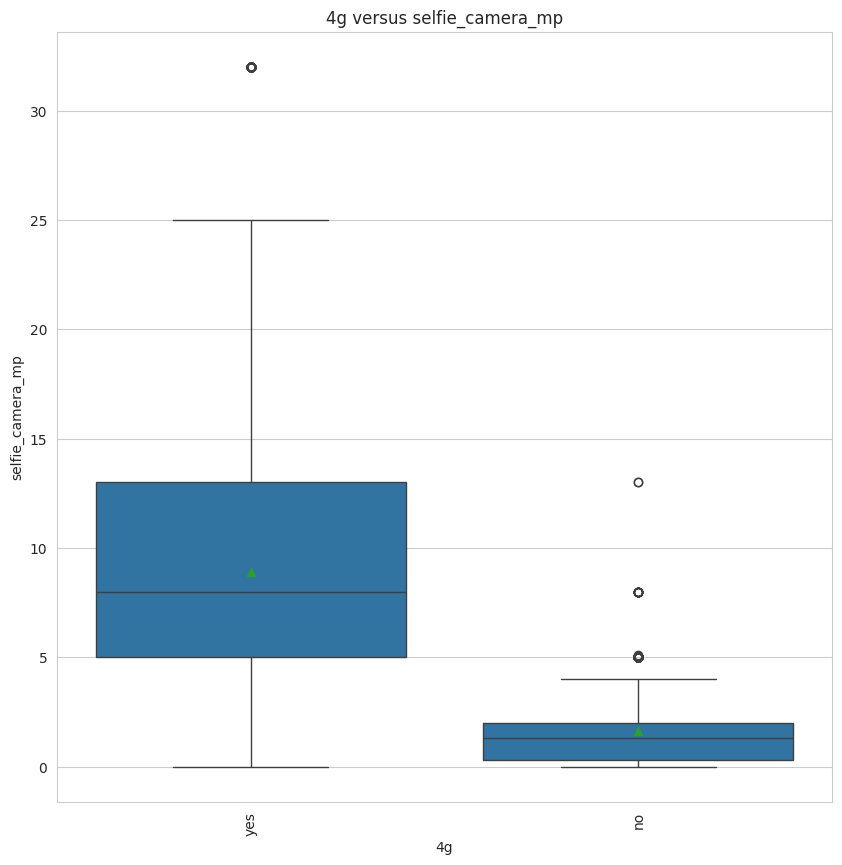

In [ ]:
#create boxplot for whether or not device has 4g versus selfie camera resolution
make_bp('4g','selfie_camera_mp')

In [ ]:
#Devices with 4g tend to have higher selfie camera resolution - consistent with previous graph

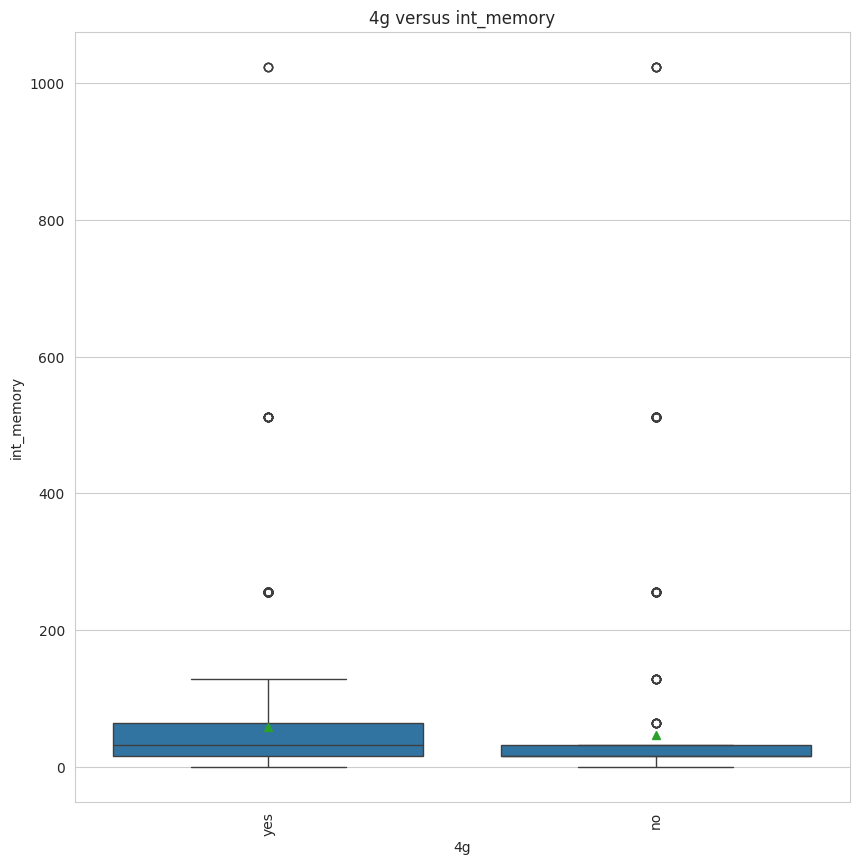

In [ ]:
#create boxplot for whether or not device has 4g versus memory
make_bp('4g','int_memory')

In [ ]:
#Devices with 4g tend to have larger memory; however, both have extreme large outliers, so there are some devices without 4g, but with large memory

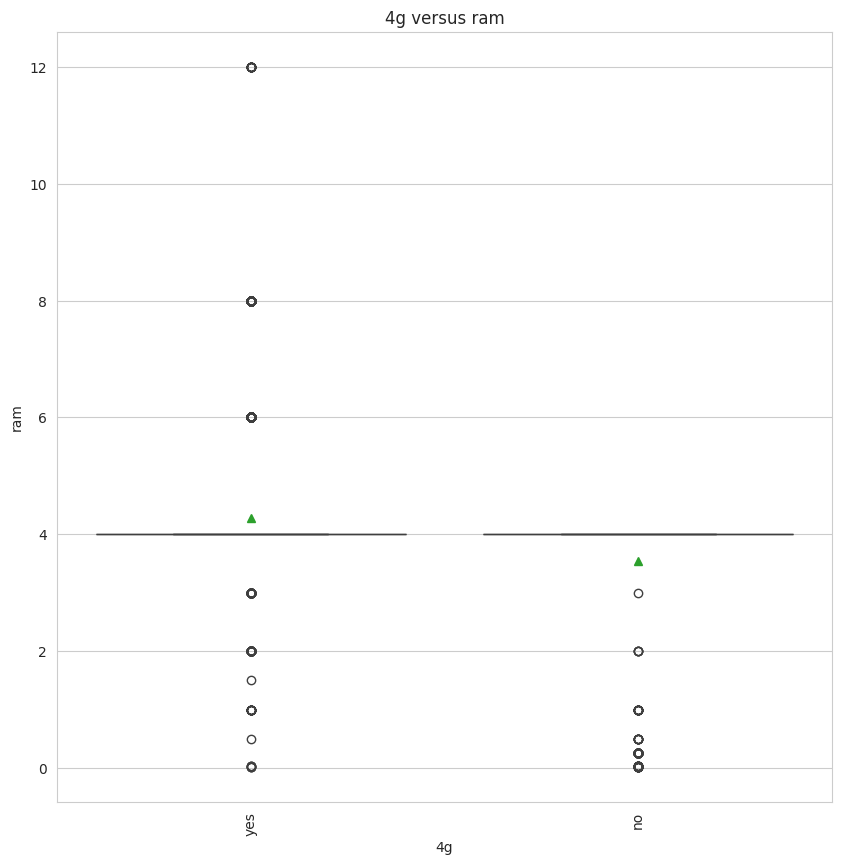

In [ ]:
#create boxplot for whether or not device has 4g versus ram
make_bp('4g','ram')

In [ ]:
#Both devices with and with 4g have extreme outliers on the low end of ram
#however, only devices with 4g have outliers on the higher end of ram

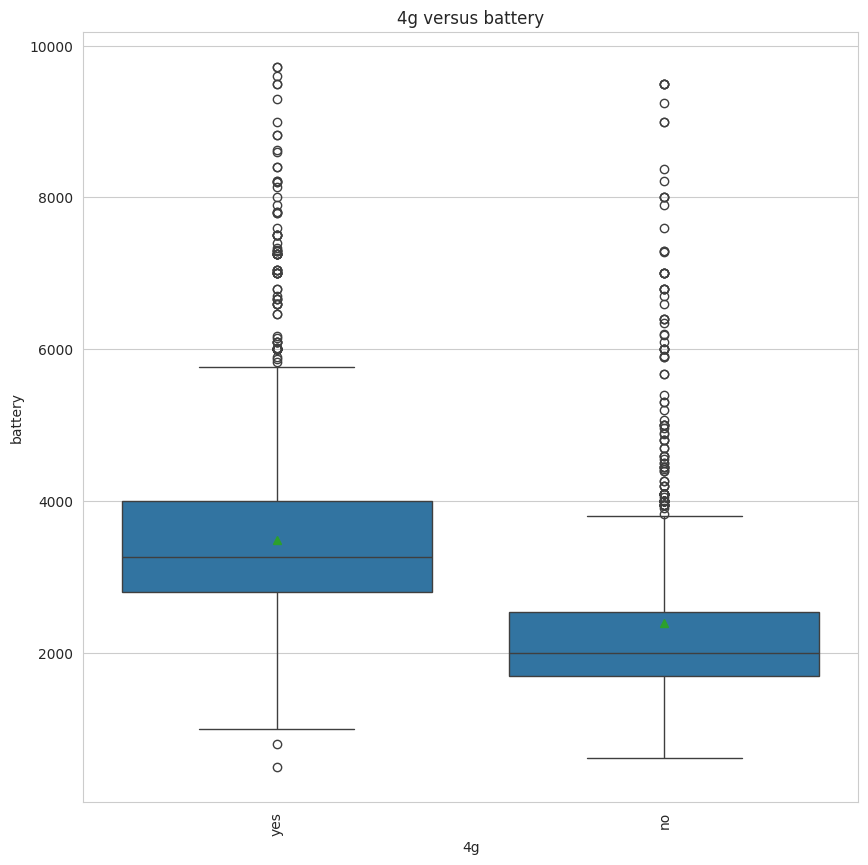

In [ ]:
#create boxplot for whether or not device has 4g versus battery
make_bp('4g','battery')

In [ ]:
#Devices with 4g tend to have larger battery
#However, devices without 4g have many high outliers, meaning they do have some devices without 4g and a large battery

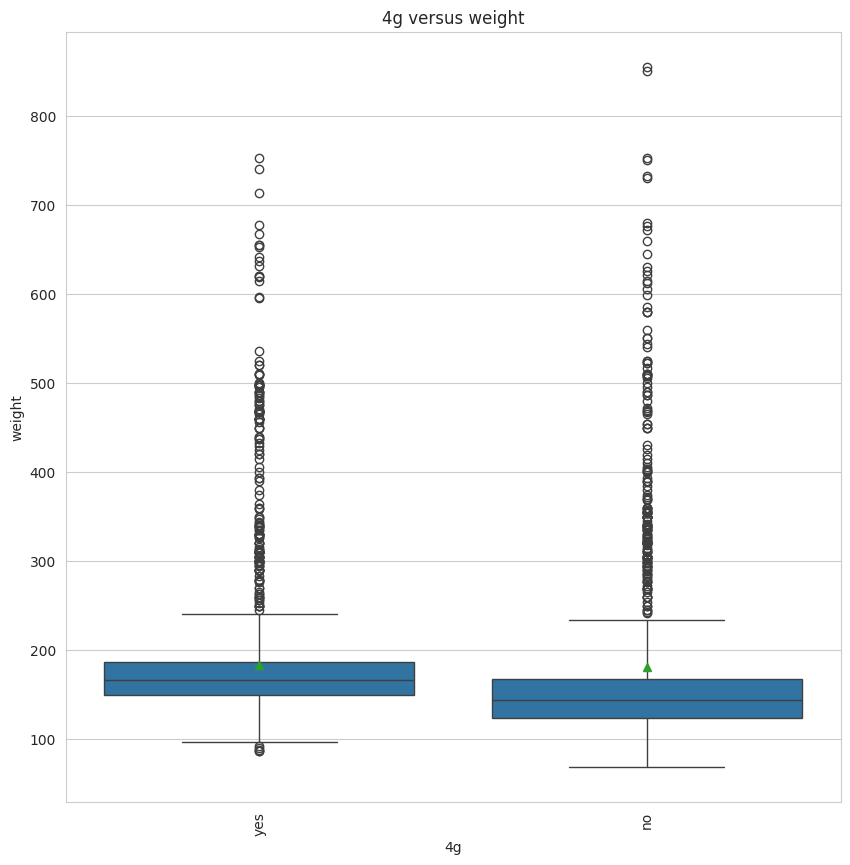

In [ ]:
#create boxplot for whether or not device has 4g versus weight
make_bp('4g','weight')

In [ ]:
#Devices with 4g tend to be slightly heavier
#However, b oth have significant ouliers

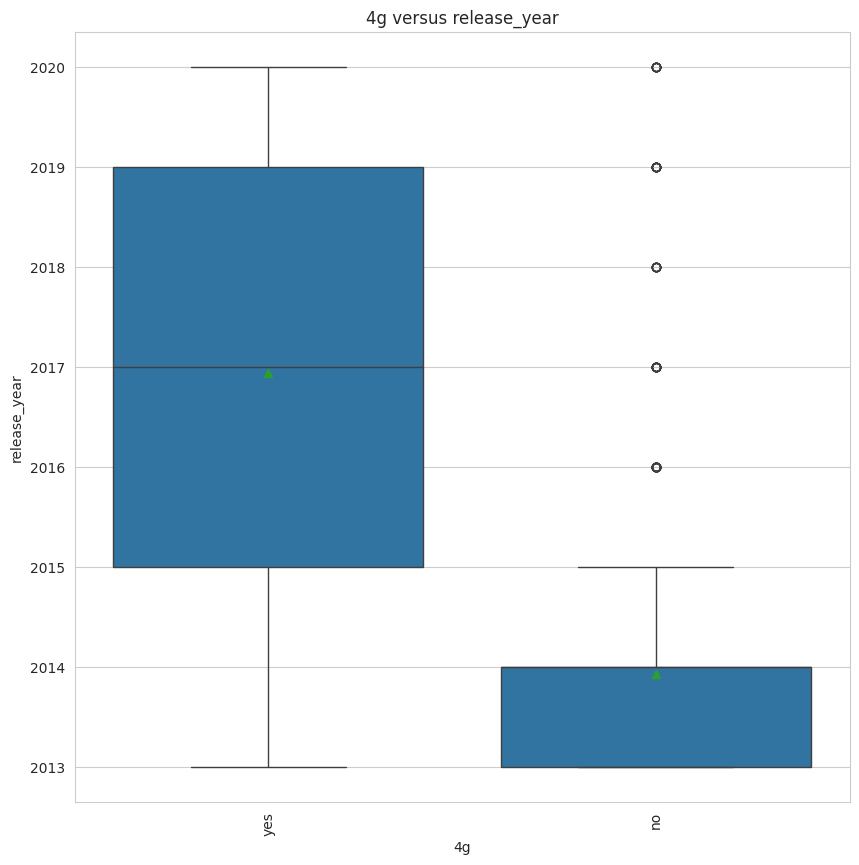

In [ ]:
#create boxplot for whether or not device has 4g versus release year
make_bp('4g','release_year')

In [ ]:
#There are a couple devices released later on without 4g, but overall, later devices had 4g, and earlier devices tended to not have 4g

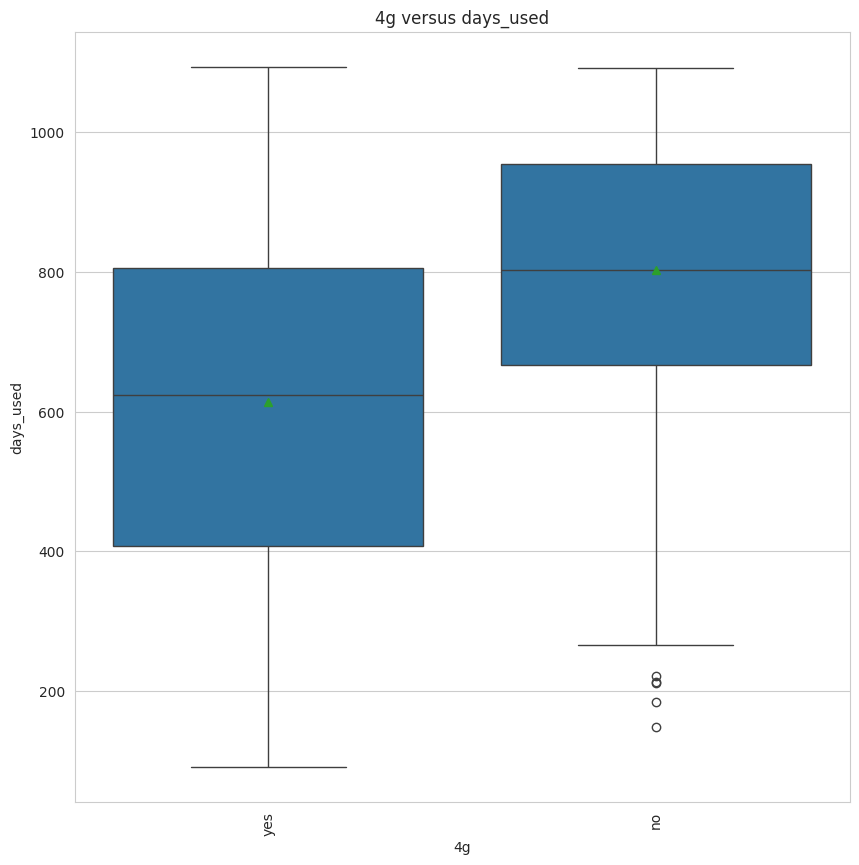

In [ ]:
#create boxplot for whether or not device has 4g versus days used
make_bp('4g','days_used')

In [ ]:
#Devices with 4g tended to have been used for more days
#Probably an indicator of multicollinearity between days used and the year the device was created

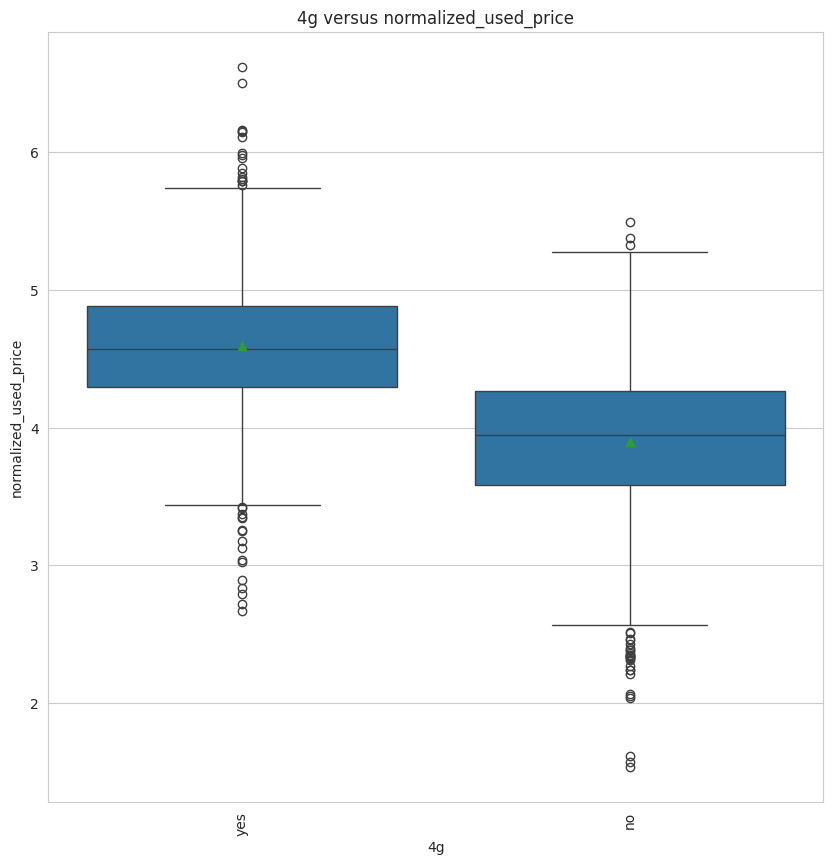

In [ ]:
#create boxplot for whether or not device has 4g versus normalized used price
make_bp('4g','normalized_used_price')

In [ ]:
#The resale price of devices with 4g tends to be higher

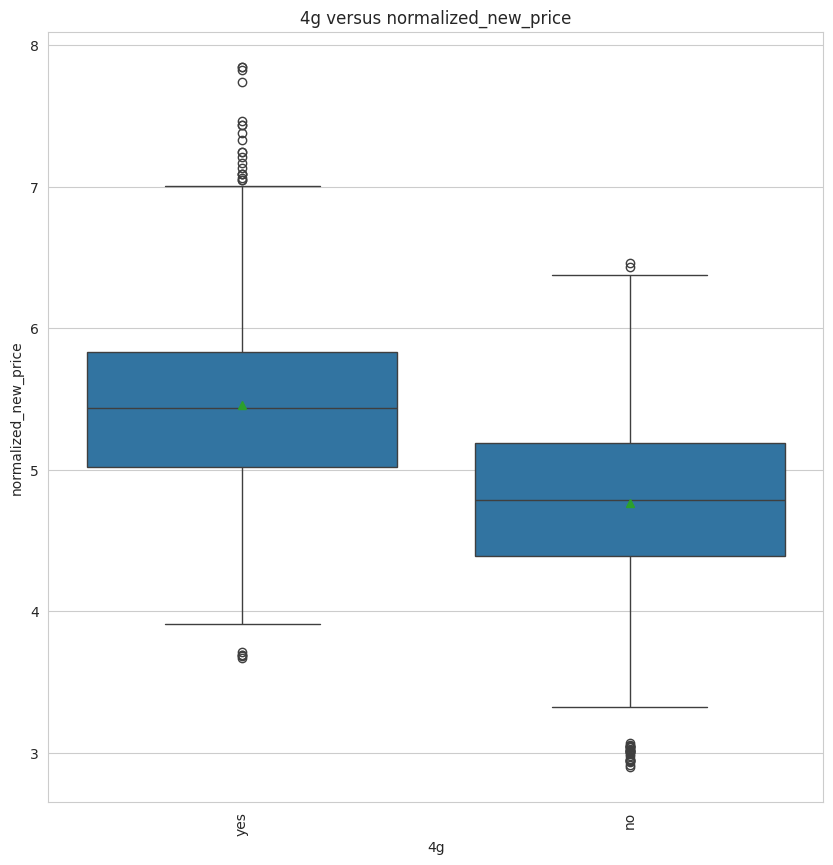

In [ ]:
#create boxplot for whether or not device has 4g versus normalized new price
make_bp('4g','normalized_new_price')

In [ ]:
#The new price of devices with 4g tends to be higher - consistent with previous graph

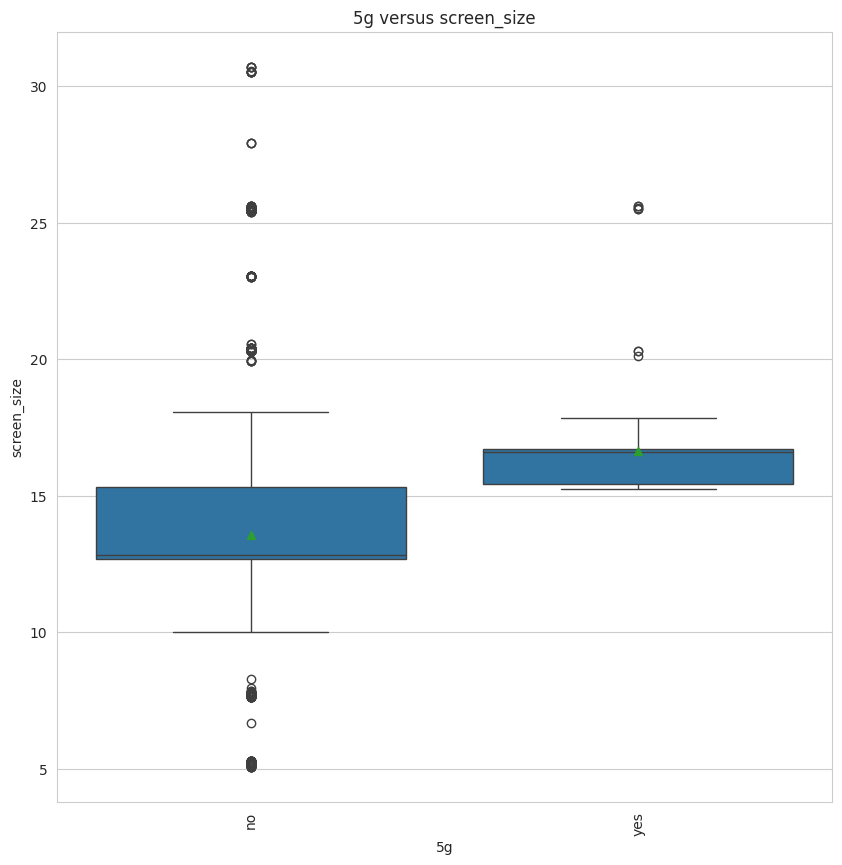

In [ ]:
#create boxplot for whether or not device has 5g versus screen size
make_bp('5g','screen_size')

In [ ]:
#Devices with 5g tend to have bigger screens, however many outliers with devices without 5g

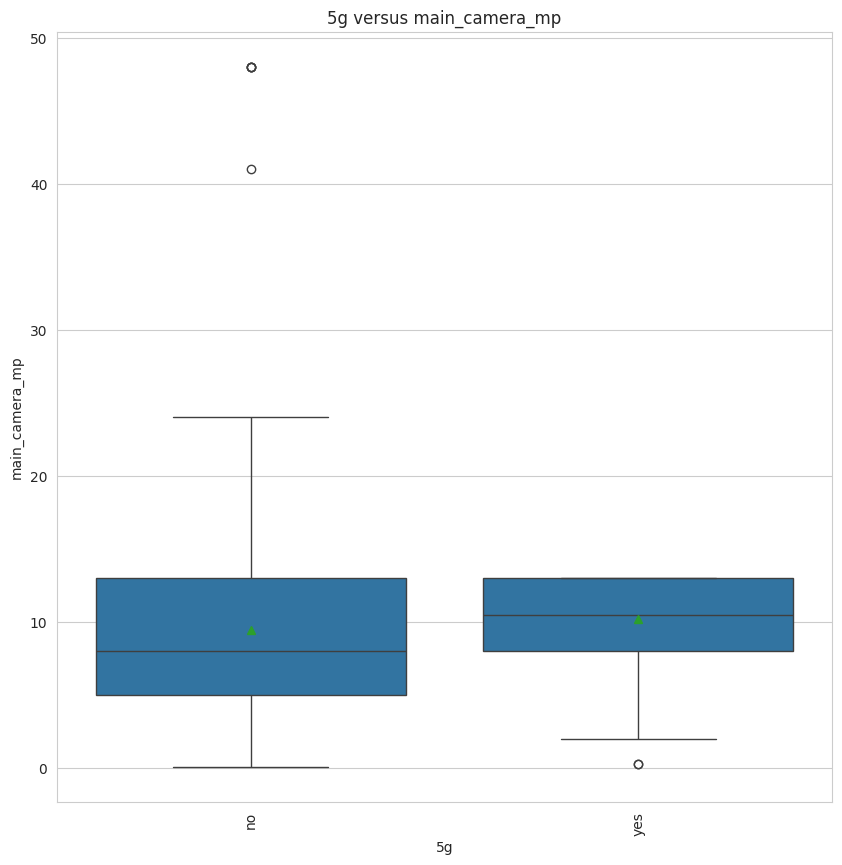

In [ ]:
#create boxplot for whether or not device has 5g versus main camera resolution
make_bp('5g','main_camera_mp')

In [ ]:
#Devices with 5g have a higher median main camera resolution
#However, devices without 5g have a greater range and many outliers on the higher end

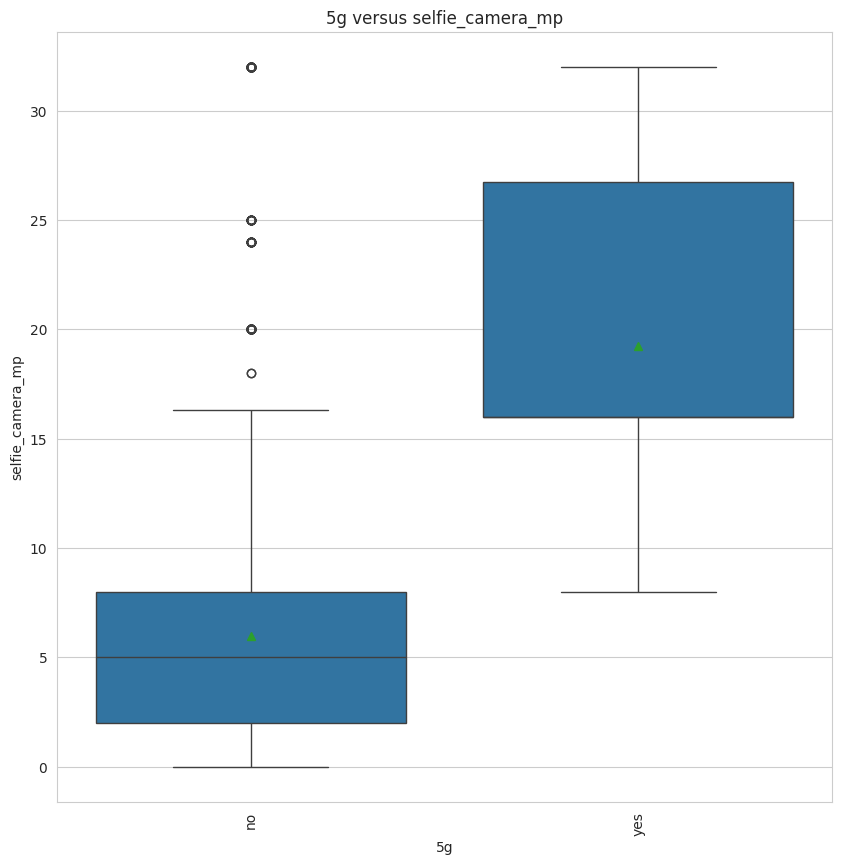

In [ ]:
#create boxplot for whether or not device has 5g versus selfie camera resolution
make_bp('5g','selfie_camera_mp')

In [ ]:
#Devices with 5g tend to have much higher main camera resolution; multicollinearity with year?

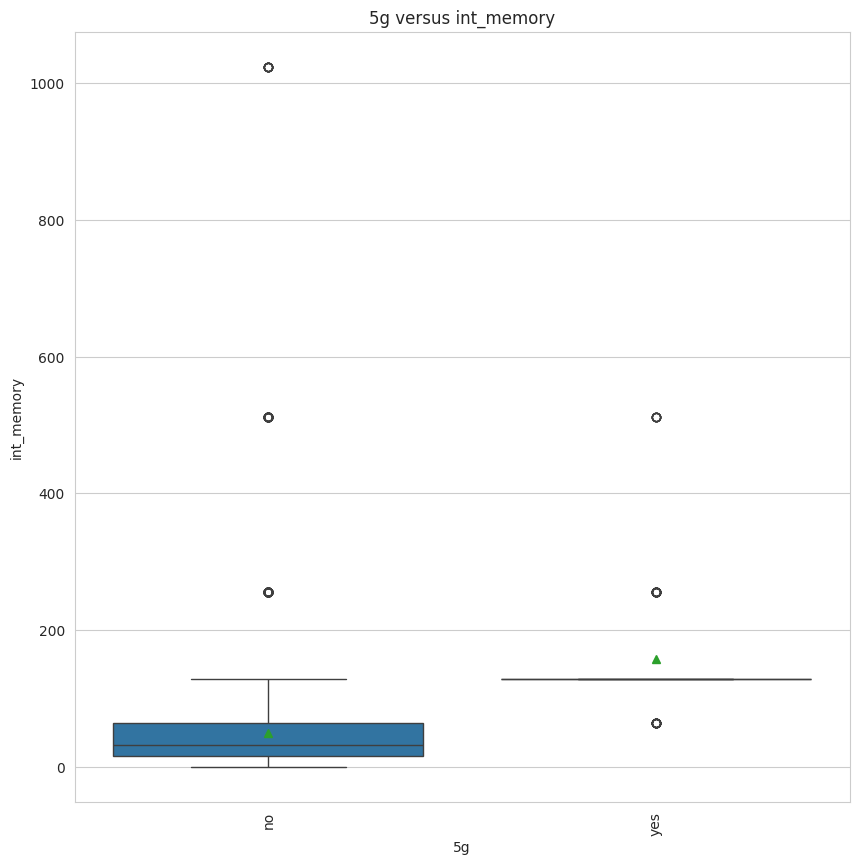

In [ ]:
#create boxplot for whether or not device has 5g versus memory
make_bp('5g','int_memory')

In [ ]:
#Devices with 5g tend to have a larger memory
#Howver, devices without 5g have many outliers, some even higher than devices with 5g

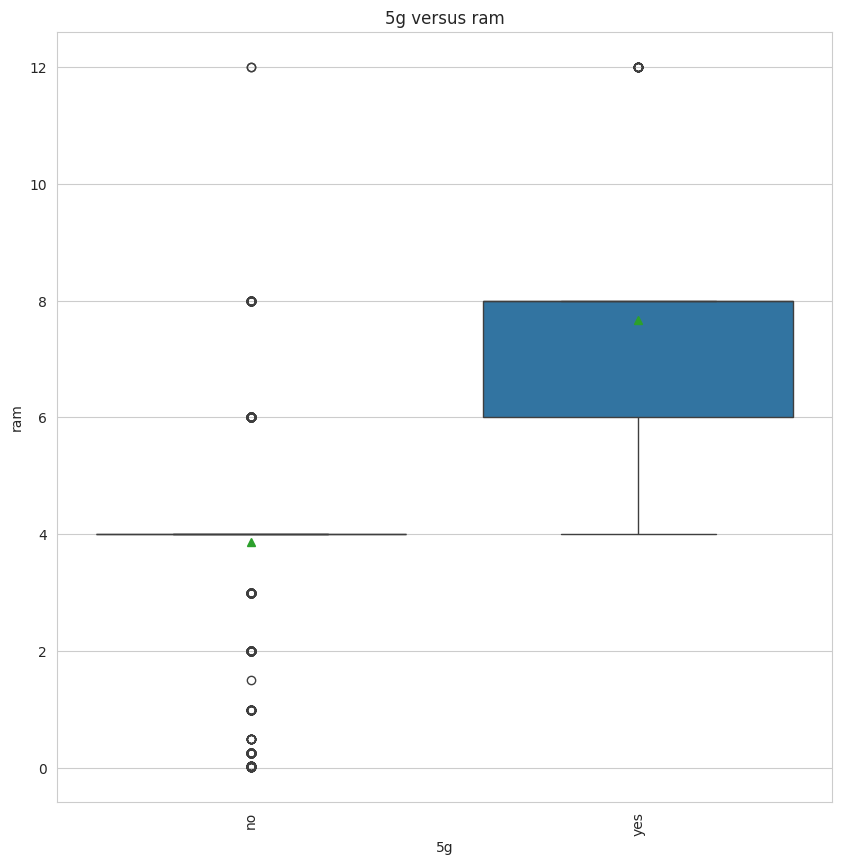

In [ ]:
#create boxplot for whether or not device has 5g versus ram
make_bp('5g','ram')

In [ ]:
#Devices with 5g tend to have higher ram
#However, many outliers in devices without 5g, some equal to outliers in devices with 5g

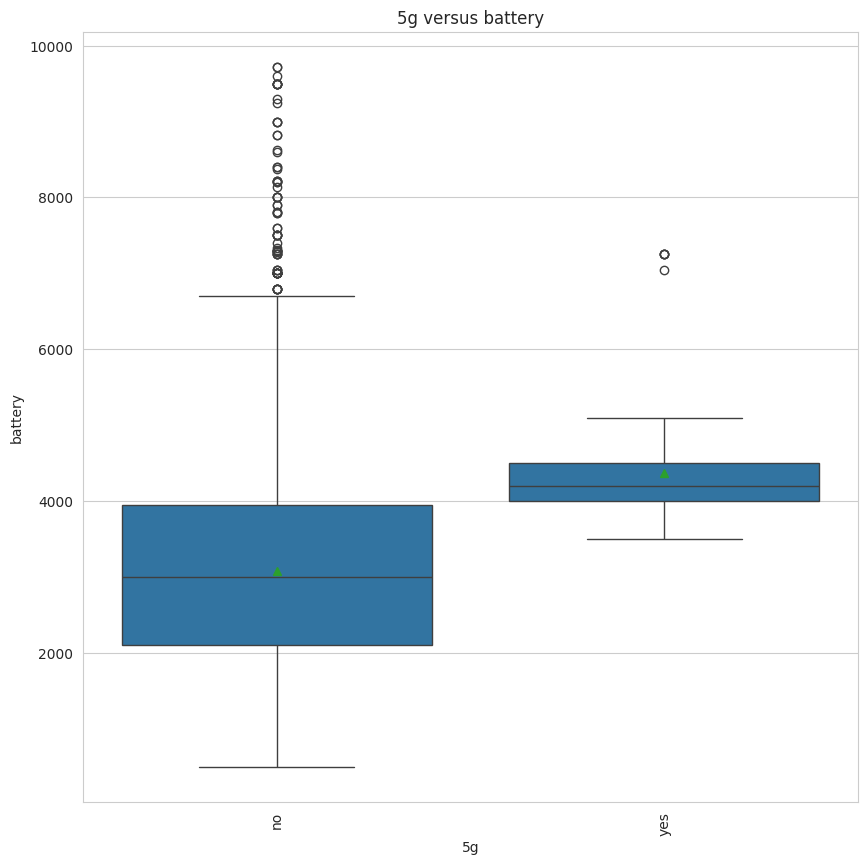

In [ ]:
#create boxplot for whether or not device has 5g versus battery
make_bp('5g','battery')

In [ ]:
#Devoces with 5g tend to have greater battery
#However, devices without 5g have a greater range and outliers with even greater battery than devices with 5g

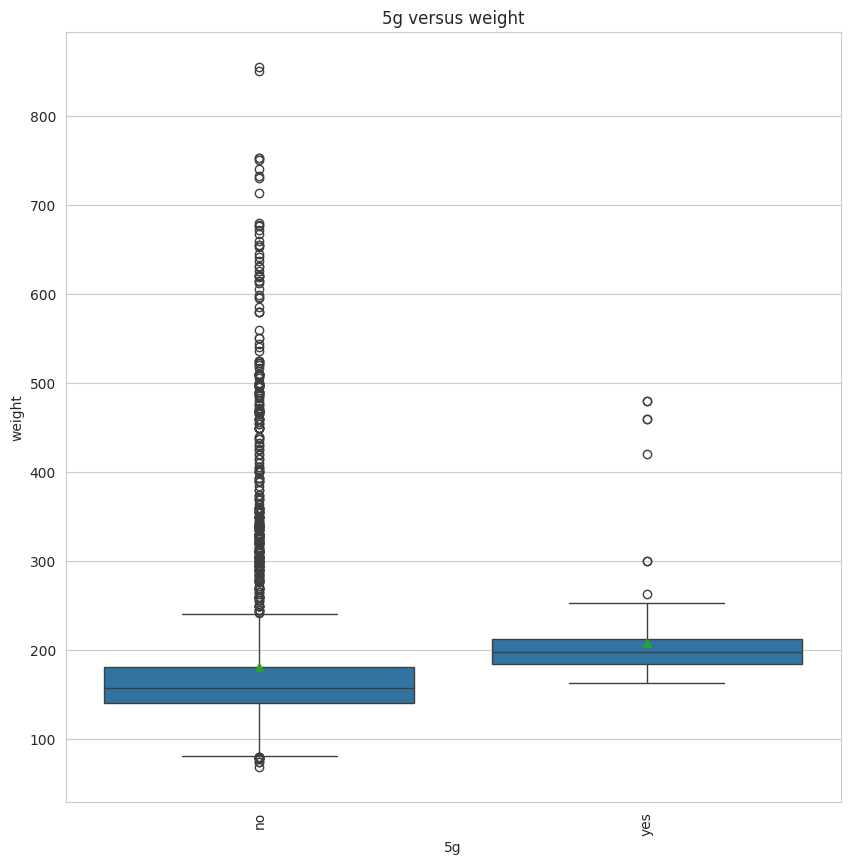

In [ ]:
#create boxplot for whether or not device has 5g versus weight
make_bp('5g','weight')

In [ ]:
#Devices with 5g tend to be heavier
#However, devices without 5g have a greater range and outliers with even heavier weight than devices with 5g

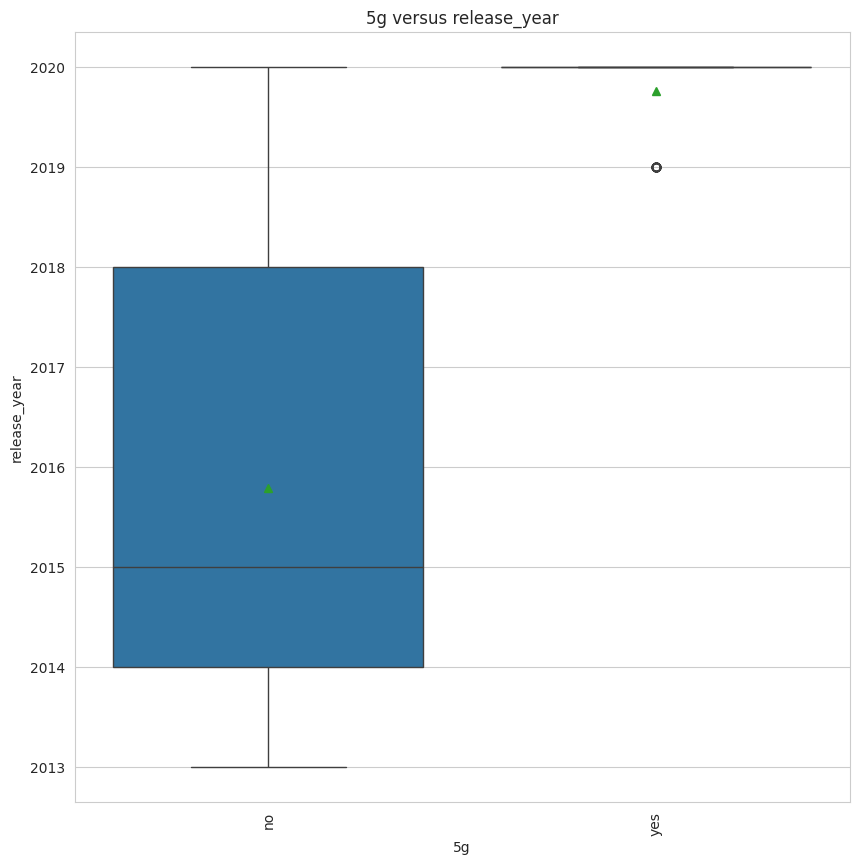

In [ ]:
#create boxplot for whether or not device has 5g versus release year
make_bp('5g','release_year')

In [ ]:
#Devices with 5g seemed to be first released (or at least devices from this dataset) in 2019, and started becoming more prominent around 2020
#Devices withought 5g have a very large range, as they have been around much longer

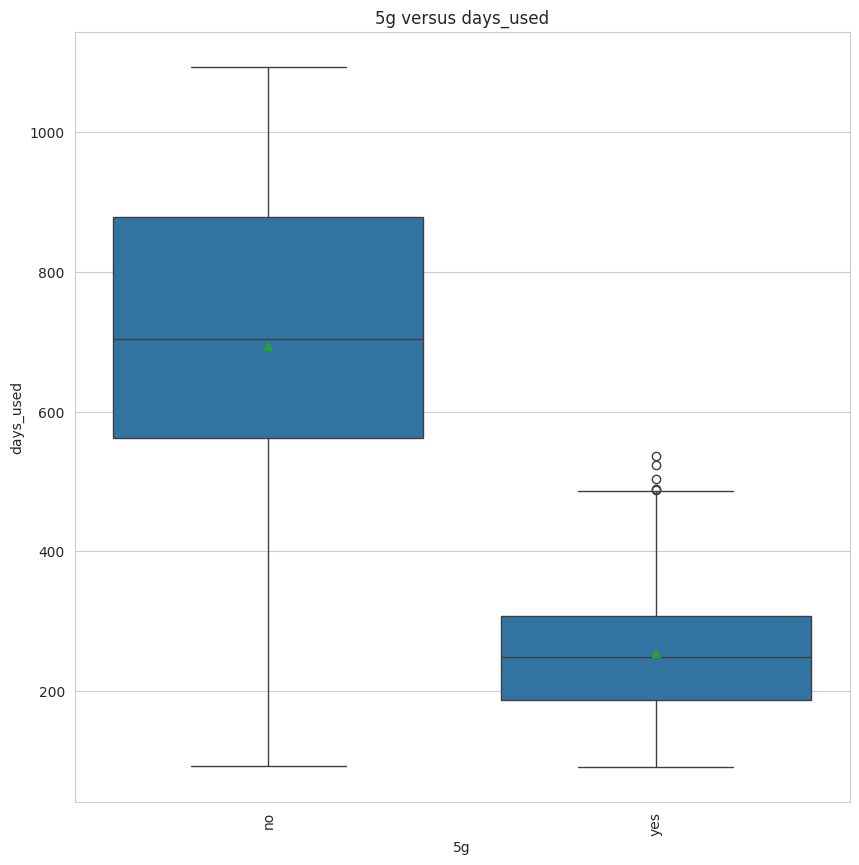

In [ ]:
#create boxplot for whether or not device has 5g versus days used
make_bp('5g','days_used')

In [ ]:
#Devices without 5g tend to be sold after more days of use than devices with 5g
#could be a multicollinearity issue - devices with 5g were made more recently, so they do not have the ability to be used for as long

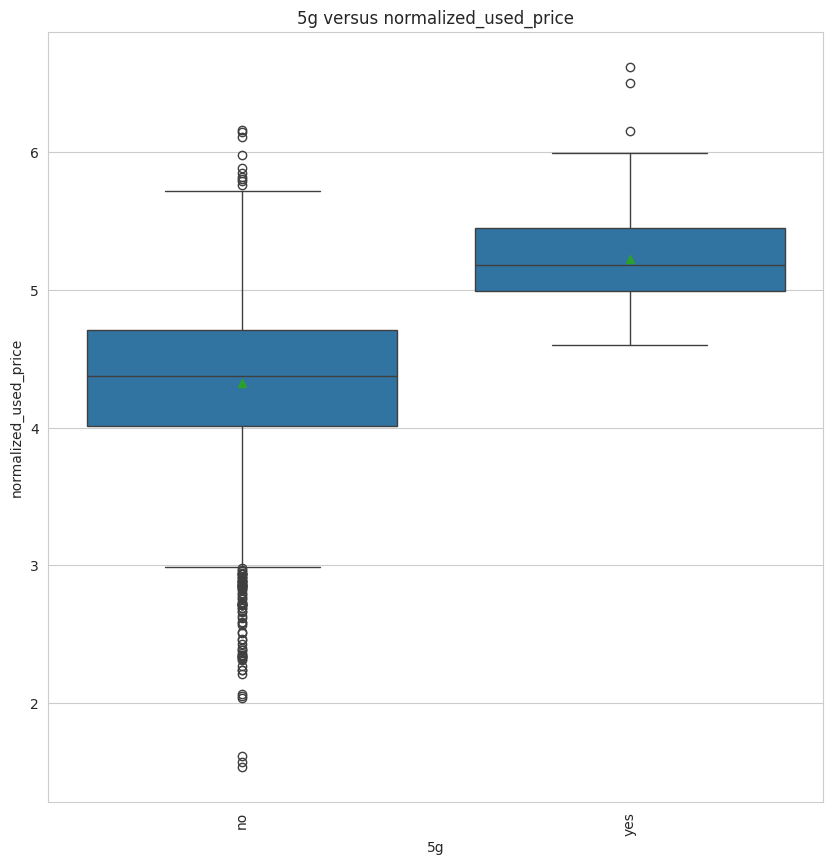

In [ ]:
#create boxplot for whether or not device has 5g versus normalized used price
make_bp('5g','normalized_used_price')

In [ ]:
#Devices with 5g sell for a greater price than devices without 5g
#However, devices without 5g have a large range and many outliers indicating there are some devices without 5g that still resell for a descent amount of money

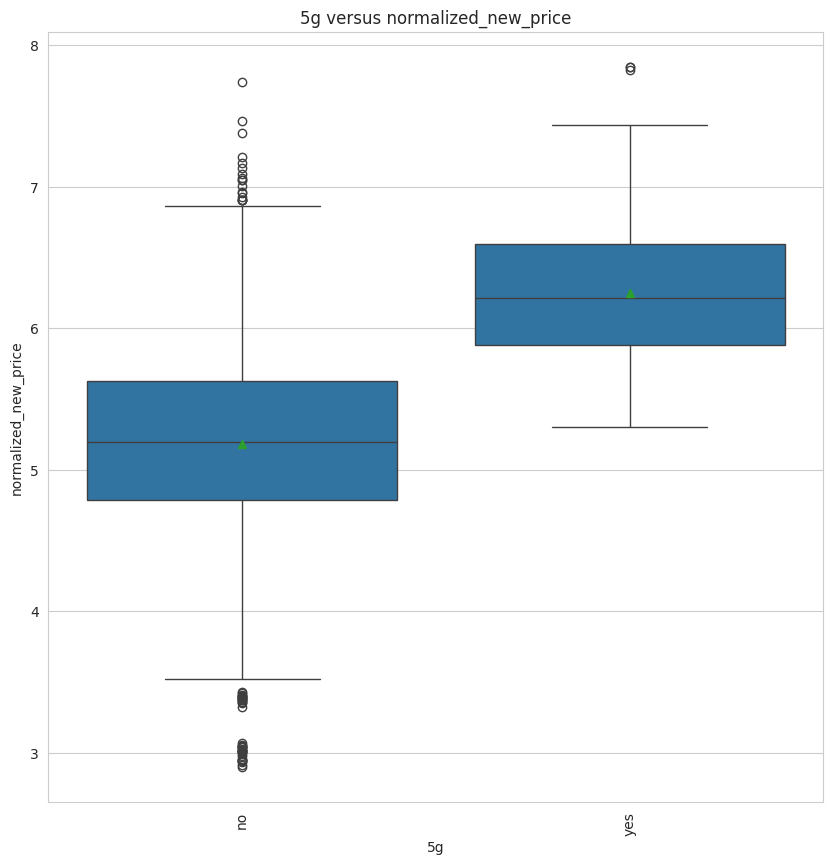

In [ ]:
#create boxplot for whether or not device has 5g versus normalized new price
make_bp('5g','normalized_new_price')

In [ ]:
#Devices with 5g tend to have an initial price that was higher than devices without 5g
#However, devices without 5g have a large range and many outliers, indicating some devices were initially sold for almost as high a price as some devices with 5g
#Similar to previous graph

In [ ]:
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
data.describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

In [ ]:
#Answering questions:

#Questions:
#What does the distribution of normalized used device prices look like?
#What percentage of the used device market is dominated by Android devices?
#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
#A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
#Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
#A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
#Which attributes are highly correlated with the normalized price of a used device?

<Axes: xlabel='normalized_used_price', ylabel='Count'>

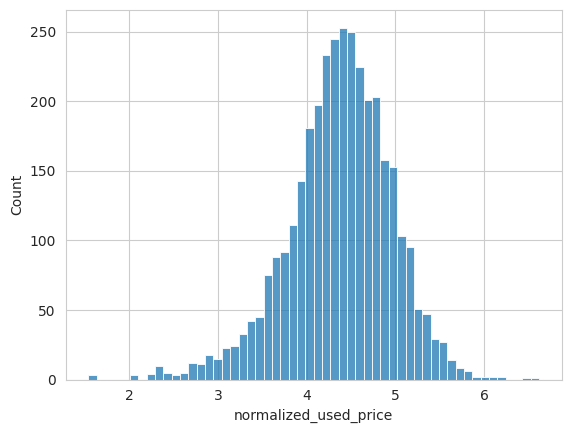

In [ ]:
#distribution of normalized used device prices
sns.histplot(data=data['normalized_used_price'])

In [ ]:
#looks mostly normal; maybe slightly left skewed

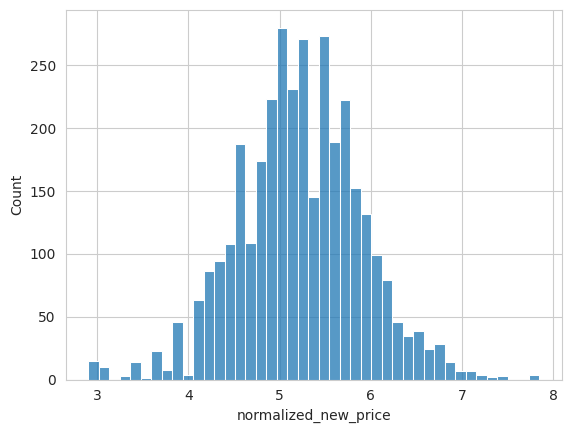

In [ ]:
sns.histplot(data=data['normalized_new_price']);

In [ ]:
#In contrast, the distribution of new device prices is less normal.
#I think this is because of all the variables involved in pricing a used device. Whether it is in perfect condition, but has old components, or it is a nicer device, but has damaged parts, these are all factors that could change the price it is being sold for, making the variable more continuous

In [ ]:
#percentage of the used device market operating on Android
((len(data[data['os']=='Android']))/data.shape[0])*100

93.05153445280834

In [ ]:
#about 93% of this data is from Android devices - could be limitation of this analysis if data was primarily collected on Android devices
#or could just mean that majority of resold devices happen to be Androids

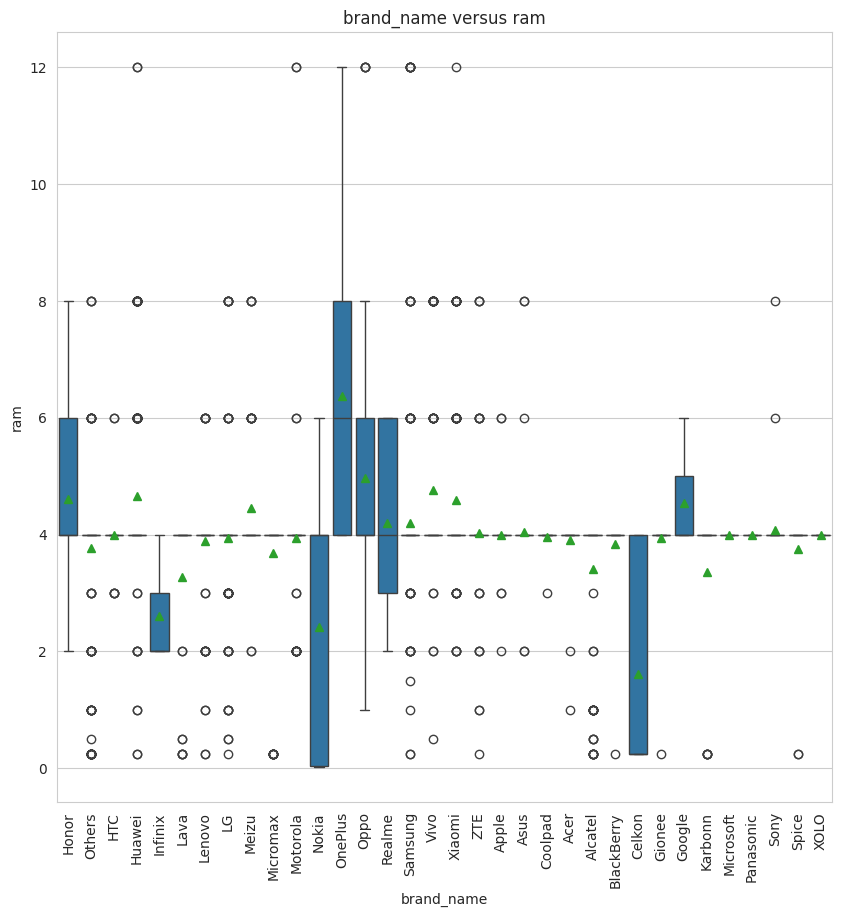

In [ ]:
#RAM variance by brand
make_bp('brand_name','ram')

In [ ]:
#Celkon, Nokia, and Infinix have significantly less RAM than other brands
#Oneplus has significantly greater RAM than other brands
#Oneplus has an outstanding ram size, although other brands have a few outliers that match up

In [ ]:
print(f"The mean price for a used OnePlus device is: {data[data['brand_name']=='OnePlus']['normalized_used_price'].mean()}")
print(f"The mean price for a new OnePlus device is: {data[data['brand_name']=='OnePlus']['normalized_new_price'].mean()}")

print(f"The mean price for any used device is: {data['normalized_used_price'].mean()}")
print(f"The mean price for any new OnePlus device is: {data['normalized_used_price'].mean()}")

The mean price for a used OnePlus device is: 5.15216511727933
The mean price for a new OnePlus device is: 6.266779678770911
The mean price for any used device is: 4.364712079133227
The mean price for any new OnePlus device is: 4.364712079133227


In [ ]:
#The average price for both a new and used OnePlus device is well above average

In [ ]:
#to see the exact median for each brand
data.groupby('brand_name')['ram'].median()

brand_name
Acer          4.00
Alcatel       4.00
Apple         4.00
Asus          4.00
BlackBerry    4.00
Celkon        0.25
Coolpad       4.00
Gionee        4.00
Google        4.00
HTC           4.00
Honor         4.00
Huawei        4.00
Infinix       2.00
Karbonn       4.00
LG            4.00
Lava          4.00
Lenovo        4.00
Meizu         4.00
Micromax      4.00
Microsoft     4.00
Motorola      4.00
Nokia         4.00
OnePlus       6.00
Oppo          4.00
Others        4.00
Panasonic     4.00
Realme        4.00
Samsung       4.00
Sony          4.00
Spice         4.00
Vivo          4.00
XOLO          4.00
Xiaomi        4.00
ZTE           4.00
Name: ram, dtype: float64

In [ ]:
#One plus as a far greater median ram size than the other brands

<Axes: xlabel='brand_name', ylabel='ram'>

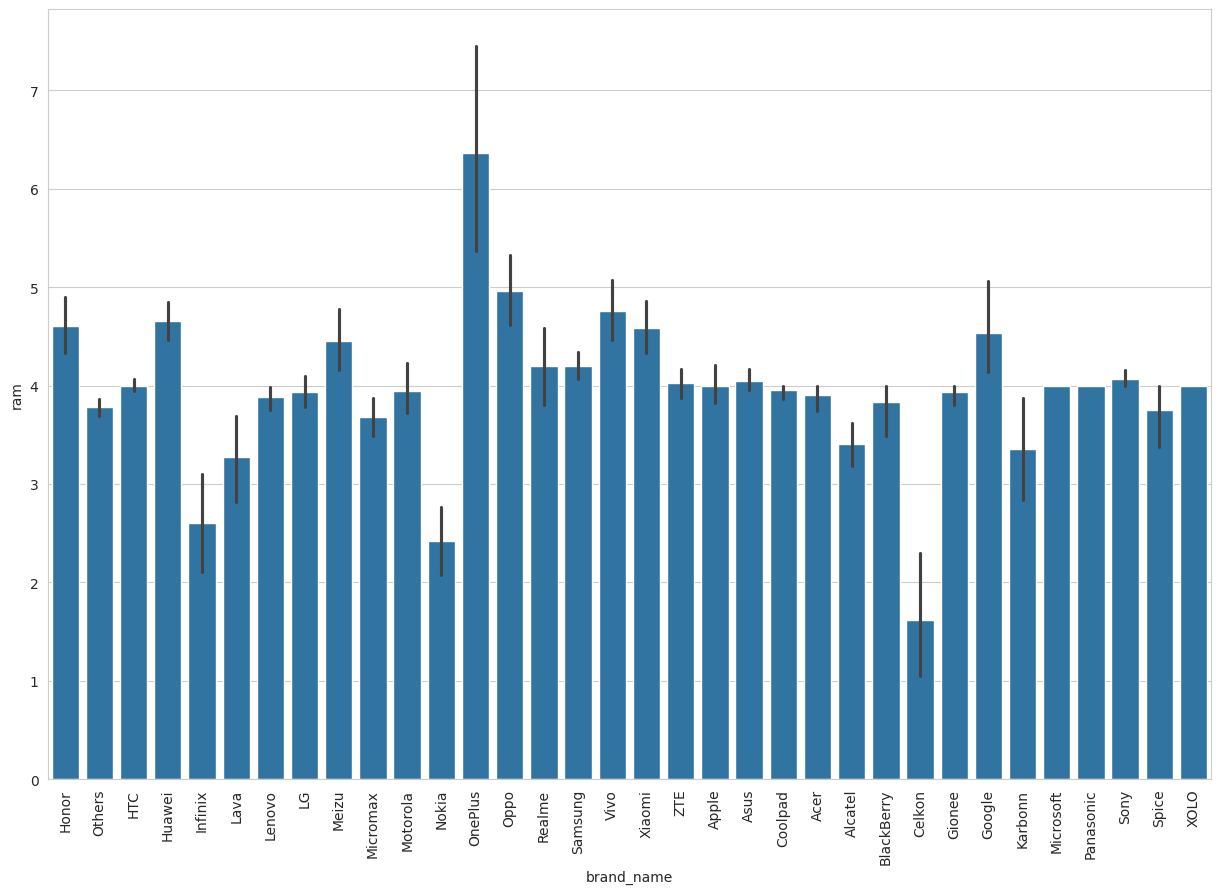

In [ ]:
#RAM variance by brand

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data, x='brand_name', y='ram')

In [ ]:
#Different graph to visualize the difference in ram size for OnePlus devices

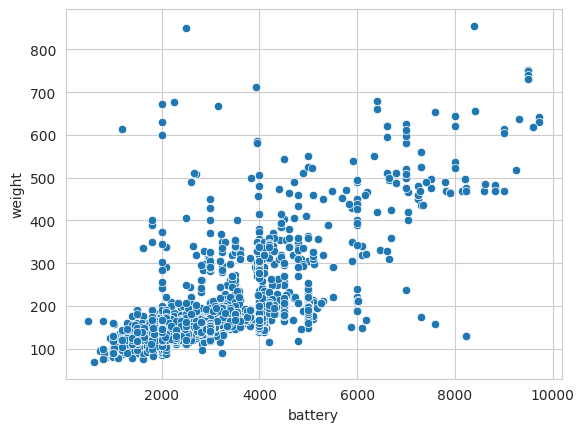

In [ ]:
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

#Create scatterplot to visualize relationship between weight and battery size
sns.scatterplot(data, x='battery', y='weight');

In [ ]:
#slight positive correlation

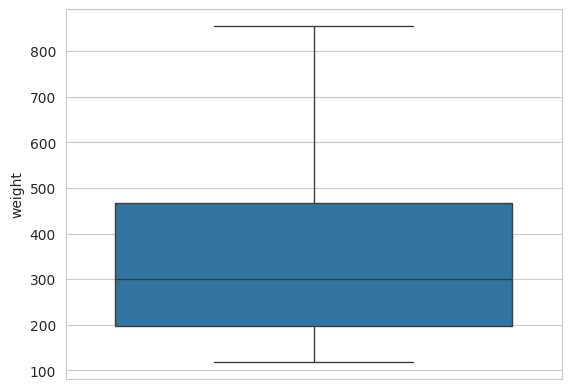

In [ ]:
#create dataframe with only large batteries (more than 4500 mAh)
large_batteries = data[data['battery']>4500]

#create boxplot of weight in this dataframe
sns.boxplot(data=large_batteries['weight']);

In [ ]:
#Check exact median of weight for devices with large batteries
large_batteries['weight'].describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

In [ ]:
#The median weight for devices with a large battery is 300g, with a minimum of 118g and a maximum of 855g

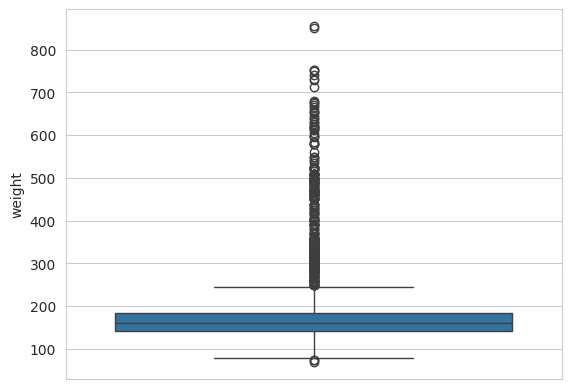

In [ ]:
#create boplot of weight using all battery sizes to compare
sns.boxplot(data=data['weight']);

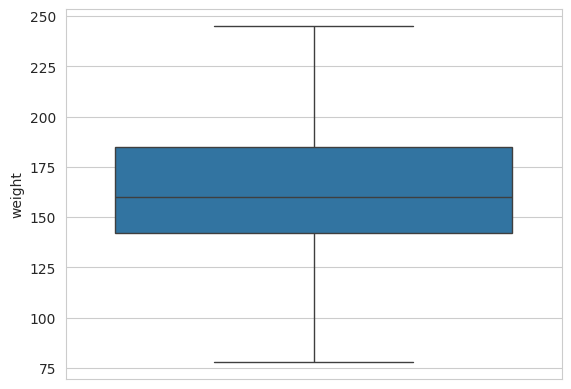

In [ ]:
#all the outliers make it hard to compare
#create new graph without outliers
sns.boxplot(data=data['weight'], showfliers=False);

In [ ]:
#check weight statistic for all devices
data['weight'].describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

In [ ]:
#the median weight for all devices is 160, with a minimum of 69 and a maximum of 855

In [ ]:
#The devices with a large battery are significantly heavier
#This could increase price or decrease price since it is a better component, but a heavier device is less desirable

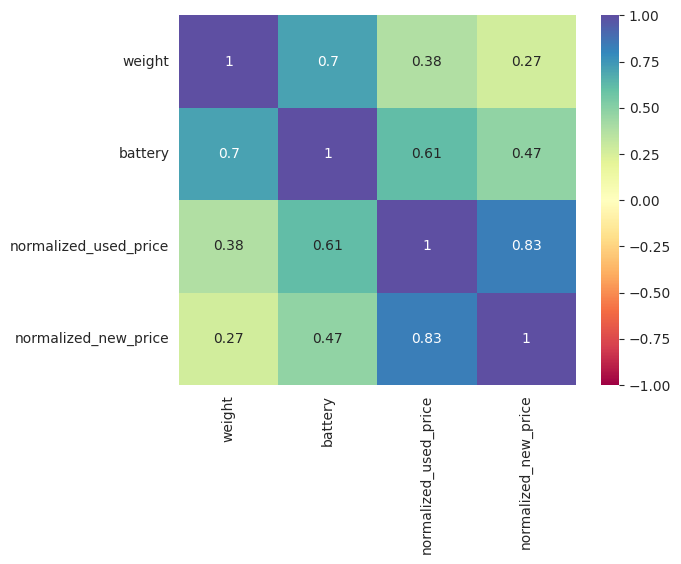

In [ ]:
price_weight_battery = ['weight', 'battery','normalized_used_price', 'normalized_new_price']
sns.heatmap(data[price_weight_battery].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1);

In [ ]:
#We see a significant correlation between battery size and weight
#However, we also see a correlation between both prices (especially used price) and battery, but a very weak correlation between weight and either price
#If higher weight was not an indicator of larger battery, it would probably be a negative correlation with price, but because of the relationship between weight and battery size, the correlation between weight and price is affected
#Might be multicollinearity problem

In [ ]:
#How many phones and tablets are available across different brands with a screen size larger than 6 inches

#first look at the amount and percentage of all devices fit this criteria
print(f"{data[data['screen_size']>6].shape[0]} devices are larger than 6 inches")
print(f"{((data[data['screen_size']>6].shape[0])/data.shape[0])*100}% of all devices are larger than 6 inches")

3362 devices are larger than 6 inches
97.33642154024321% of all devices are larger than 6 inches


In [ ]:
#check how many phones with screen>6 for each brand
large_phones = data[data['screen_size']>6]
large_phones.groupby('brand_name').size()

brand_name
Acer           51
Alcatel       115
Apple          39
Asus          122
BlackBerry     21
Celkon         25
Coolpad        22
Gionee         56
Google         15
HTC           110
Honor         116
Huawei        251
Infinix        10
Karbonn        29
LG            197
Lava           36
Lenovo        171
Meizu          62
Micromax      108
Microsoft      22
Motorola      106
Nokia          72
OnePlus        22
Oppo          129
Others        479
Panasonic      47
Realme         41
Samsung       334
Sony           86
Spice          30
Vivo          117
XOLO           49
Xiaomi        132
ZTE           140
dtype: int64

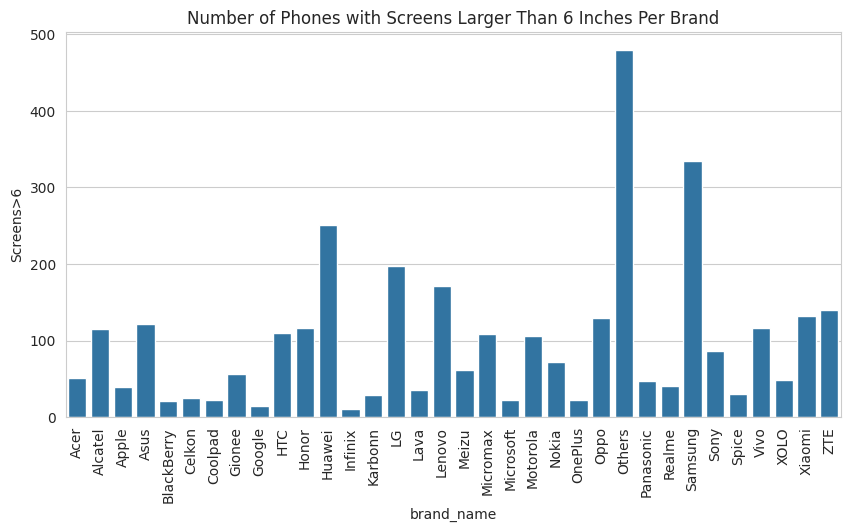

In [ ]:
#Visualize amount of devices available across different brands with a screen size larger than 6 inches

plt.figure(figsize=(10,5))
sns.barplot(large_phones.groupby('brand_name').size())
plt.xticks(rotation=90);
plt.ylabel('Screens>6')
plt.title('Number of Phones with Screens Larger Than 6 Inches Per Brand');

In [ ]:
#Samsung has a very large amount of devices with a screen over 6 inches

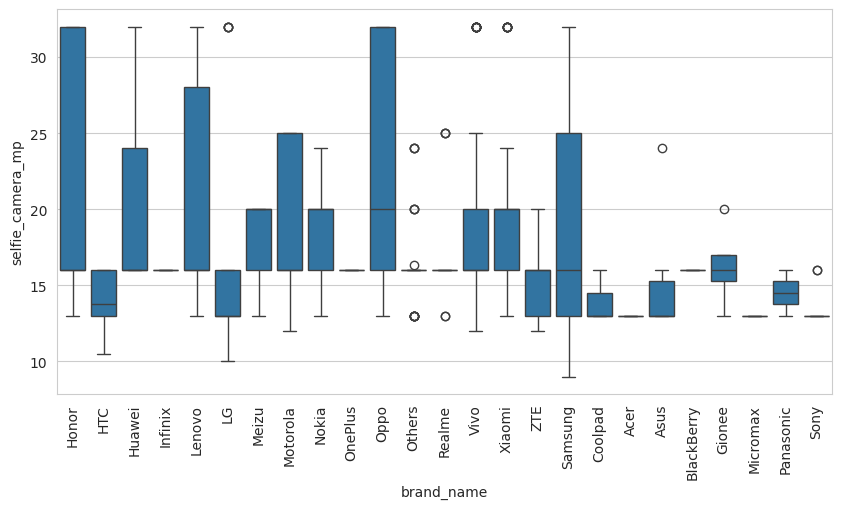

In [ ]:
#distribution of devices offering greater than 8MP selfie cameras across brands

#create dataframe with only devices with good selfie cameras
good_selfie = data[data['selfie_camera_mp']>8]

#create boxplot of the selfie camera mp for each brand for devices with a good selfie camera
plt.figure(figsize=(10,5))
sns.boxplot(data=good_selfie, x='brand_name', y='selfie_camera_mp');
plt.xticks(rotation=90)
plt.show()

In [ ]:
#out of all devices with a selfie camera greater than 8MP, Oppo, Samsung, Lenovo, and Honor had consistently good quality selfie cameras

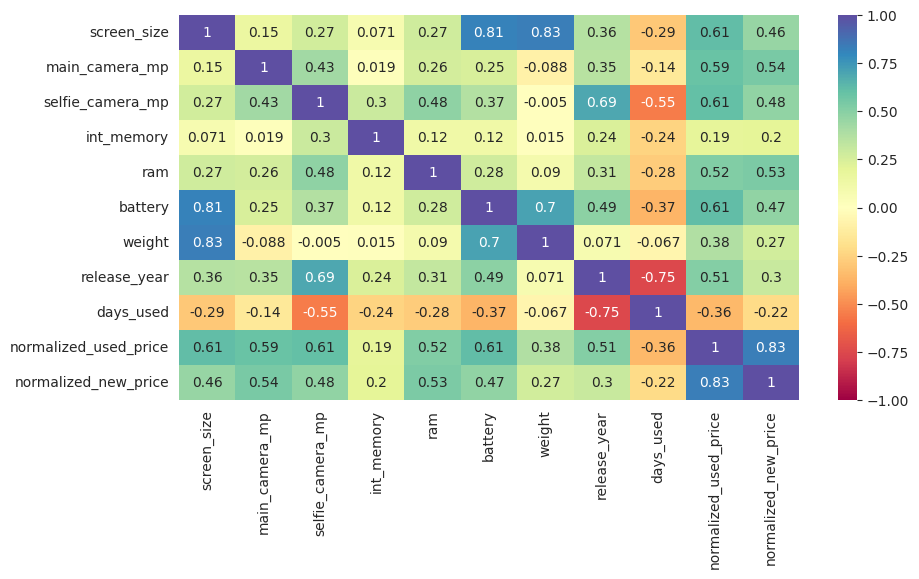

In [ ]:
#Which attributes are highly correlated with the normalized price of a used device?

#look at heatmap again to answer this question

plt.figure(figsize=(10,5))
sns.heatmap(data[num_vars].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

In [ ]:
#screen size, main camera mp, selfie camera mp, ram, battery, release year, and normalized new price are all at least mildly correlated.
#I believe there is multicollinearity present in this dataset that is affecting these relationships

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Check for missing values

data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#columns with missing values: main camera mp, selfie camera mp, int memory, ram, battery, and weight

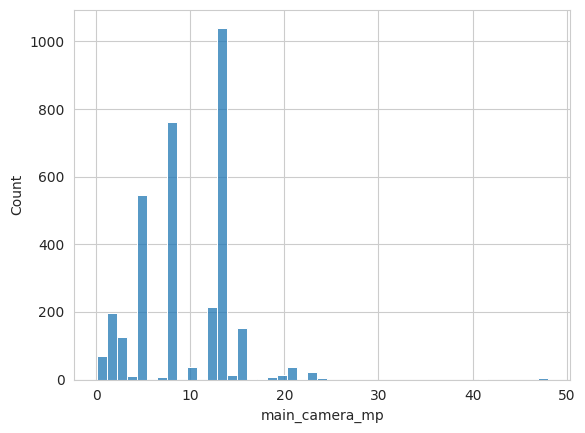

In [ ]:
#main camera mp has many missing variables, so I want to replace these value with different statistic from the column

#to see which statistic, I need to look at the distribution of this column again
sns.histplot(data['main_camera_mp']);

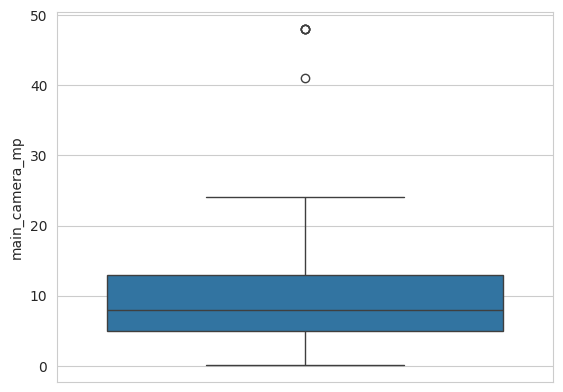

In [ ]:
#This is not a normal distribution

#Now I am going to make a boxplot for this column to see if it has any extreme outliers
sns.boxplot(data['main_camera_mp']);

In [ ]:
#since there are outliers present in this column (and the other columns, which I checked earlier), I am going to replace missing values with the median

In [ ]:
#Fill all nan values in main camera mp column with the median
data['main_camera_mp'].fillna(data['main_camera_mp'].median(), inplace=True)

In [ ]:
#Check for missing values again

data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
#Got rid of all missing values in that column. Now do this with other columns with missing values

#For selfie camera mp
data['selfie_camera_mp'].fillna(data['selfie_camera_mp'].median(), inplace=True)

#for int memory
data['int_memory'].fillna(data['int_memory'].median(), inplace=True)

#for ram
data['ram'].fillna(data['ram'].median(), inplace=True)

#for battery
data['battery'].fillna(data['battery'].median(), inplace=True)

#for weight
data['weight'].fillna(data['weight'].median(), inplace=True)

In [ ]:
#Check for missing values again

data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
#no more missing values!

In [ ]:
#Make sure no rows were lost
data.shape

(3454, 15)

In [ ]:
#We still have 3454

In [ ]:
#Check to see if we need to do feature Engineering

data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
#I could replace release year with the amount of years since the data was released to make it a more quantifiable number that can better be used in data analysis than year

#Make a new column and subract release year from 2021 (year data was released) to indicate number of years the device has been out
data['years_out'] = 2021 - data['release_year']

In [ ]:
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  years_out  
0        127               4.307572              4.715100          1  
1        325               5.162097              5.519018          1  
2        162               5.111084              5.884631          1  
3        345               5.135387              5.630961          1  
4        293               4.389995              4.947837          1

In [ ]:
#Now we can drop the date column
data.drop('release_year', axis=1, inplace=True)

In [ ]:
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  years_out  
0               4.307572              4.715100          1  
1               5.162097              5.519018          1  
2               5.111084              5.884631          1  
3               5.135387              5.630961          1  
4               4.389995              4.947837          1

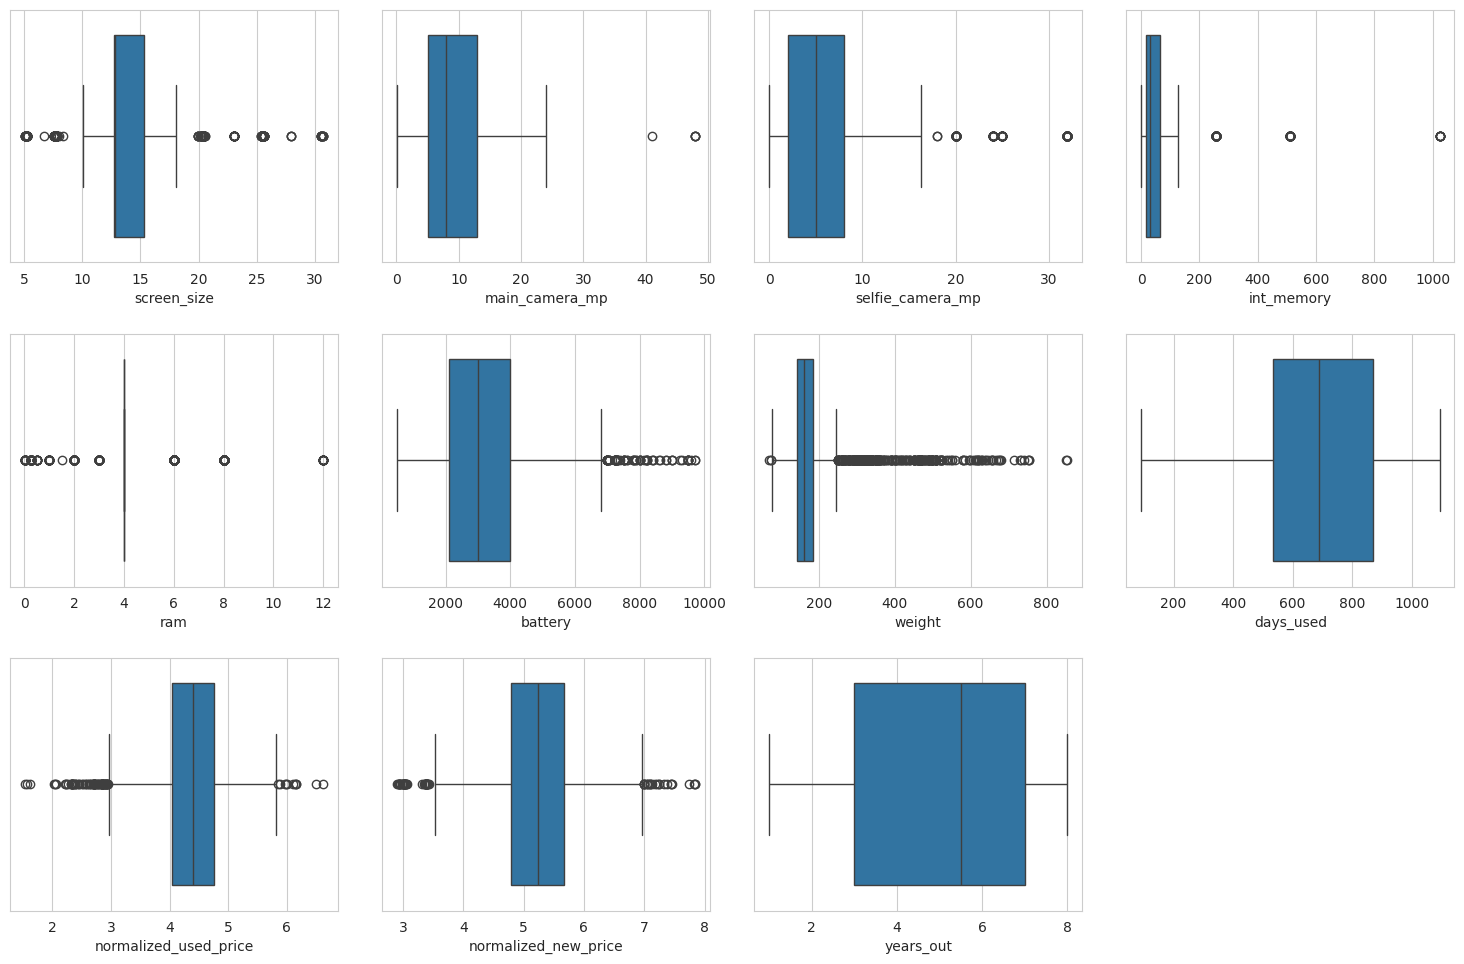

In [ ]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
#there are many outliers in the data, but I am going to keep them because they are real datapoints, and in this context, I think it makes sense

In [ ]:
#Preparing data for modeling

# defining X and y variables
X = data.drop(["normalized_used_price"], axis=1)
y = data["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_out  
0              4.715100          1  
1              5.519018          1  
2              5.884631          1  
3              5.630961          1  
4              4.9478

In [ ]:
#add the intercept to data
X = sm.add_constant(X)

In [ ]:
#creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...             False   
1   4300.0   213.0        325              5.519018  ...             False   
2   4200.0   213.0        162              5.884631  ...             False   
3   7250.0   480.0        345              5.630961  ...             False   
4   5000.0   185.0        293              4.947837  ...             False   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0            False            False              False           False   
1            False            False              False           False   
2            False            False              False           False   
3            False            False              False           False   
4            False            False              False           False   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0      False       False   False    True   False  
1      False       False   False    True    True  
2      False       False   False    True    True  
3      False       False   False    True    True  
4      False       False   False    True   False  

[5 rows x 49 columns]

In [ ]:
#converting everything to float type for modeling
X = X.astype(float)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0      127.0              4.715100  ...               0.0   
1   4300.0   213.0      325.0              5.519018  ...               0.0   
2   4200.0   213.0      162.0              5.884631  ...               0.0   
3   7250.0   480.0      345.0              5.630961  ...               0.0   
4   5000.0   185.0      293.0              4.947837  ...               0.0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0              0.0              0.0                0.0             0.0   
1              0.0              0.0                0.0             0.0   
2              0.0              0.0                0.0             0.0   
3              0.0              0.0                0.0             0.0   
4              0.0              0.0                0.0             0.0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0        0.0         0.0     0.0     1.0     0.0  
1        0.0         0.0     0.0     1.0     1.0  
2        0.0         0.0     0.0     1.0     1.0  
3        0.0         0.0     0.0     1.0     1.0  
4        0.0         0.0     0.0     1.0     0.0  

[5 rows x 49 columns]

In [ ]:
#splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
data.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'days_used', 'normalized_used_price', 'normalized_new_price',
       'years_out'],
      dtype='object')

In [ ]:
#compare boxplots to original data statistics:
original_data

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

In [ ]:
#current data statistics
data.describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3454.000000       3454.000000  3454.000000   
mean     13.713115        9.384534          6.553329    54.546957   
std       3.805280        4.700148          6.968453    84.926611   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight    days_used  \
count  3454.000000  3454.000000  3454.000000  3454.000000   
mean      4.036080  3133.170961   182.705761   674.869716   
std       1.364314  1298.565062    88.329494   248.580166   
min       0.020000   500.000000    69.000000    91.000000   
25%       4.000000  2100.000000   142.000000   533.500000   
50%       4.000000  3000.000000   160.000000   690.500000   
75%       4.000000  4000.000000   185.000000   868.750000   
max      12.000000  9720.000000   855.000000  1094.000000   

       normalized_used_price  normalized_new_price    years_out  
count            3454.000000           3454.000000  3454.000000  
mean                4.364712              5.233107     5.034742  
std                 0.588914              0.683637     2.298455  
min                 1.536867              2.901422     1.000000  
25%                 4.033931              4.790342     3.000000  
50%                 4.405133              5.245892     5.500000  
75%                 4.755700              5.673718     7.000000  
max                 6.619433              7.847841     8.000000

In [ ]:
#All the median, 25th percentile, and 7th percentile stayed the same
#The means did not change too drastically which is very good because this could have skewed the data
#particularly, main camera mp kept a very similar mean which is very good because we imputed the median on a lot of rows for that column

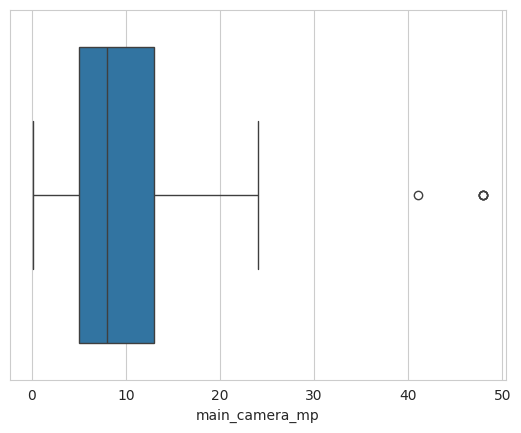

In [ ]:
#I am going to check the columns that were changed due to missing values (main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight)

#boxplot for main camera mp
sns.boxplot(data=data, x='main_camera_mp');

In [ ]:
#This boxplot is still pretty similar to what it originally was (it originally has a median of 8, 25th percentile was 5, 75th percentile was 13)
#This is very good since the majority of the replaced data was from this column

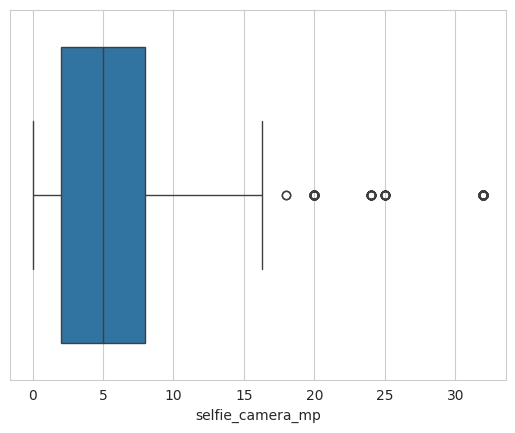

In [ ]:
#boxplot for selfie_camera_mp
sns.boxplot(data=data, x='selfie_camera_mp');

In [ ]:
#very similar to original graph

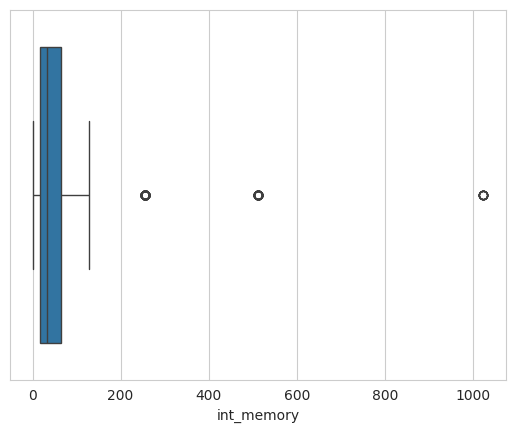

In [ ]:
#boxplot for int_memory
sns.boxplot(data=data, x='int_memory');

In [ ]:
#very similar to original graph

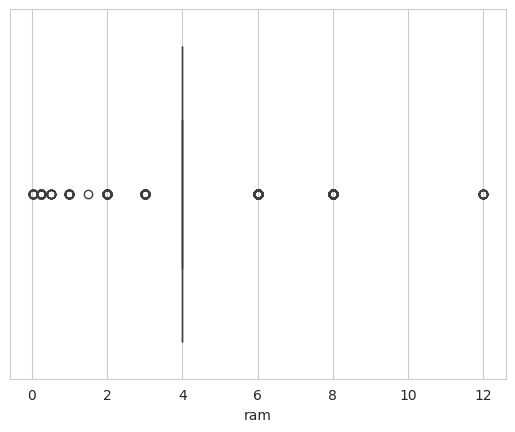

In [ ]:
#boxplot for ram
sns.boxplot(data=data, x='ram');

In [ ]:
#very similar to original graph

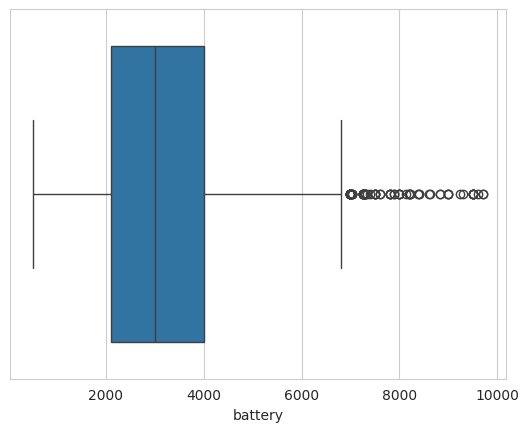

In [ ]:
#boxplot for battery
sns.boxplot(data=data, x='battery');

In [ ]:
#very similar to original graph

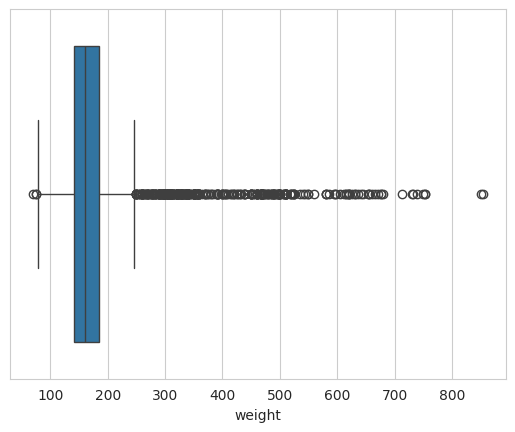

In [ ]:
#boxplot for weight
sns.boxplot(data=data, x='weight');

In [ ]:
#very similar to original graph

## Model Building - Linear Regression

In [ ]:
#look at original model performance
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:11   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#This r squared means that the variables included in our model can explain 84.5% of the variance in the training set. This is very good.
#looks like the new price has the largest affect in predicting the used price (this is expected)

## Model Performance Check

In [ ]:
#same functions as all the previous practice sets

#function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


#function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


#function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    #creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [ ]:
#checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229849  0.180336   0.844933        0.841723  4.326958

In [ ]:
# checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238306  0.184064   0.842547        0.834731  4.488006

In [ ]:
#the training r2 is 0.841723, compared to our original r2 of 0.845
#this is very good because it means our model is not underfitting
#also, the RMSE and MAPE are very similar for testing and training data, so no overfitting as well; both slightly bigger for testing data, but that is expected, and it's a very small difference
#MAE suggests that the model can predict used price within a mean error of 0.184064 on the test data
#MAPE of 4.488006 on the test data means that we are able to predict within 4.488% of the used prices. This is good

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
#We will be checking the following Linear Regression assumptions:
#No Multicollinearity
#Linearity of variables
#Independence of error terms
#Normality of error terms
#No Heteroscedasticity

In [ ]:
#Test for multicollinearity

#check VIF score

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    228.603553
screen_size                7.680705
main_camera_mp             2.136597
selfie_camera_mp           2.808416
int_memory                 1.361465
ram                        2.258272
battery                    4.073582
weight                     6.380746
days_used                  2.669393
normalized_new_price       3.121941
years_out                  4.884645
brand_name_Alcatel         3.405629
brand_name_Apple          13.056907
brand_name_Asus            3.330500
brand_name_BlackBerry      1.632240
brand_name_Celkon          1.773986
brand_name_Coolpad         1.466522
brand_name_Gionee          1.951248
brand_name_Google          1.322242
brand_name_HTC             3.409765
brand_name_Honor           3.345910
brand_name_Huawei          5.986382
brand_name_Infinix         1.283540
brand_name_Karbonn         1.573183
brand_name_LG              4.848734
brand_name_Lava            1.711294
brand_name_Lenovo          4.559101
brand_name_Mei

In [ ]:
#There are 2 columns with high multicollinearity
#I want to eventually drop all columns with VIF>5
#columns include screen size and weight (we can ignore high VIF for dummy variables)
#However, I need to drop these columns one by one and check the VIF in between drops because dropping just one column could change the VIF scores of the others
#remember 0.845 is our initial measure of success (r sq)

In [ ]:
#drop screen size first because it had the highest VIF

#find r sq for dataset without displacement
x_train2 = x_train.drop(["screen_size"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


In [ ]:
#after dropping screen size, r2 only decreased by 0.003
#this shows that the absence of this variable did not impact the regression much
#so data from this variable is sufficiently brought in from other variables

In [ ]:
#same thing for weight
x_train3 = x_train.drop(["weight"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.841 
Adjusted R-squared: 0.838


In [ ]:
#after dropping weight, r2 only decreased by 0.004
#this shows that the absence of this variable did not impact the regression much
#so data from this variable is sufficiently brought in from other variables

In [ ]:
#since screen size changed the least, this means it did not hold much value in our dataset, so we will drop this column first

#drop screen size in original data and redo regression
x_train = x_train.drop(["screen_size"], axis=1)

In [ ]:
olsmod_5 = sm.OLS(y_train, x_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.8
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:12   Log-Likelihood:                 98.446
No. Observations:                   2417   AIC:                            -100.9
Df Residuals:                       2369   BIC:                             177.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#we have to check for multicollinearity completely again to see if absence of this var changed which vars have multicollinearity issues

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    203.584858
main_camera_mp             2.133663
selfie_camera_mp           2.804937
int_memory                 1.359361
ram                        2.258270
battery                    3.835470
weight                     2.980013
days_used                  2.657368
normalized_new_price       3.079715
years_out                  4.717189
brand_name_Alcatel         3.405463
brand_name_Apple          12.999553
brand_name_Asus            3.325255
brand_name_BlackBerry      1.630913
brand_name_Celkon          1.773805
brand_name_Coolpad         1.466272
brand_name_Gionee          1.941442
brand_name_Google          1.319815
brand_name_HTC             3.399443
brand_name_Honor           3.345584
brand_name_Huawei          5.983530
brand_name_Infinix         1.283118
brand_name_Karbonn         1.572974
brand_name_LG              4.831458
brand_name_Lava            1.711031
brand_name_Lenovo          4.553997
brand_name_Meizu           2.169956
brand_name_Mic

In [ ]:
#we see that dropping screen size decreased VIF for weight, so we do not need to drop any more columns
#VIF for all the features is <5. No more multicollinearity

In [ ]:
#Now we can remove the non-significant predictor variables

In [ ]:
olsmod_9 = sm.OLS(y_train, x_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.8
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:13   Log-Likelihood:                 98.446
No. Observations:                   2417   AIC:                            -100.9
Df Residuals:                       2369   BIC:                             177.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#after dropping a variable, r sq is still very close to what it originally was
#However, we still see large (greater than 0.05) p-vals (not sufficient evidence acceleration should not belong in equation)
#columns include int memory, battery, and days used (dummy vars are not a concern)
#This high p-value means that these variables are not significant in predicting used price. Not sufficient evidence they should belong in dataset

In [ ]:
#since there are so many variables with large p-value, I used loop to get rid of all p-values>0.5, and check the regression btween drops

#initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_out', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [ ]:
x_train3 = x_train[selected_features]
x_test3 = x_test[selected_features]

In [ ]:
olsmod10 = sm.OLS(y_train, x_train3).fit()
print(olsmod10.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     837.2
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:14   Log-Likelihood:                 82.585
No. Observations:                   2417   AIC:                            -133.2
Df Residuals:                       2401   BIC:                            -40.53
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#after removing all those variables, the r2 is phenominally close to what it originally was - good

In [ ]:
#No more large p-values
#This means that main camera mp, selfie camera mp, ram, weight, normalized price, years out, some brand names, some os, and 4g can explain 0.839 percent of the variance in used price

In [ ]:
#Now we address other assumptions

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values of mpg
#y_train.values converts the pandas Series or DataFrame y_train to a NumPy array.
#.flatten() converts this array into a one-dimensional array.
df_pred["Fitted Values"] = olsmod10.fittedvalues.values  # predicted values of mpg based on vars in regression analysis
#olsres_10.fittedvalues contains the fitted (predicted) values from the regression analysis
#.values converts this to a NumPy array.
df_pred["Residuals"] = olsmod10.resid.values  # residuals (diff bw actual and predicted vals)


df_pred.head()

Actual Values  Fitted Values  Residuals
0       4.087488       3.886296   0.201192
1       4.448399       4.612963  -0.164564
2       4.315353       4.302529   0.012824
3       4.282068       4.265073   0.016995
4       4.456438       4.464609  -0.008171

In [ ]:
#Test for Linearity and Independence

In [ ]:
#LINEARITY
#linearity checks if data came from a linear model
#(if we fit our model to a linear model, what is left out should have no pattern)

#INDEPENDENCE
#residuals should be independent from eachother
#one residual should not predict next

In [ ]:
#plot residuals and visually inspect

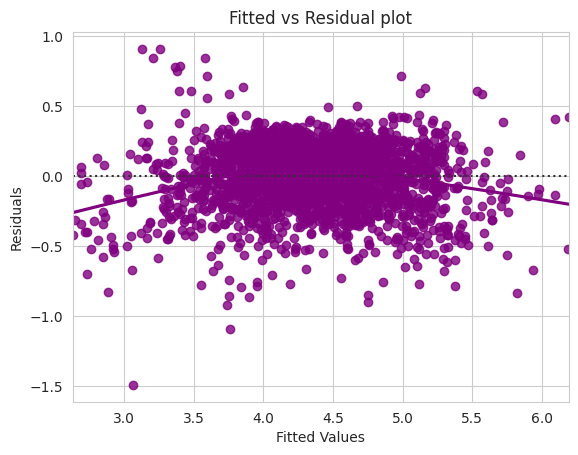

In [ ]:
#plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [ ]:
#mostly no pattern, which is good
#More concentrated near center of graph than sides (maybe slight non-linearity)

In [ ]:
#Let's see where the non-linearity is coming from

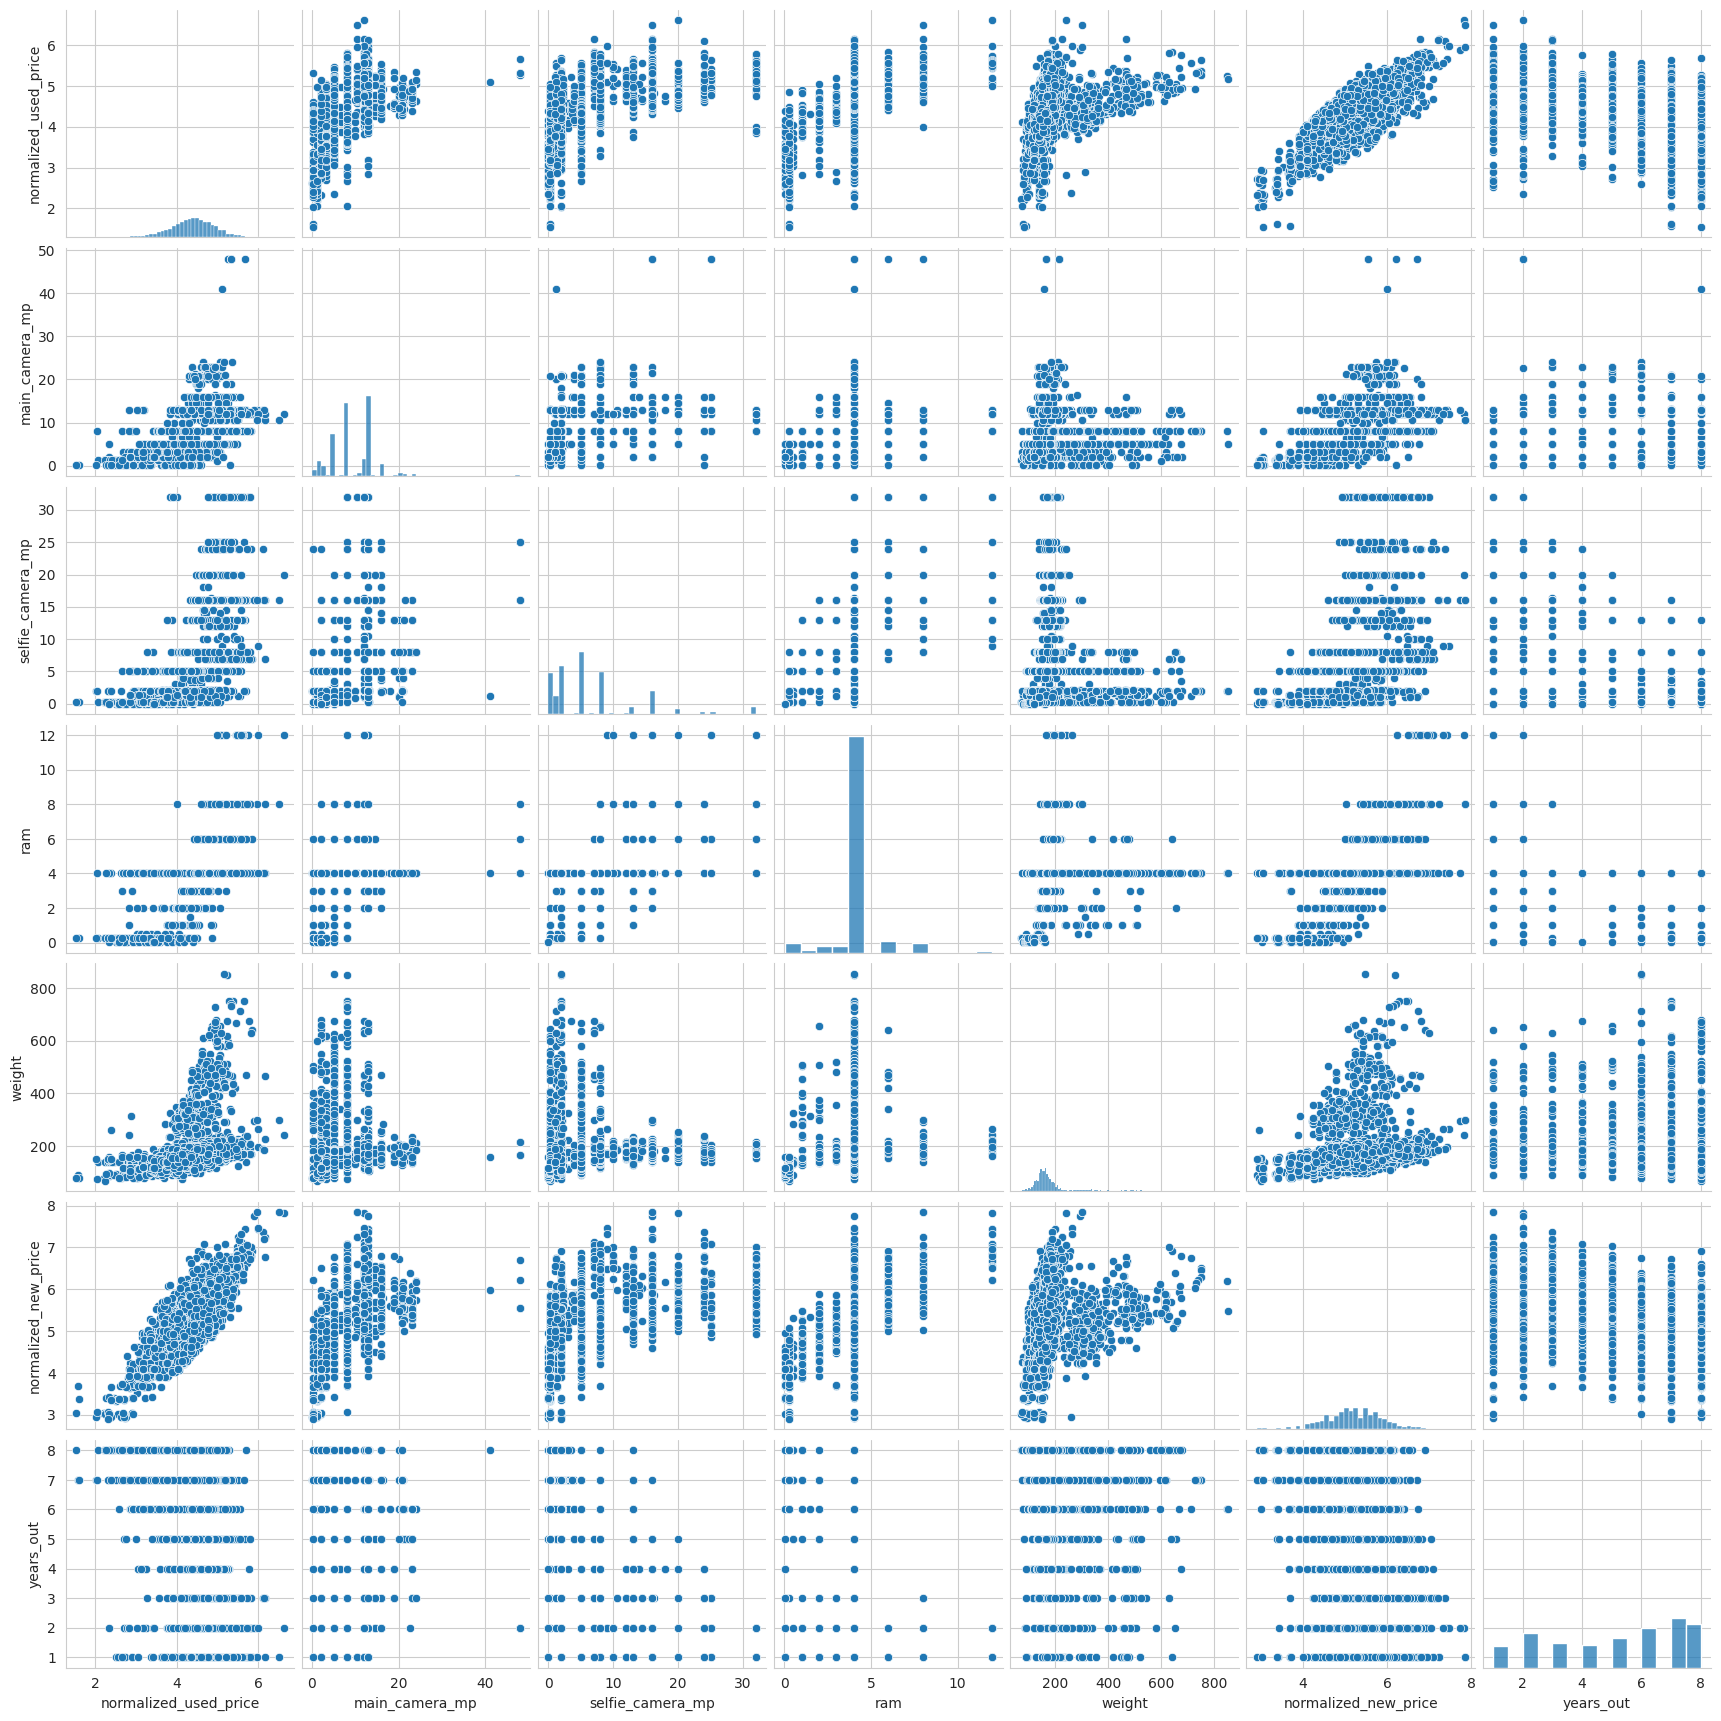

In [ ]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(data[['normalized_used_price', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'normalized_new_price', 'years_out','4g', '5g']])
plt.show()

In [ ]:
#normalized new price and normalized old price have a very clear relationship, which is probably causing majority of the non-linearity
#weight has a slight relationship with normalized new price and normalized used price

In [ ]:
#Let's see how dropping normalized new price would affect our regression

#dropping normalized new price
x_train4 = x_train3.drop(["normalized_new_price"], axis=1)
olsmod_20 = sm.OLS(y_train, x_train4)
olsres_20 = olsmod_20.fit()
print(olsres_20.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.738
Model:                               OLS   Adj. R-squared:                  0.737
Method:                    Least Squares   F-statistic:                     483.4
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:34   Log-Likelihood:                -509.34
No. Observations:                   2417   AIC:                             1049.
Df Residuals:                       2402   BIC:                             1136.
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

In [ ]:
#dropping normalized new price drops r2 drastically, so we need to keep this variable
#we can use normalized_new_price squared as a new variable, and use that instead to eliminate non-linearity
#we might see that these are too diff, but I will a do regression analysis and check p-vals to see

In [ ]:
# using square transformation
x_train3["normalized_new_price_sq"] = np.square(x_train3["normalized_new_price"])

# let's create a model with the transformed data
olsmod_16 = sm.OLS(y_train, x_train3)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     816.7
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:34   Log-Likelihood:                 123.40
No. Observations:                   2417   AIC:                            -212.8
Df Residuals:                       2400   BIC:                            -114.4
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

<ipython-input-5370-eb5fde0ad1a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train3["normalized_new_price_sq"] = np.square(x_train3["normalized_new_price"])


In [ ]:
#r2 increased - good
#p-vale for normalized_new_price_sq is low - good
#However, some p-values increased, so we should drop those columns now

In [ ]:
#using the same function as before to get rid of columns with high p-values, while checking regression analysis in between

#initial list of columns
predictors = x_train3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_out', 'brand_name_LG', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'normalized_new_price_sq']


In [ ]:
#add new column to test data
x_test["normalized_new_price_sq"] = np.square(x_test["normalized_new_price"])

In [ ]:
x_train30 = x_train3[selected_features]
x_test30 = x_test[selected_features]

In [ ]:
olsmod30 = sm.OLS(y_train, x_train30).fit()
print(olsmod30.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     1088.
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:34   Log-Likelihood:                 120.78
No. Observations:                   2417   AIC:                            -215.6
Df Residuals:                       2404   BIC:                            -140.3
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
#after getting rid of variables with high p-vale, r2 barely changed - good
#this means the remaining 12 variables explain 84.4% of the variance in used device prices

In [ ]:
#Now check linearity again

#redo residuals

#recreate the dataframe with actual, fitted and residual values
df_pred2 = pd.DataFrame()

df_pred2["Actual Values"] = y_train.values.flatten()  # actual values
df_pred2["Fitted Values"] = olsmod30.fittedvalues.values  # predicted values
df_pred2["Residuals"] = olsmod30.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0       4.087488       3.886296   0.201192
1       4.448399       4.612963  -0.164564
2       4.315353       4.302529   0.012824
3       4.282068       4.265073   0.016995
4       4.456438       4.464609  -0.008171

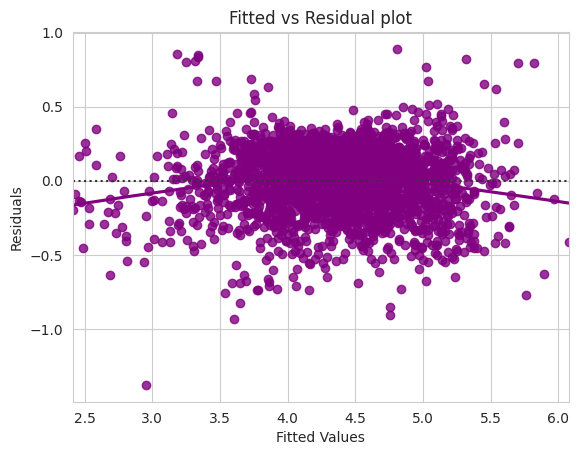

In [ ]:
#plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred2, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [ ]:
#might be slightly more random

In [ ]:
#test for normality

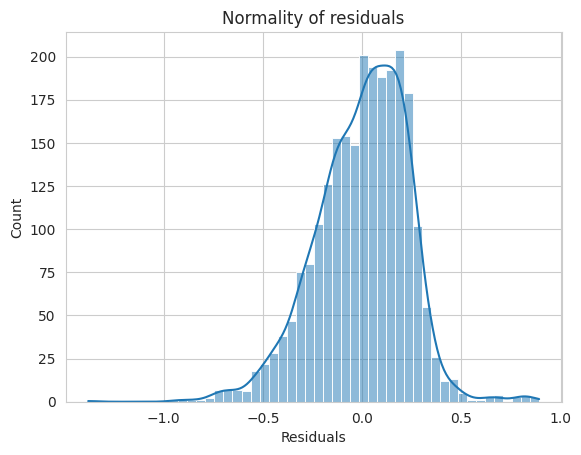

In [ ]:
#see if residuals are normally distributed

sns.histplot(df_pred2["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

In [ ]:
#pretty normal - slightly left skewed

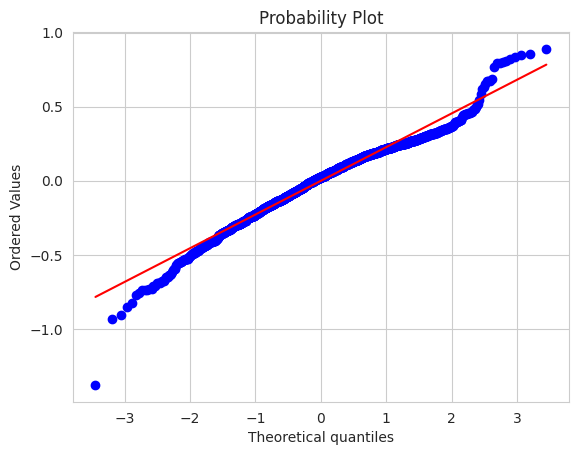

In [ ]:
#I am not sure if this is normal enoug, so I will use a QQ plot to compare the normality of this curve against a perfectly normal distribution

import pylab
import scipy.stats as stats

stats.probplot(df_pred2["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
#this looks pretty close to normal
#I am going to accept this as sufficient evidence that the residuals follow a normal distribution

In [ ]:
#test for homoscedasticity

In [ ]:
#see if the variance of the residuals is stable
#we can check this just by looking at the graphs above - it does look to have stable variance, but I will use a hypothesis test to make sure

#import necessary libraries for hypothesis test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred2["Residuals"], x_train30)
lzip(name, test)

[('F statistic', 1.0018222827080838), ('p-value', 0.4874447905543368)]

In [ ]:
#the probability that what we observed could have happened if the null is true (it is homoscedatic) is 49%
#not enough evidence against the null - data is homoscedatic

## Final Model

In [ ]:
#all the assumptions are now met
#check the summary of our final model

print(olsmod30.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     1088.
Date:                   Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                           00:19:37   Log-Likelihood:                 120.78
No. Observations:                   2417   AIC:                            -215.6
Df Residuals:                       2404   BIC:                            -140.3
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
#equation of the linear regression
Equation = "normalized used price ="
print(Equation, end=" ")
for i in range(len(x_train30.columns)):
    if i == 0:
        print(olsmod30.params[i], "+", end=" ")
    elif i != len(x_train30.columns) - 1:
        print(
            olsmod30.params[i],
            "* (",
            x_train30.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod30.params[i], "* (", x_train30.columns[i], ")")

normalized used price = -0.41727730370151694 + 0.0196548933373735 * ( main_camera_mp ) +  0.013283854744645426 * ( selfie_camera_mp ) +  0.023546993773401727 * ( ram ) +  0.0015971302387318648 * ( weight ) +  1.2082111403732825 * ( normalized_new_price ) +  -0.03858244293186329 * ( years_out ) +  -0.04183447812024251 * ( brand_name_LG ) +  -0.036832609866963295 * ( brand_name_Others ) +  -0.04721591042782653 * ( brand_name_Samsung ) +  -0.06273438914126221 * ( brand_name_Sony ) +  0.07454635421813148 * ( brand_name_Xiaomi ) +  -0.07154813472250998 * ( normalized_new_price_sq )


In [ ]:
x_train30.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'normalized_new_price', 'years_out', 'brand_name_LG',
       'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony',
       'brand_name_Xiaomi', 'normalized_new_price_sq'],
      dtype='object')

In [ ]:
x_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'years_out', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn',
       'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo',
       'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
       'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus',
       'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
       'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony',
       'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO',
       'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes', '5g_yes'

In [ ]:
# dropping columns from the test data that are not in the training data
x_test2 = x_test.drop(
    ['screen_size',
       'int_memory', 'battery', 'days_used', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn',
       'brand_name_Lava', 'brand_name_Lenovo',
       'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
       'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus',
       'brand_name_Oppo', 'brand_name_Panasonic',
       'brand_name_Realme',
       'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO',
       'brand_name_ZTE', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes', '5g_yes'], axis=1
)

In [ ]:
x_test2.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'normalized_new_price', 'years_out', 'brand_name_LG',
       'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony',
       'brand_name_Xiaomi', 'normalized_new_price_sq'],
      dtype='object')

In [ ]:
x_test2

const  main_camera_mp  selfie_camera_mp   ram  weight  \
866     1.0            8.00               2.0  4.00   206.0   
957     1.0            3.15               0.3  0.25   140.0   
280     1.0            8.00               8.0  2.00   185.0   
2150    1.0           13.00              16.0  4.00   148.0   
93      1.0           13.00               5.0  3.00   179.0   
...     ...             ...               ...   ...     ...   
2191    1.0            8.00               5.0  4.00   140.0   
3217    1.0           13.00               5.0  2.00   146.0   
885     1.0            0.30               0.3  0.25    80.0   
2991    1.0            8.00               2.0  4.00   132.0   
1071    1.0            8.00               0.3  4.00   142.9   

      normalized_new_price  years_out  brand_name_LG  brand_name_Others  \
866               5.190788        7.0            0.0                1.0   
957               3.884652        8.0            0.0                0.0   
280               4.487287        1.0            0.0                0.0   
2150              5.639422        4.0            0.0                0.0   
93                5.300415        2.0            1.0                0.0   
...                    ...        ...            ...                ...   
2191              5.598829        7.0            0.0                0.0   
3217              4.293742        2.0            0.0                0.0   
885               3.042139        8.0            0.0                1.0   
2991              4.863604        6.0            0.0                0.0   
1071              4.603268        8.0            0.0                0.0   

      brand_name_Samsung  brand_name_Sony  brand_name_Xiaomi  \
866                  0.0              0.0                0.0   
957                  0.0              0.0                0.0   
280                  0.0              0.0                0.0   
2150                 0.0              0.0                0.0   
93                   0.0              0.0                0.0   
...                  ...              ...                ...   
2191                 0.0              0.0                0.0   
3217                 0.0              0.0                0.0   
885                  0.0              0.0                0.0   
2991                 0.0              0.0                1.0   
1071                 0.0              0.0                0.0   

      normalized_new_price_sq  
866                 26.944278  
957                 15.090520  
280                 20.135746  
2150                31.803077  
93                  28.094401  
...                       ...  
2191                31.346889  
3217                18.436218  
885                  9.254608  
2991                23.654641  
1071                21.190080  

[1037 rows x 13 columns]

In [ ]:
#transforming the new price column in the test data corresponding to the training set
x_test2["normalized_new_price_sq"] = np.square(x_test2["normalized_new_price"])

In [ ]:
#make predictions on the test set
y_pred = olsmod30.predict(x_test2)

In [ ]:
#check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.23384260684904384

In [ ]:
#check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.23564086946663865

In [ ]:
#this is very good - we want the measure of success to be very close for the training sample and the testing sample
#suggests there is not much overfitting

In [ ]:
#check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.1828077161059409

In [ ]:
#check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18331787951922413

In [ ]:
#mae is very close for test and traing data. Good
#suggests that our current model is able to predict used price within a mean error of 0.18 units on the test data.

In [ ]:
#Now we know this model is good for prediction and inference

## Actionable Insights and Recommendations

- Based on this model, we are able to predict the price of a used device through this equation: normalized used price = -0.41727730370151694 + 0.0196548933373735 * ( main_camera_mp ) +  0.013283854744645426 * ( selfie_camera_mp ) +  0.023546993773401727 * ( ram ) +  0.0015971302387318648 * ( weight ) +  1.2082111403732825 * ( normalized_new_price ) +  -0.03858244293186329 * ( years_out ) +  -0.04183447812024251 * ( brand_name_LG ) +  -0.036832609866963295 * ( brand_name_Others ) +  -0.04721591042782653 * ( brand_name_Samsung ) +  -0.06273438914126221 * ( brand_name_Sony ) +  0.07454635421813148 * ( brand_name_Xiaomi ) +  -0.07154813472250998 * ( normalized_new_price_sq )
- We can explain about 84.4% of the variance in the price of used devices through these variables: main camera resolution, selfie camera resolution, ram, weight, normalized new price, the number of years the device has been out, whether it is an LG device, a device that does not fall into one of the main brand categories, a Samsung device, a Sony device, or a Xiaomi device.
- Based on these observations, I would advice the startup ReCell to use this equation to figure out which combinations of variables produce th highest resell price, and aim towards selling those devices on their site, as I assume they get a percentage of the profits. So, by using this model they can determine which kinds of devices would produce the highest profits for their company.
- Also, even if ReCell decides to sell all deices, regardless of the predicted price, being able to use this model to accurately predict the price that a customer is willing to buy it would be extremely beneficial to the company. It would bring customers in because they would be compelled by the prices on the site since they would be pricing it based soley on the components and data of what customers are willing to buy each device for.
- I would also reccommend that ReCell does not focus too much on individual characteristics of the device alone, as we see in the data that the price can vary drastically for each device depending on the combination of each type of component, not just one component alone. For example, we see that just because a device is heavy does not mean the price or value of the device decreases because this could indicate that the battery size is actually much larger, which is an attractive feature in the device, and could make the price increase significantly. This is why paying attention to the relationships between each variable, and accounting for collinearity in the data is so important.

___

In [ ]:
!jupyter nbconvert PROJECT3.ipynb --to html

[NbConvertApp] Converting notebook PROJECT3.ipynb to html
[NbConvertApp] Writing 5666484 bytes to PROJECT3.html
